In [2]:
import matplotlib.pyplot as plt
import torch
import os
from pathlib import Path
from importlib import reload

os.chdir("..")  # Change root dir to project folder
os.getcwd()

'/hs/fs08/data/group-brueggen/tmartinez/diffusion/src'

# Random Experiments

In [4]:
from plotting.plot_metrics import pixel_metrics_plot

f'{pixel_metrics_plot.__name__}'

'pixel_metrics_plot'

(<Figure size 1500x1500 with 25 Axes>,
 array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object))

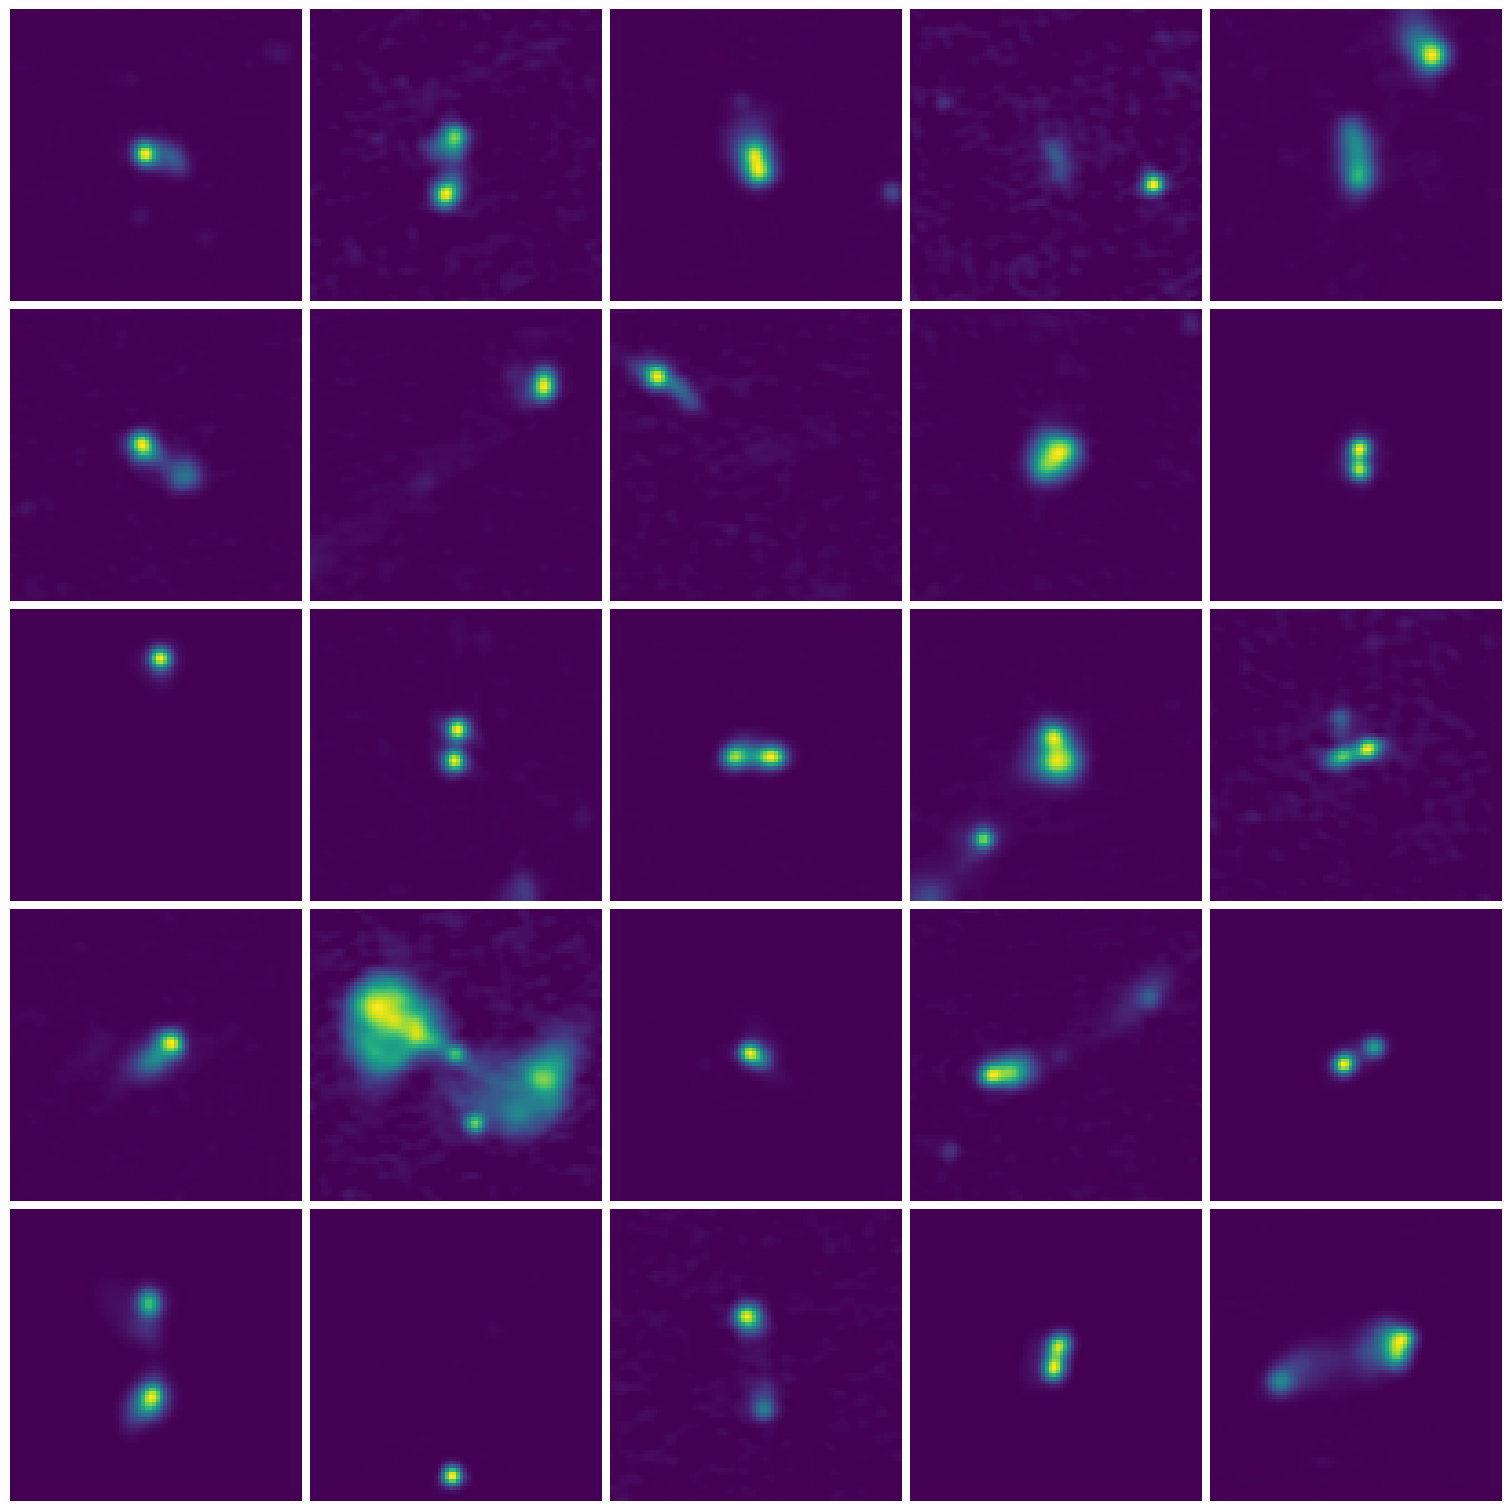

In [3]:
from plotting.plot_images import plot_image_grid
import numpy as np

ii = np.random.choice(len(dset), 25, replace=False)
imgs = [dset[i][0] for i in ii]

plot_image_grid(imgs)

In [4]:
samples_file = Path(
    "/hs/babbage/data/group-brueggen/tmartinez/diffusion/analysis_results/Fmax_Context_MLP/Fmax_Context_MLP_samples_10000_guidance_strength=1.00e-01.pt"
)
samples = dutil.EvaluationDataset(samples_file)

Data set initialized.


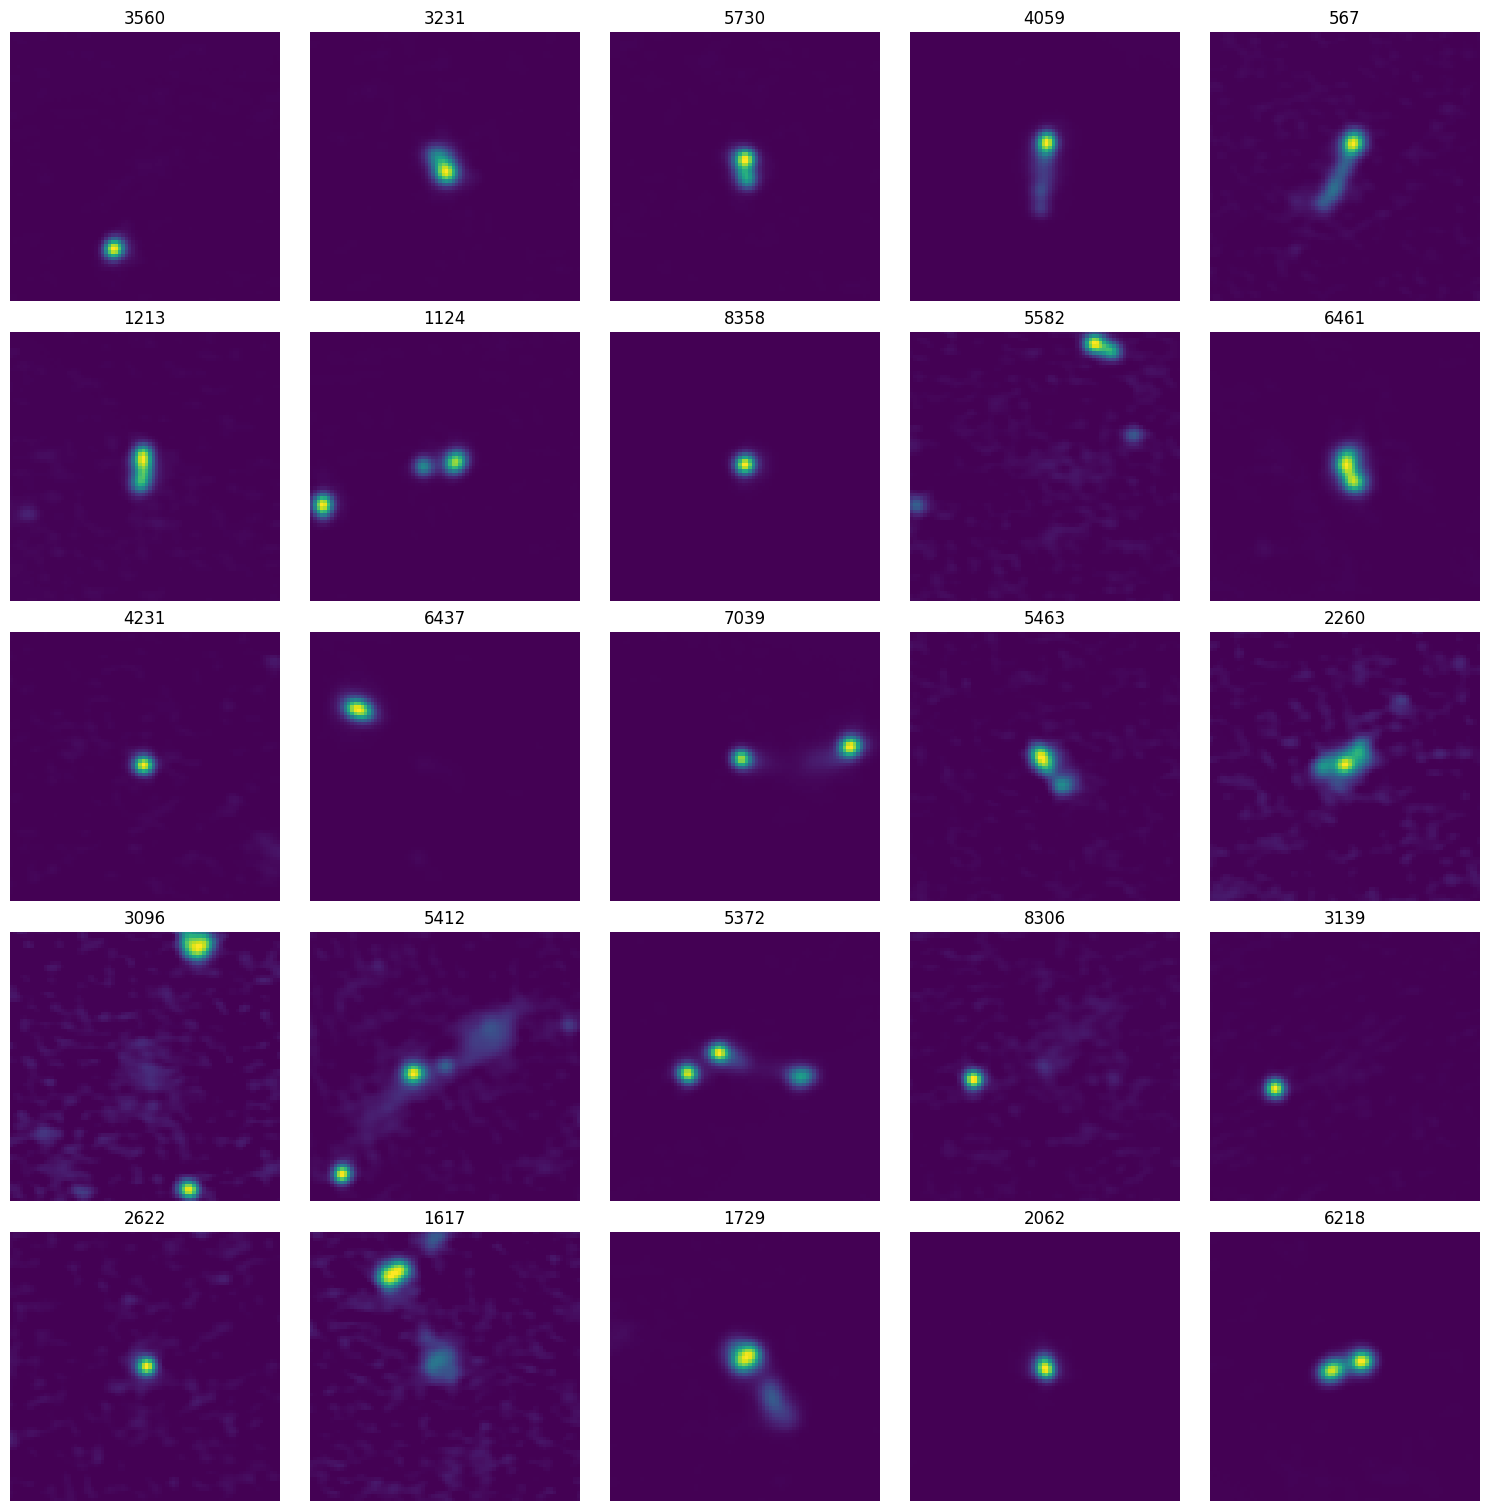

In [18]:
ii = np.random.choice(len(samples), 25, replace=False)
imgs = [samples[i][0] for i in ii]

plot_image_grid(imgs, titles=ii);

In [19]:
from skimage.metrics import structural_similarity as ssim
from multiprocessing import Pool
from tqdm import tqdm

def calculate_ssim(params):
    i_sample, i = params
    img = samples[i_sample].numpy().squeeze()
    return ssim(img, dset[i].numpy().squeeze(), data_range=1)

i_samples = [7039, 5412, 5372, 1124, 567]  # List of sample indices

params = [(i_sample, i) for i_sample in i_samples for i in range(len(dset))]

with Pool() as p:
    sim_results = list(tqdm(p.imap(calculate_ssim, params), total=len(params)))

sim_results = np.array(sim_results).reshape(len(i_samples), len(dset))

100%|██████████| 533935/533935 [00:23<00:00, 22427.69it/s]


756 [756, 49983, 62745, 76737, 83992, 57626]
3952 [3952, 28613, 84313, 31543, 18999, 40692]
7189 [7189, 71499, 51792, 34083, 61374, 36353]
6936 [6936, 20550, 45325, 65216, 67771, 93292]
6320 [6320, 56615, 14282, 58345, 48152, 96955]


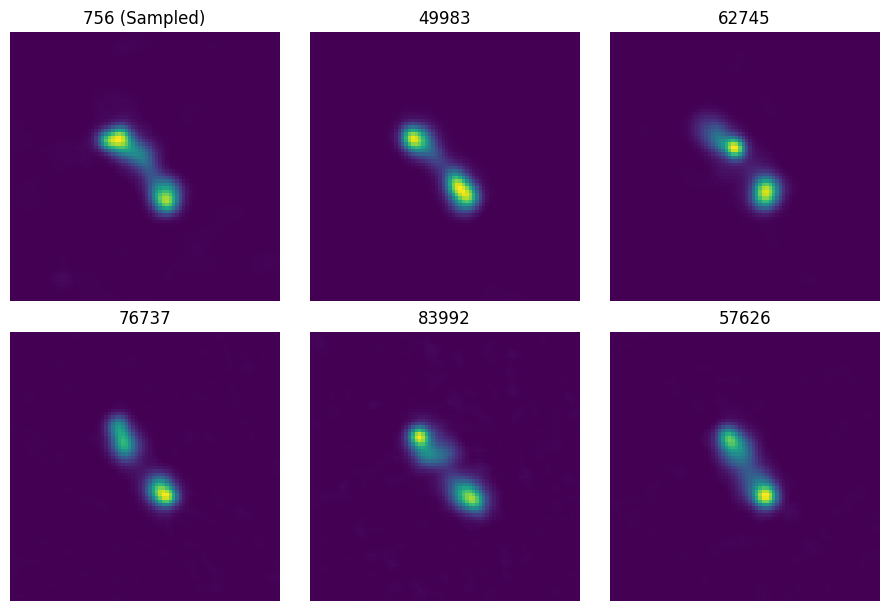

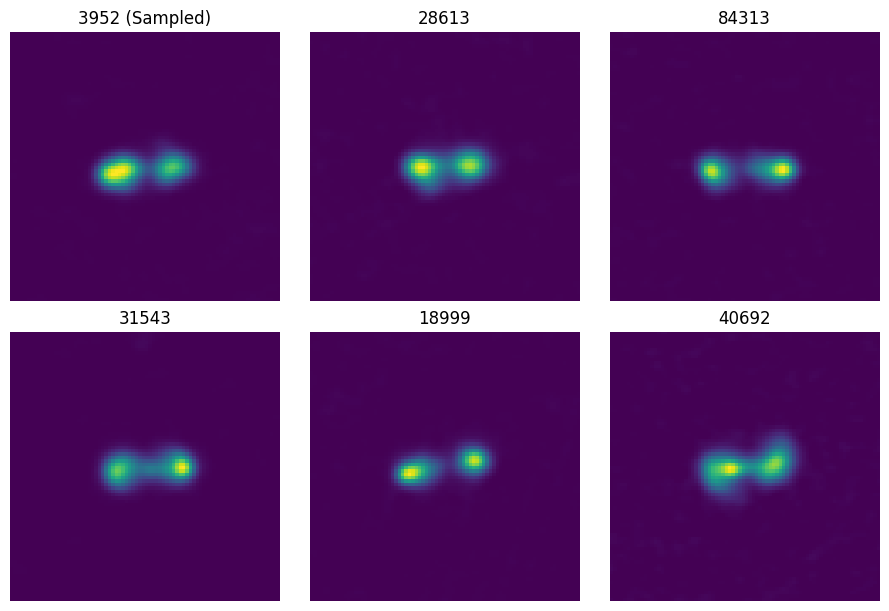

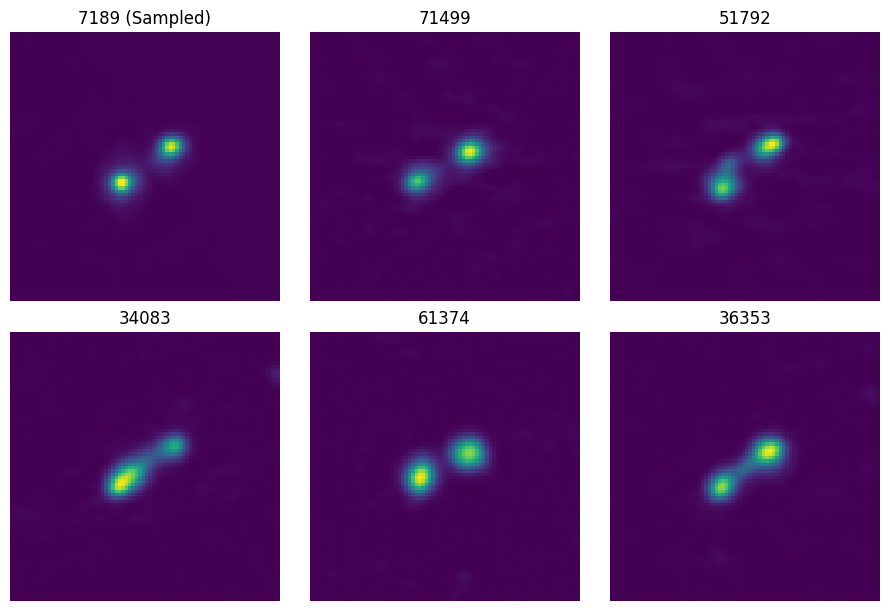

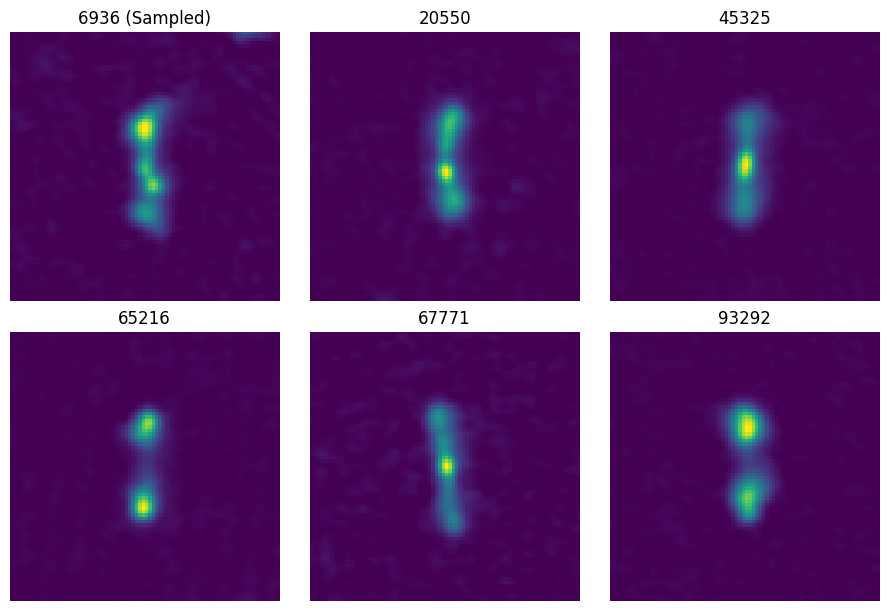

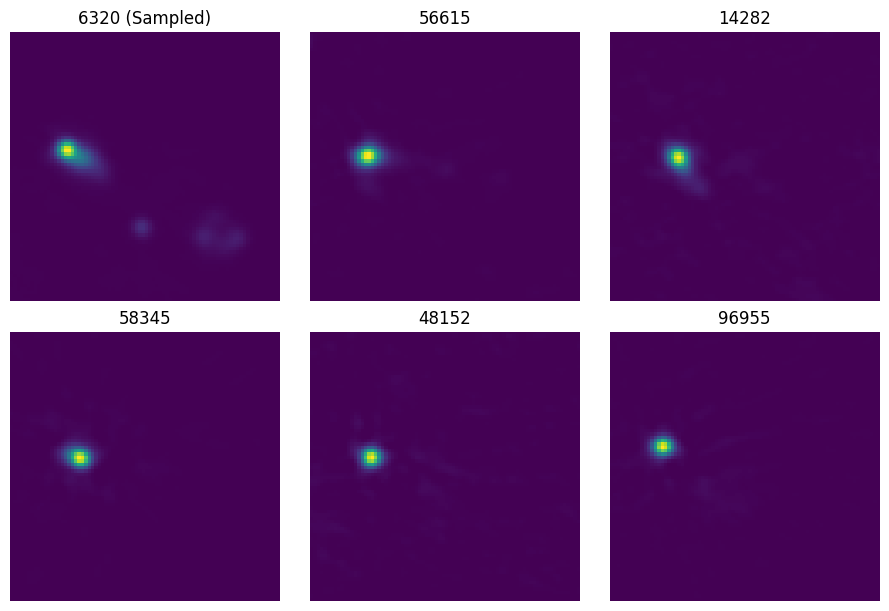

In [17]:
def plot_match(i_sample, i_match, **kwargs):
    img = samples[i_sample].numpy().squeeze()

    if type(i_match) == int:
        i_match = [i_match]

    elif type(i_match) != list:
        i_match = i_match.tolist()

    imgs = [dset[i].numpy().squeeze() for i in i_match]
    print(i_sample, [i_sample,] + i_match)
    plot_image_grid([img,] + imgs, titles=([f'{i_sample} (Sampled)',] + i_match), **kwargs)


# Plot the best matches for each sample
for i_sample in range(len(i_samples)):
    i_match = np.argsort(sim_results[i_sample])[::-1][:5]
    plot_match(i_samples[i_sample], i_match, n_cols=3)

# BDSF

## Metric Peeks

In [4]:
import pandas as pd
import utils.paths as paths
import analysis.bdsf_evaluation as bdsfeval
import utils.data_utils

reload(utils.data_utils)
from utils.data_utils import EvaluationDataset

dset = EvaluationDataset(paths.LOFAR_SUBSETS["0-clip_unscaled"], sorted=True)
cat_srl = pd.read_csv(
    "/hs/babbage/data/group-brueggen/tmartinez/diffusion/analysis_results/lofar_120asLimit_80p_0-clipped_f-thr=0_SNR>=5_subset/bdsf/lofar_120asLimit_80p_0-clipped_f-thr=0_SNR>=5_subset_bdsf_srl.csv"
)


metrics = bdsfeval.get_metric_dict(paths.LOFAR_SUBSETS["0-clip_unscaled"])

Loading images...
Sorting data set by names...
Data set initialized.
Found existing distribution file for lofar_120asLimit_80p_0-clipped_f-thr=0_SNR>=5_subset.hdf5.


In [8]:
(dset.names == metrics["Image_id"]).all()

True

(array([5.9760e+04, 1.9593e+04, 1.0240e+04, 6.3430e+03, 3.7430e+03,
        1.7630e+03, 6.5000e+02, 1.9800e+02, 3.1000e+01, 4.0000e+00]),
 array([ 0.,  6., 12., 18., 24., 30., 36., 42., 48., 54., 60.]),
 <BarContainer object of 10 artists>)

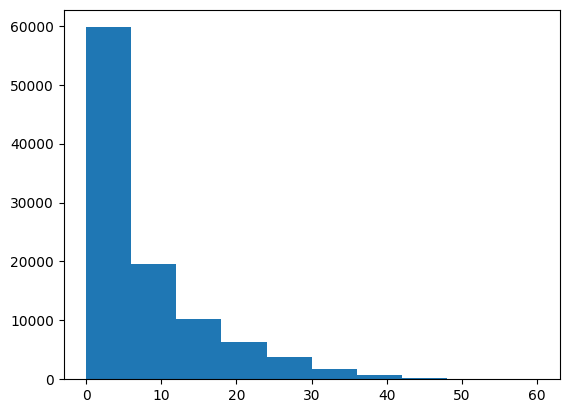

In [33]:
import matplotlib.pyplot as plt

n_src = metrics["nsrc"]

plt.hist(n_src)

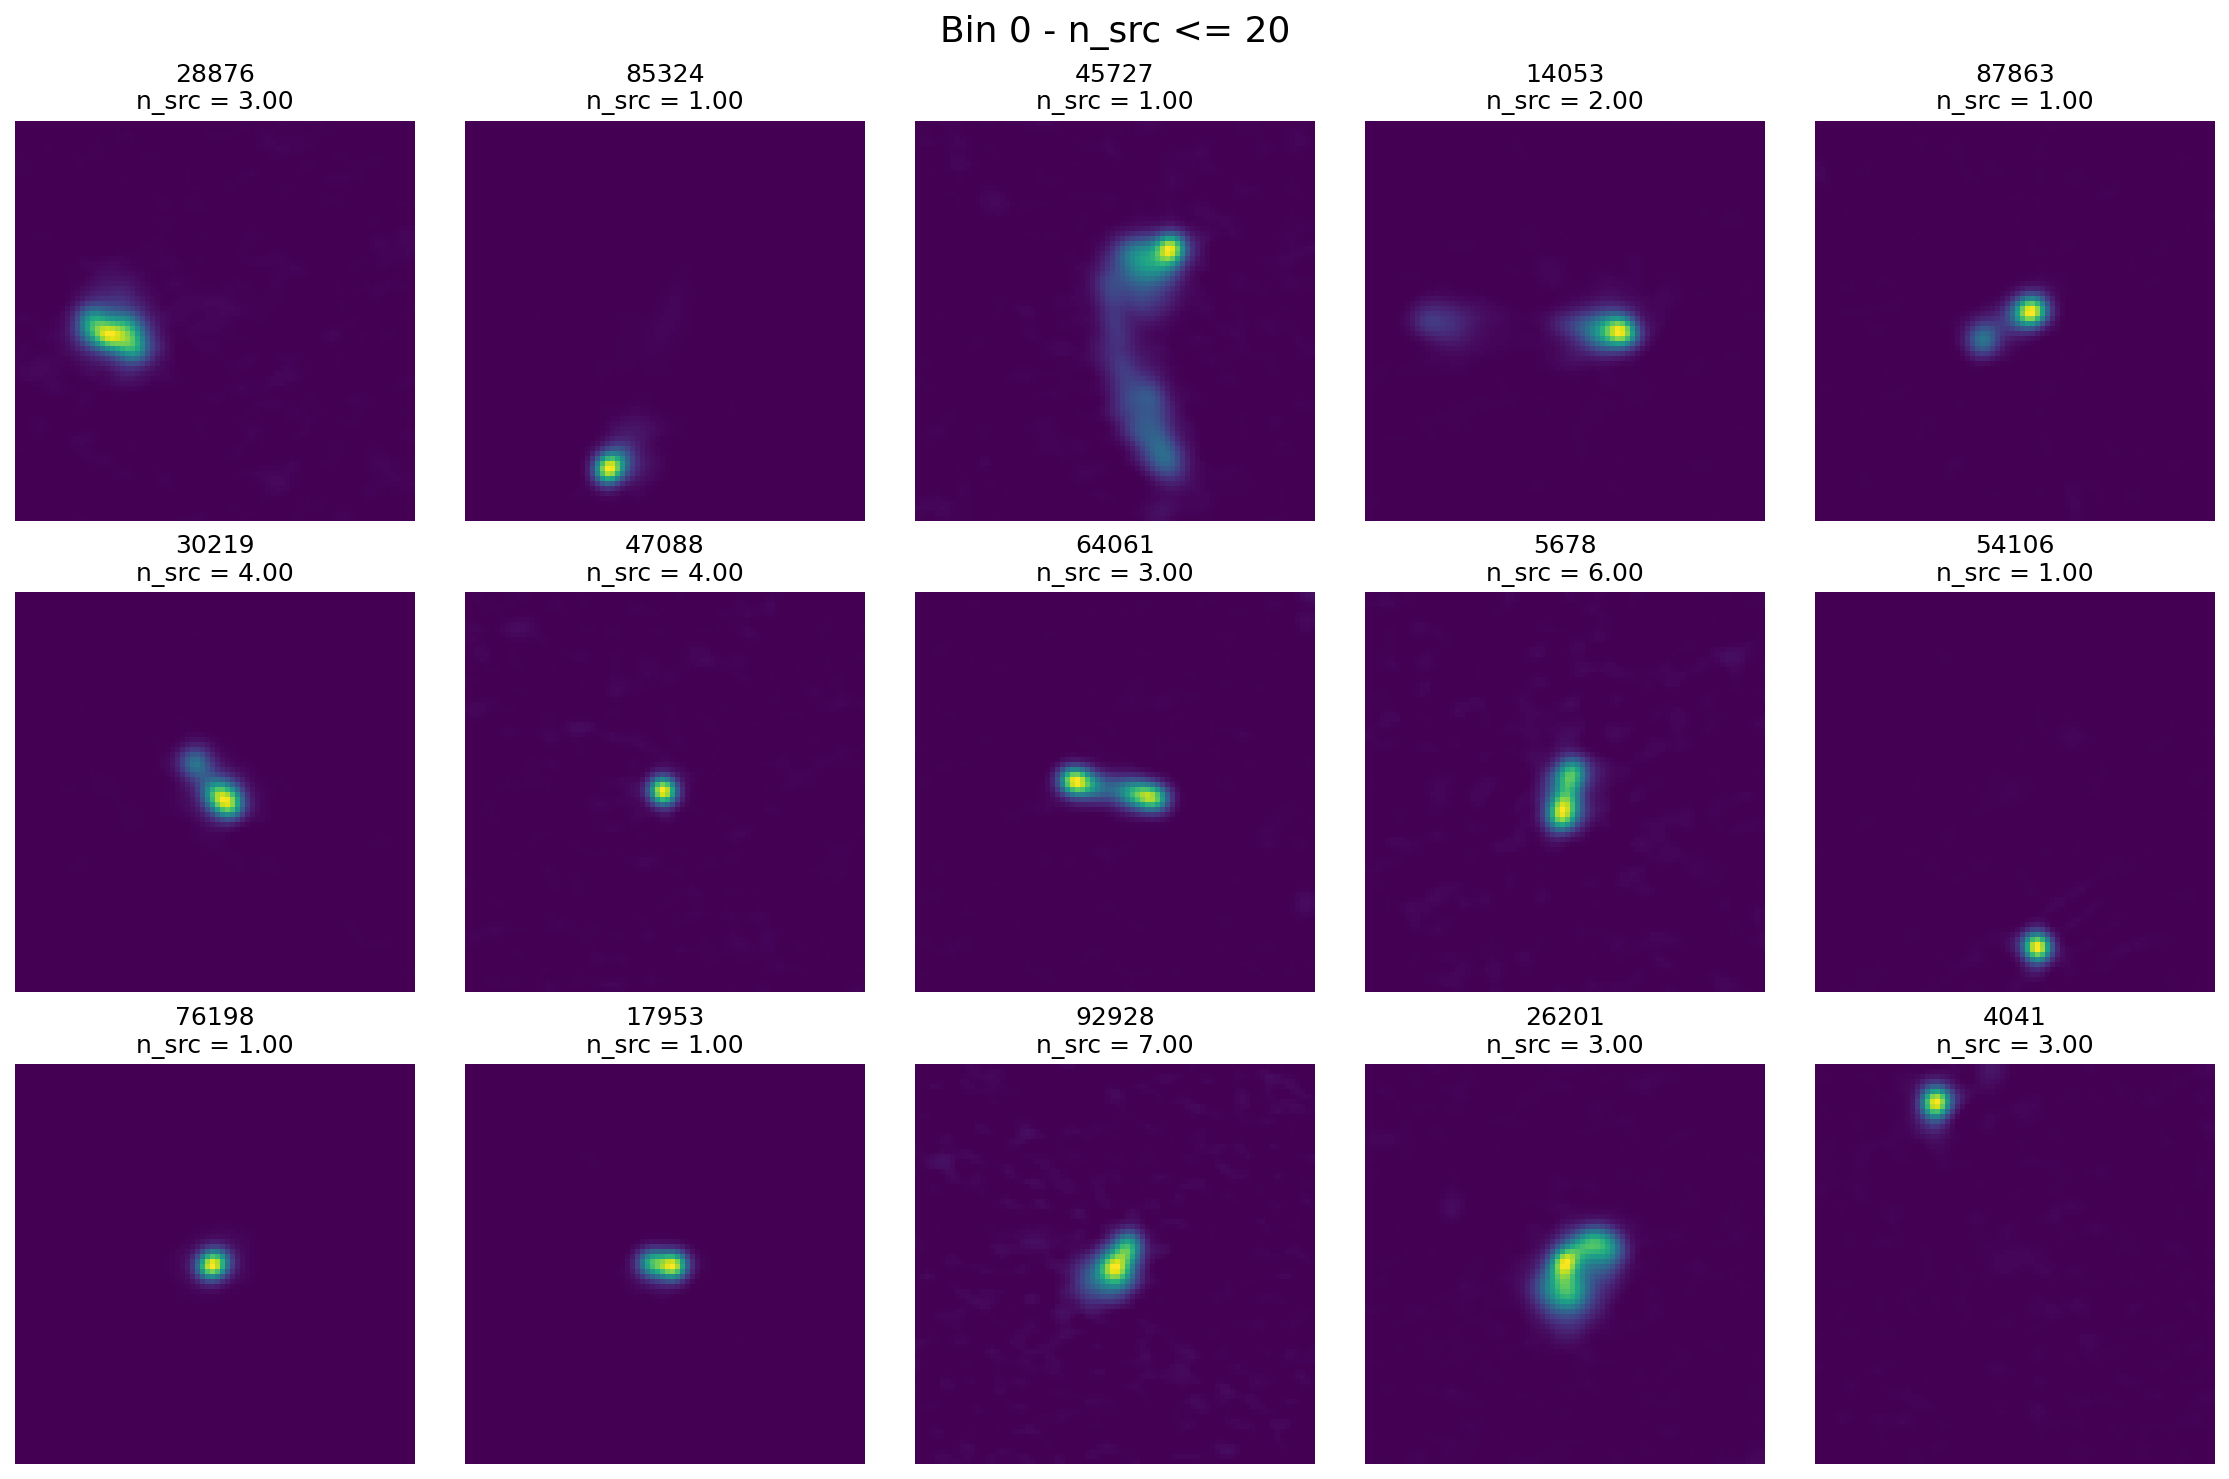

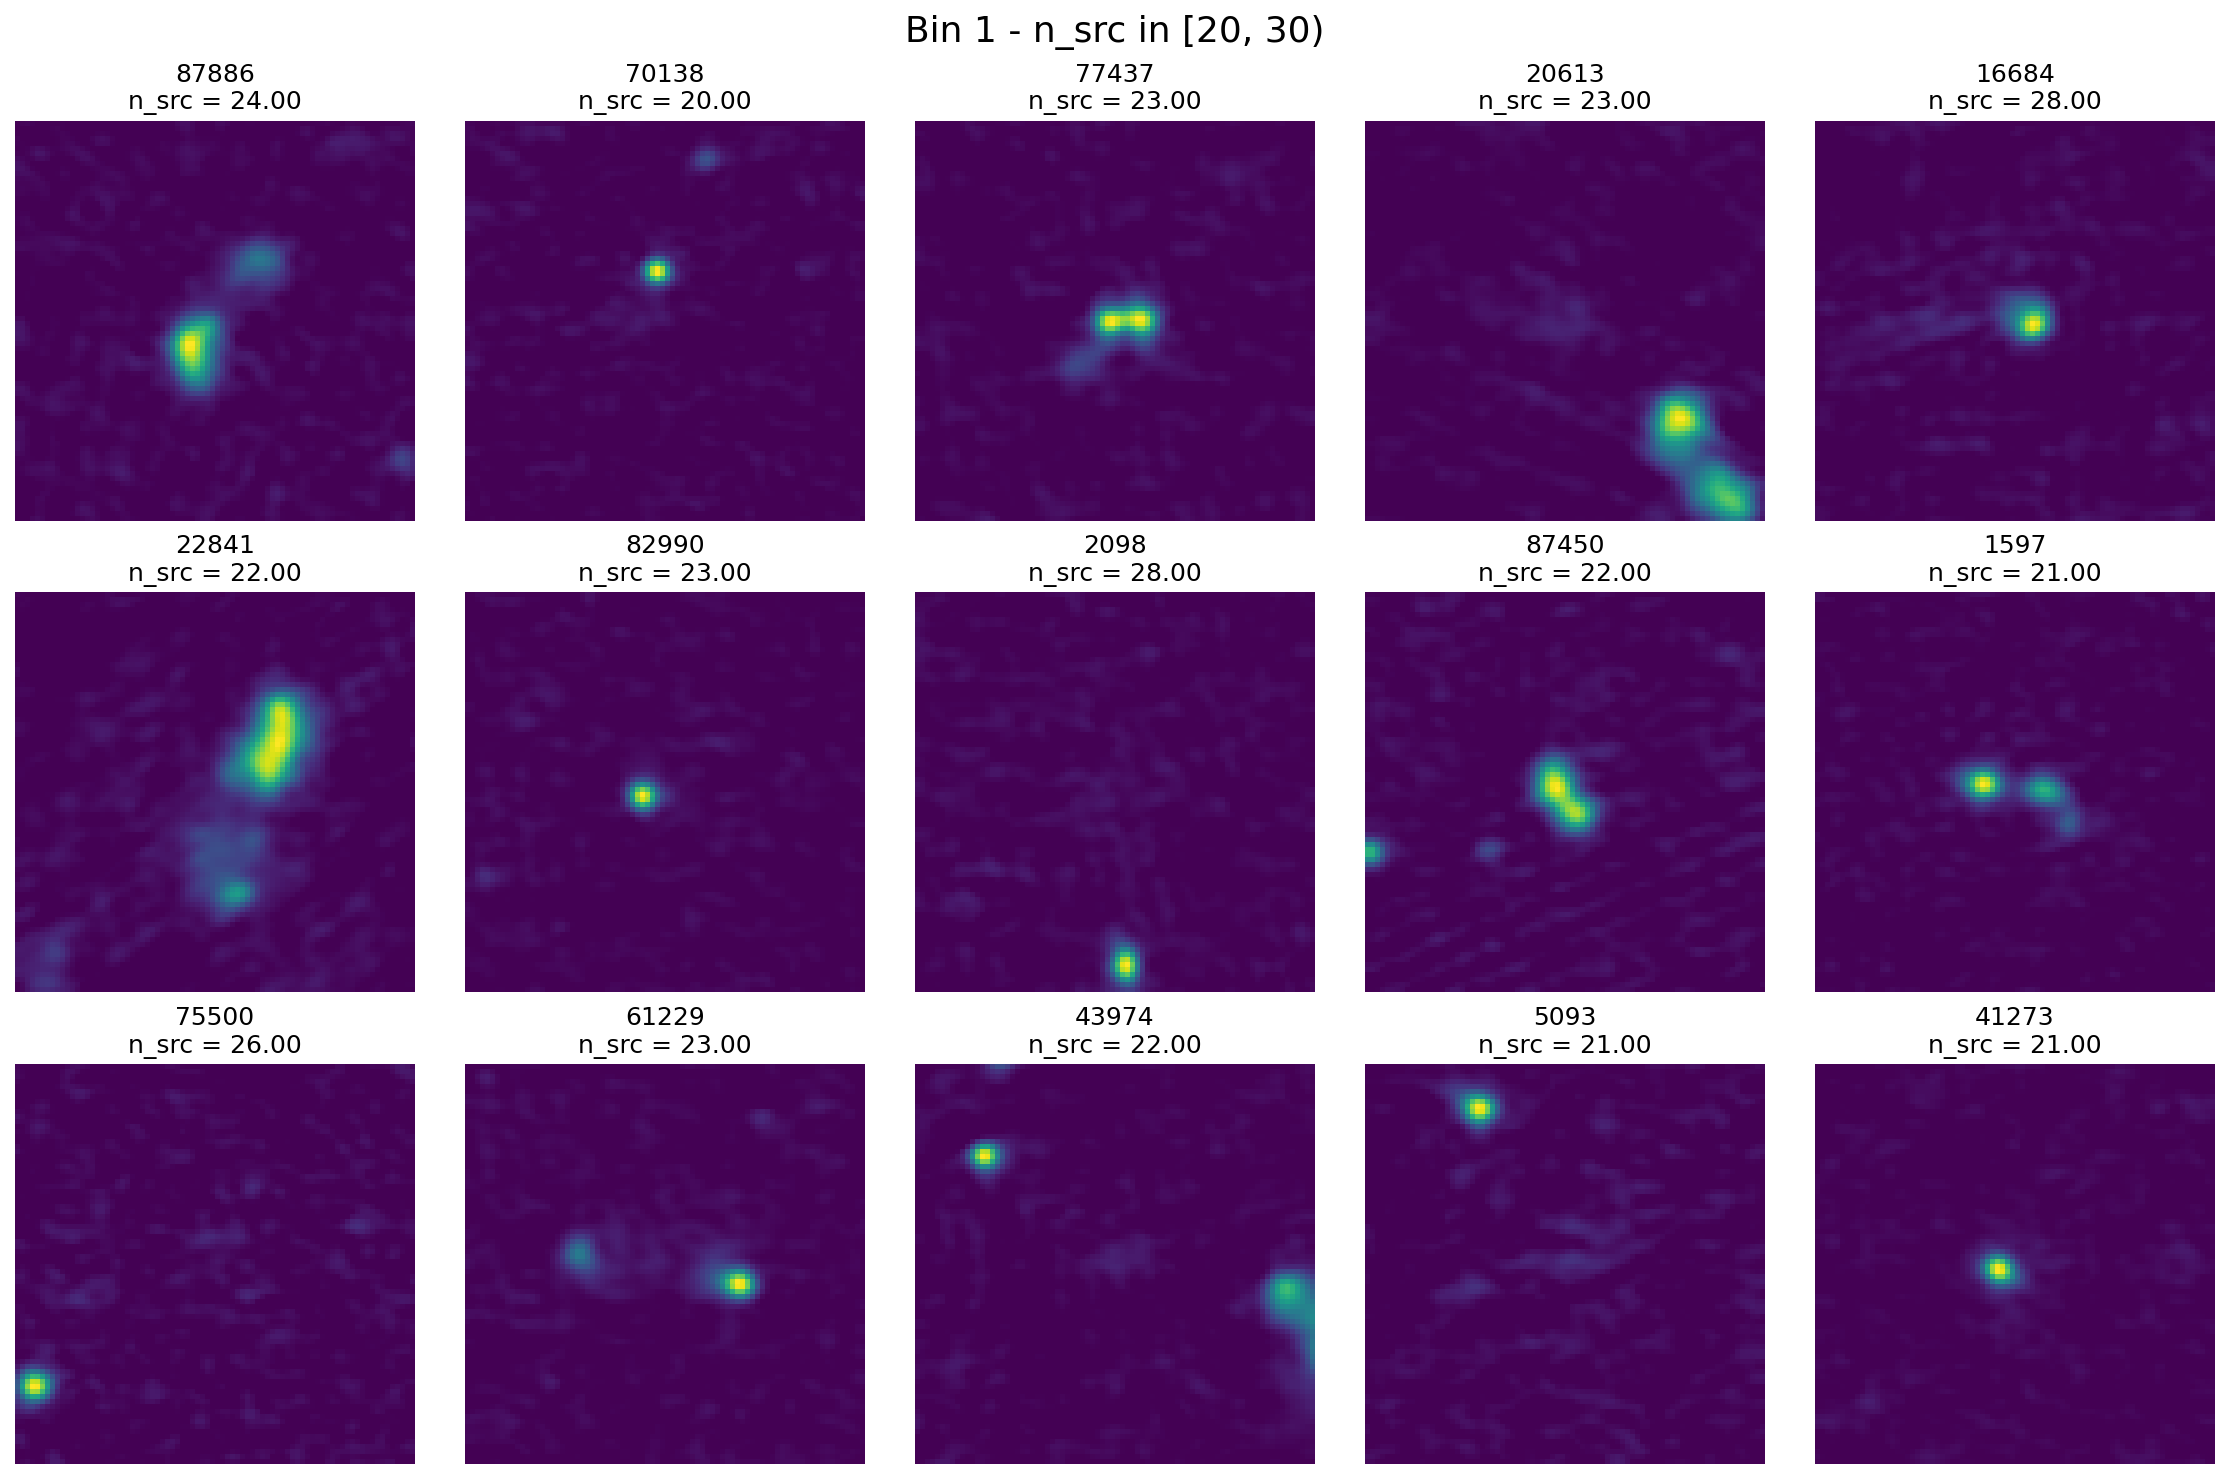

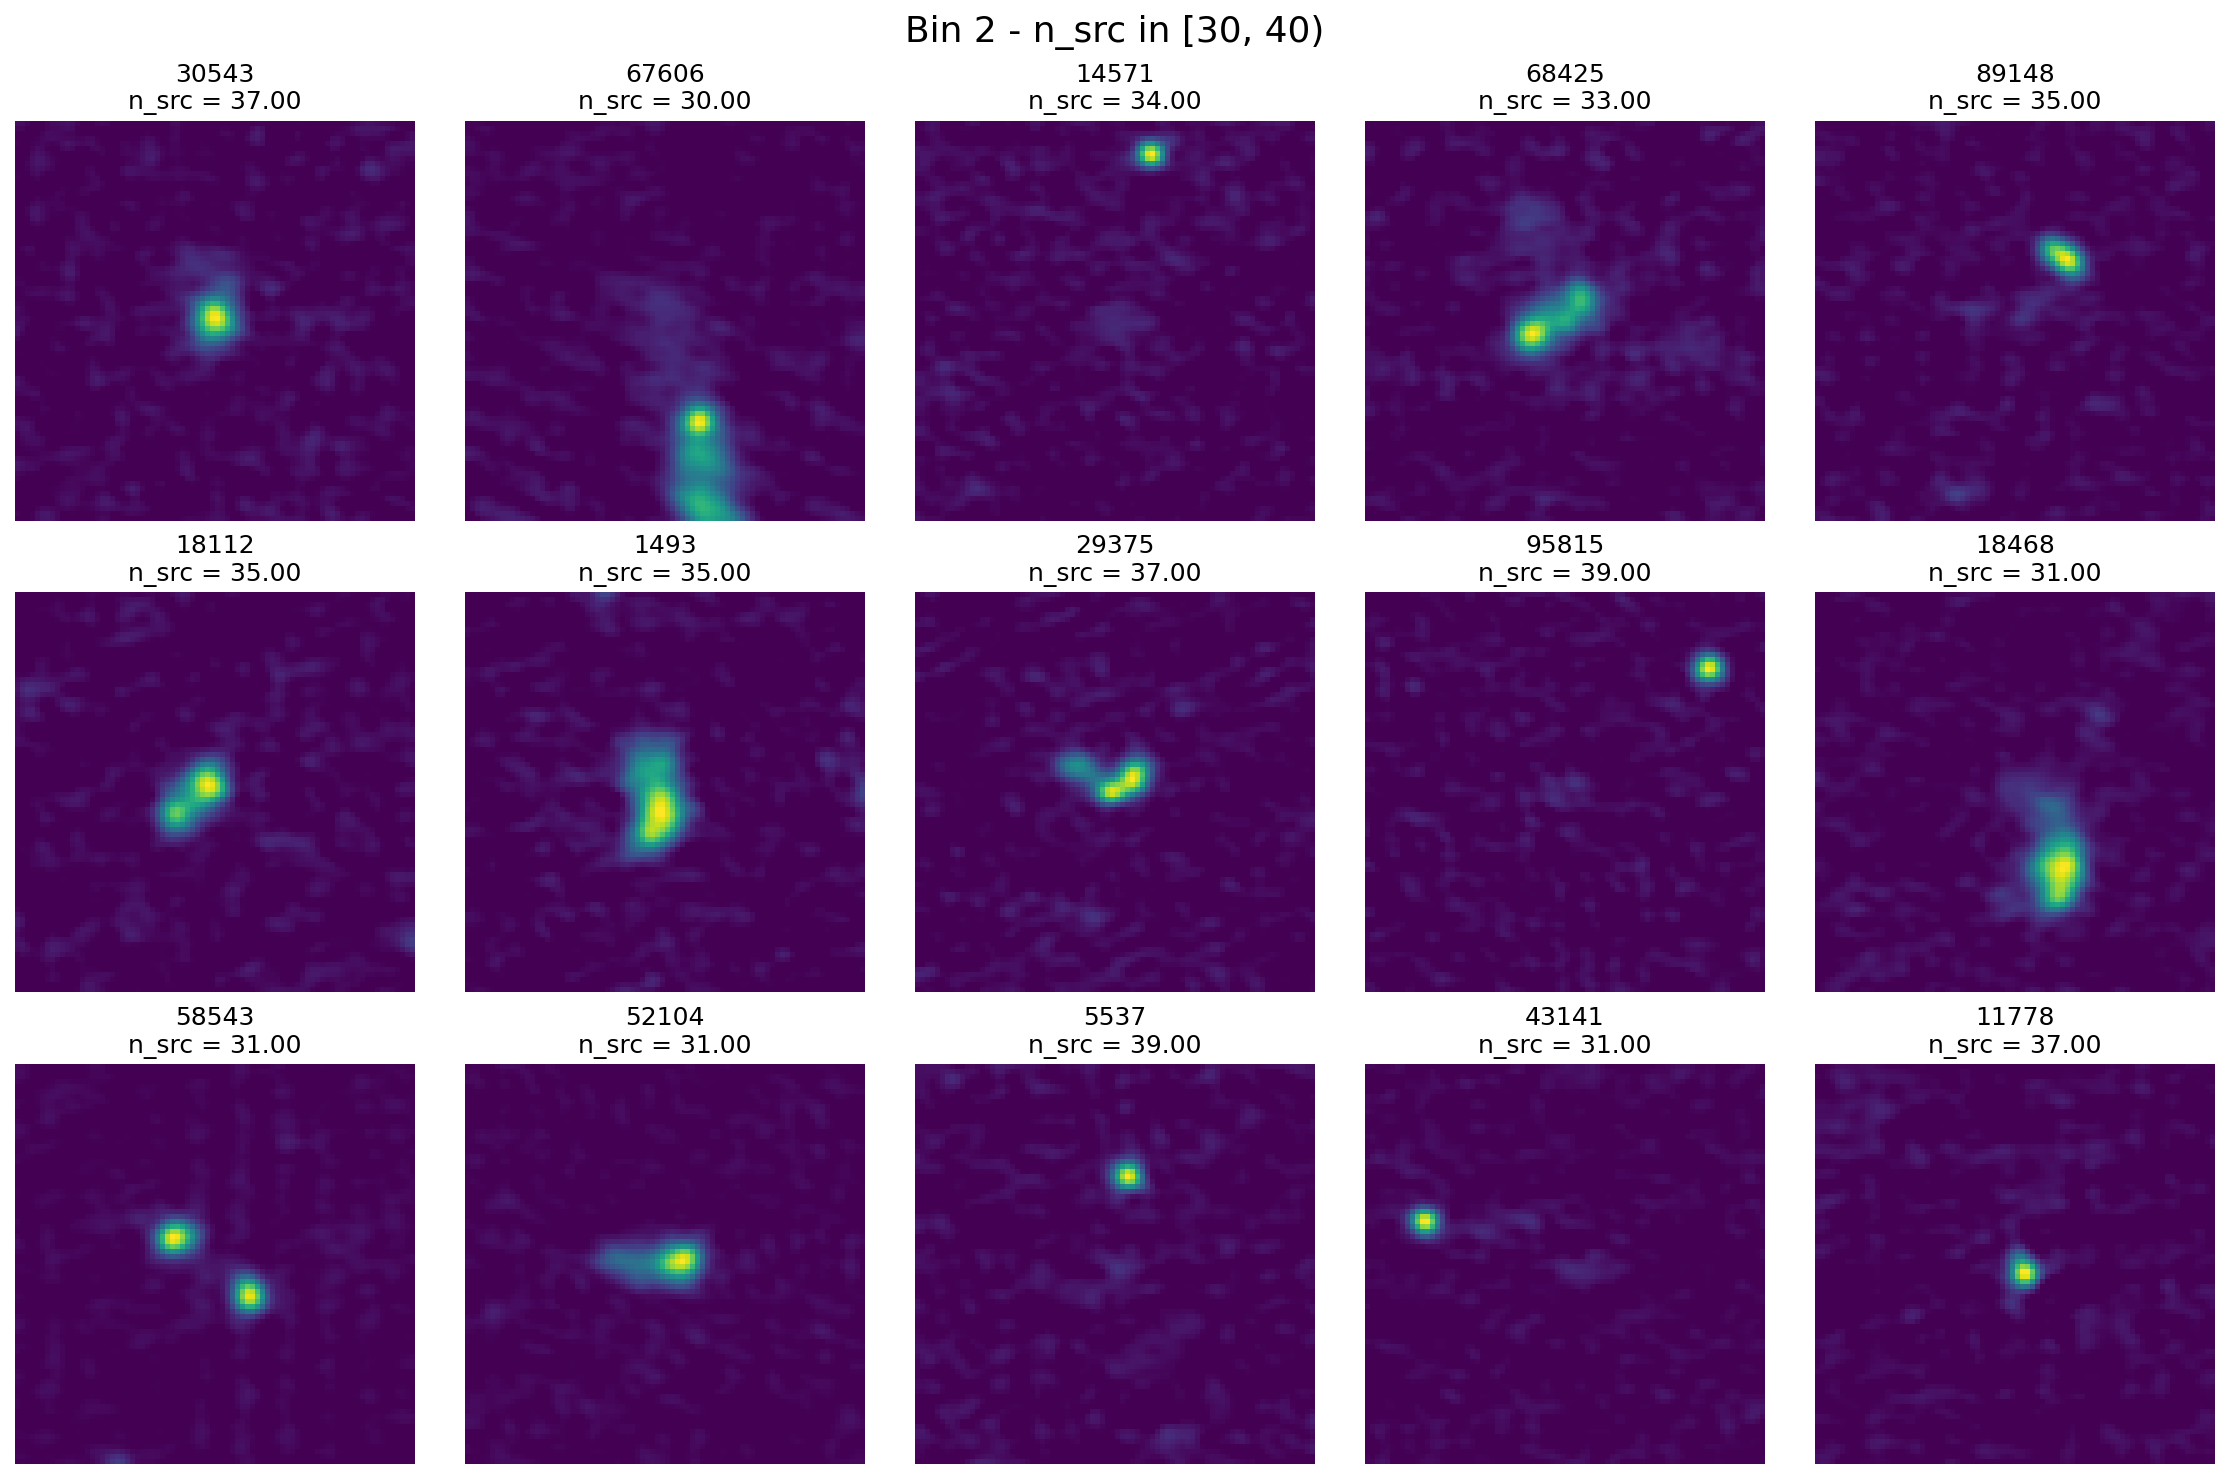

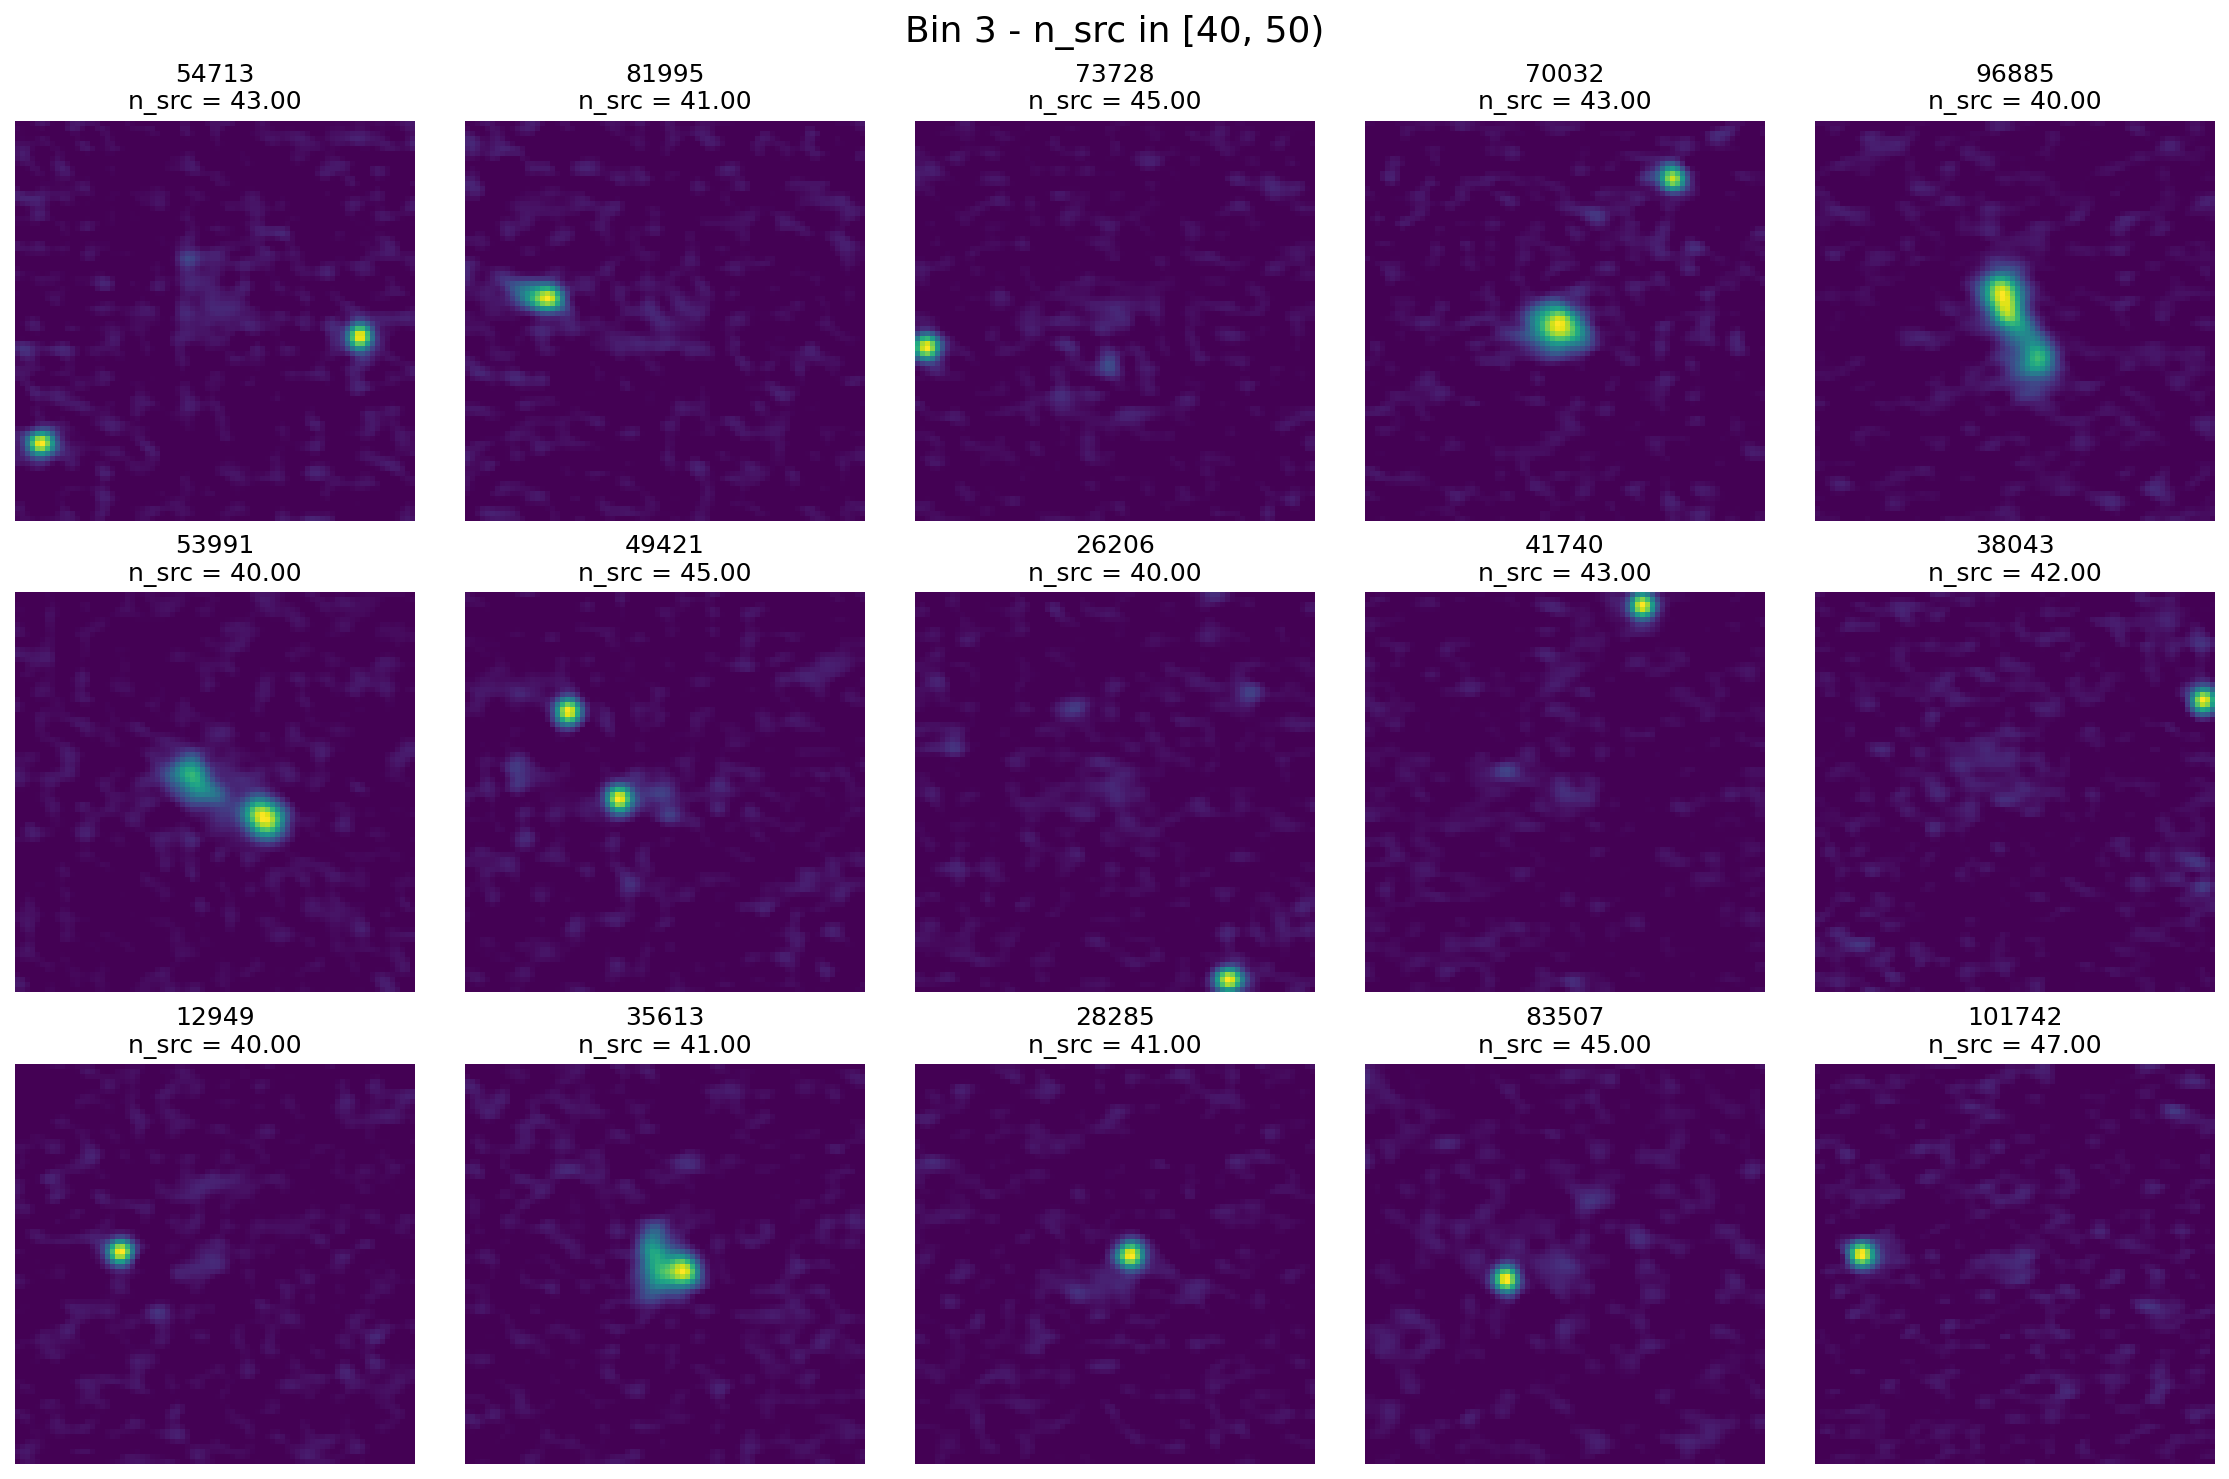

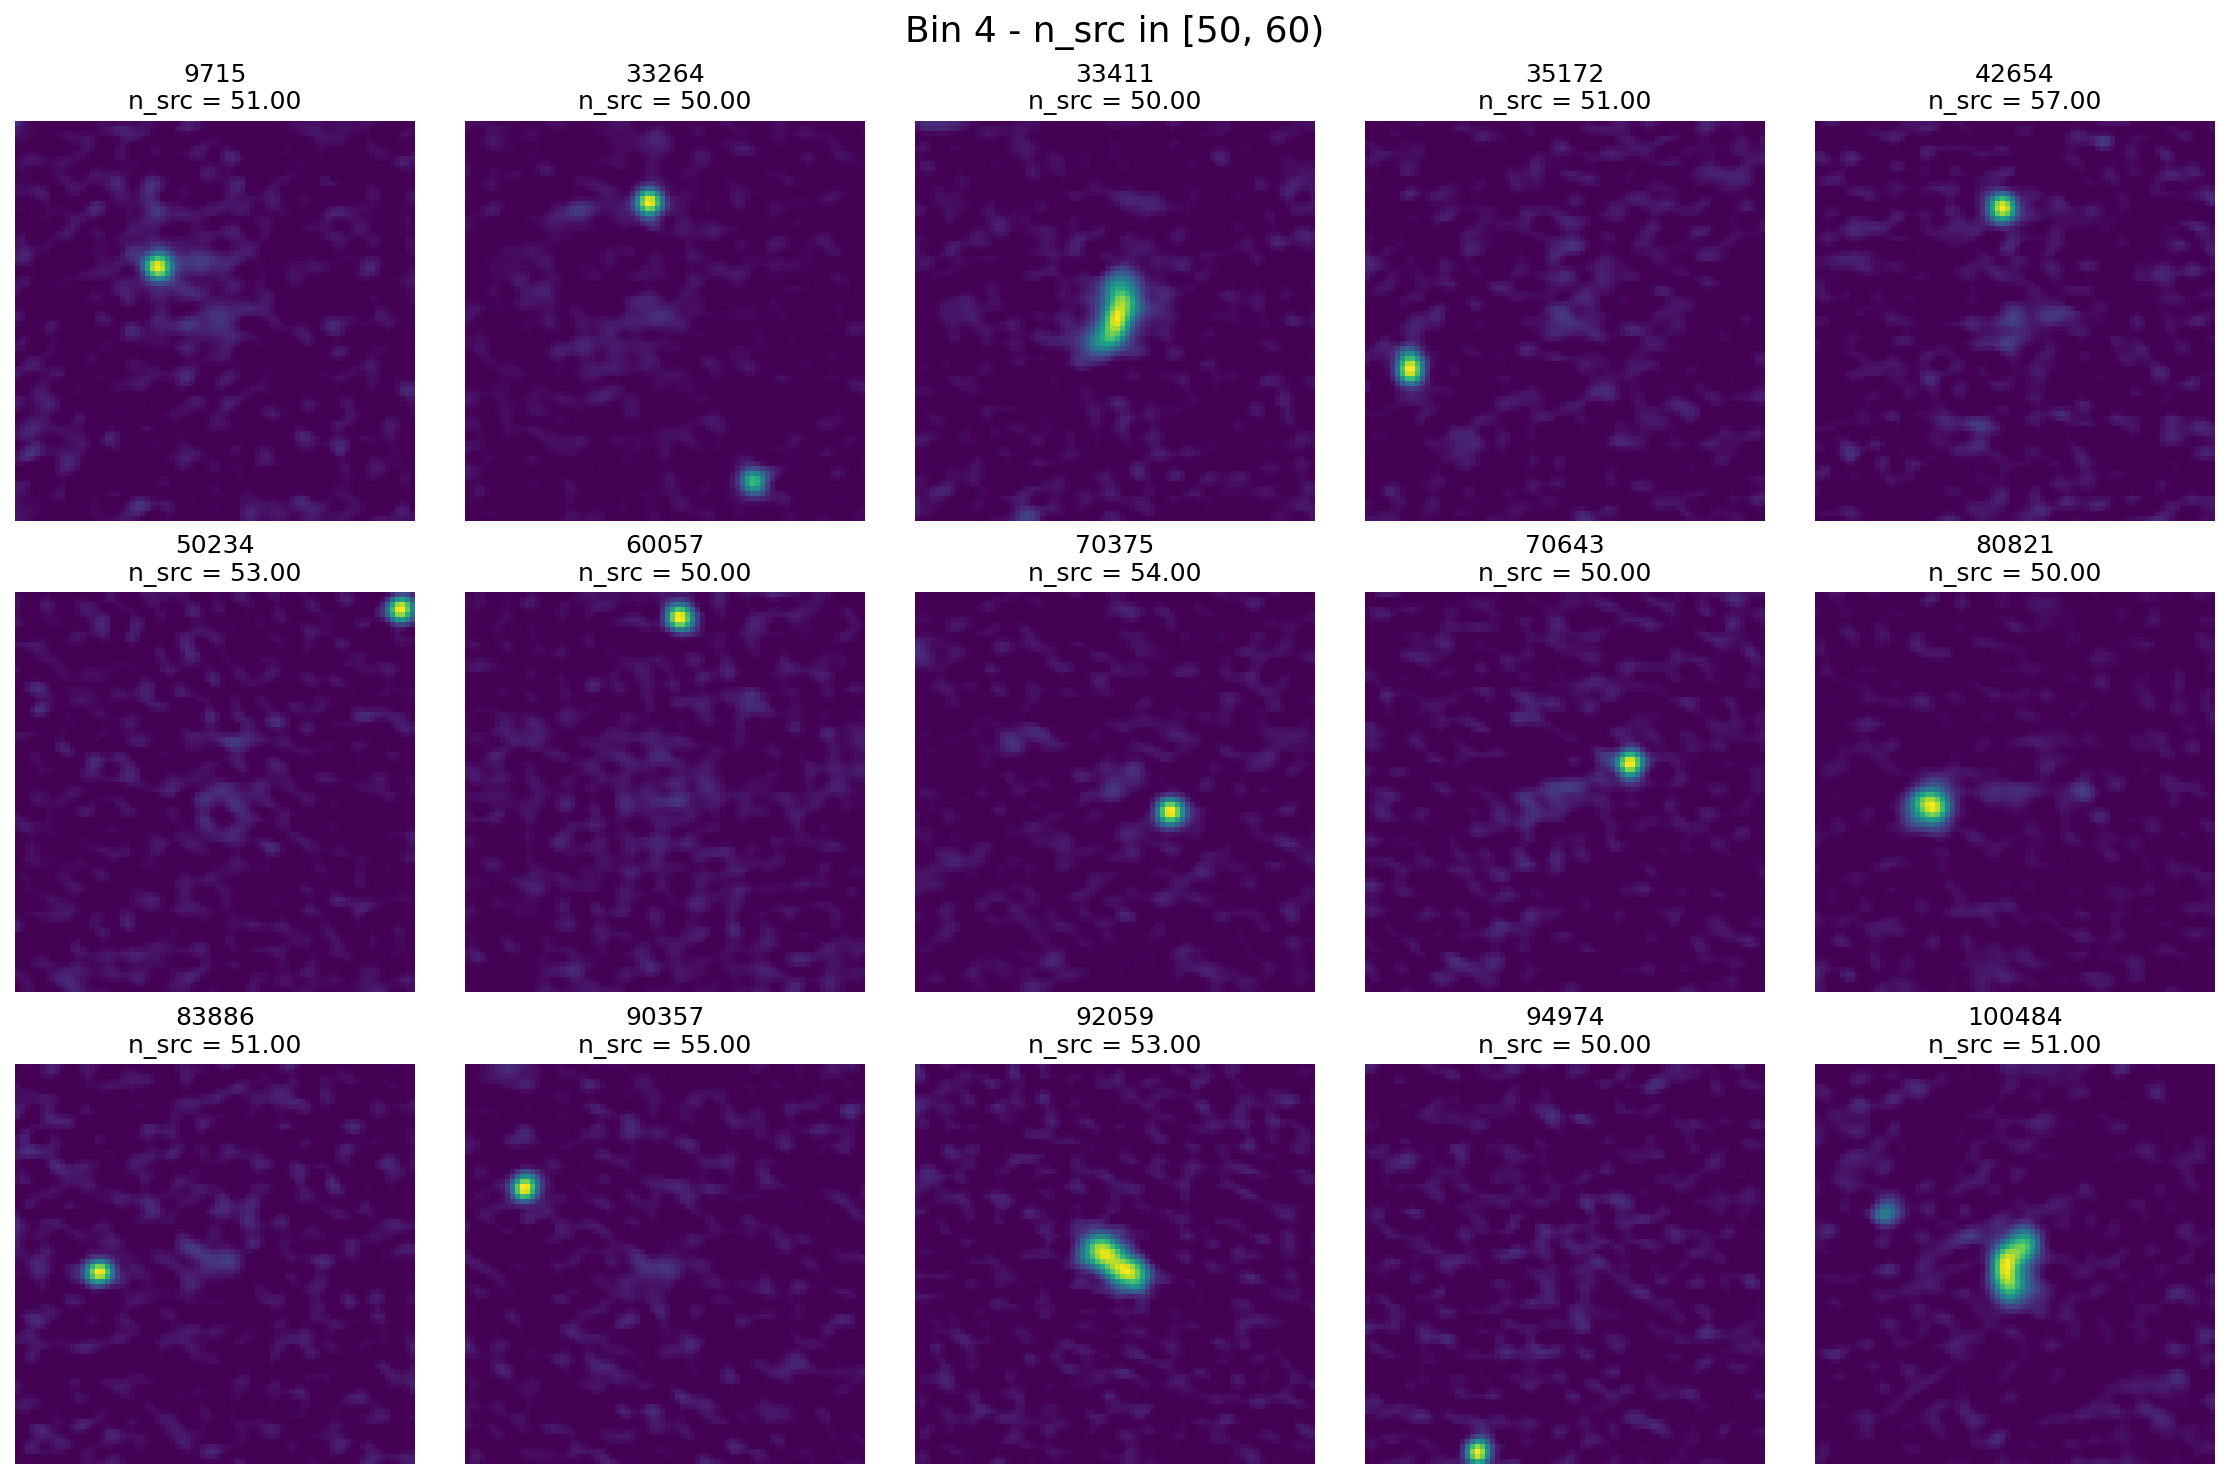

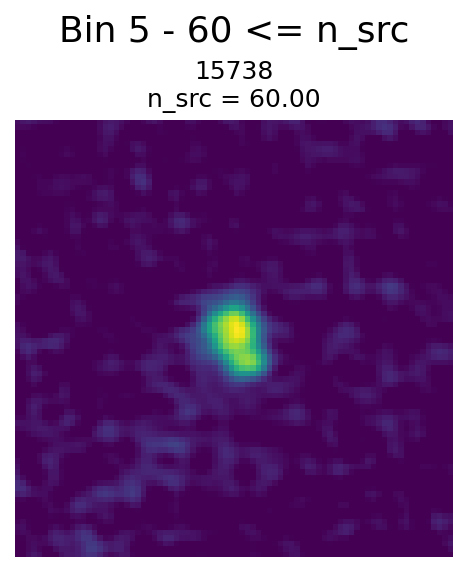

In [12]:
import plotting.plot_images

reload(plotting.plot_images)

from plotting.plot_images import metric_peek

metric_peek(
    metrics["nsrc"],
    [20, 30, 40, 50, 60],
    dset.data,
    metric_name="n_src",
    n_examples=15,
)

## Example Analysis

In [8]:
import utils.paths as paths
from utils.data_utils import EvaluationDataset

dset = EvaluationDataset(paths.LOFAR_SUBSETS["0-clip_unscaled"], sorted=True)

Loading images...
Data set initialized.


In [10]:
import numpy as np

n = 10
# Pick n random indexes
idxs = np.random.choice(len(dset), n, replace=False)
idxs

array([33222, 85195, 16785,  6533, 47644,  3309, 94052, 56212, 28122,
       51980])

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


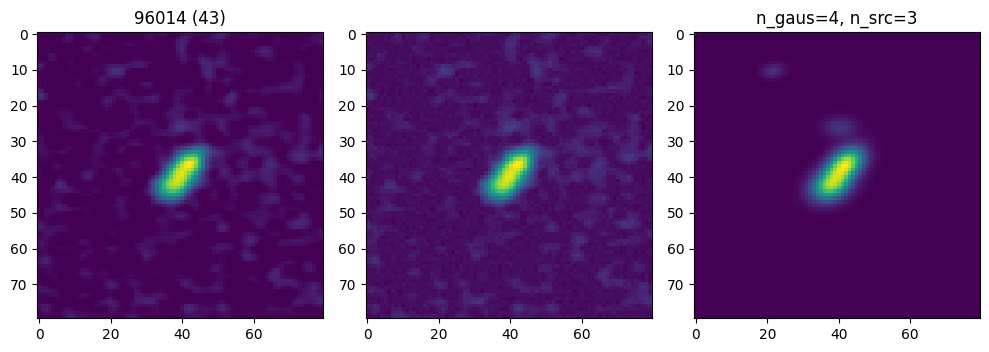

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


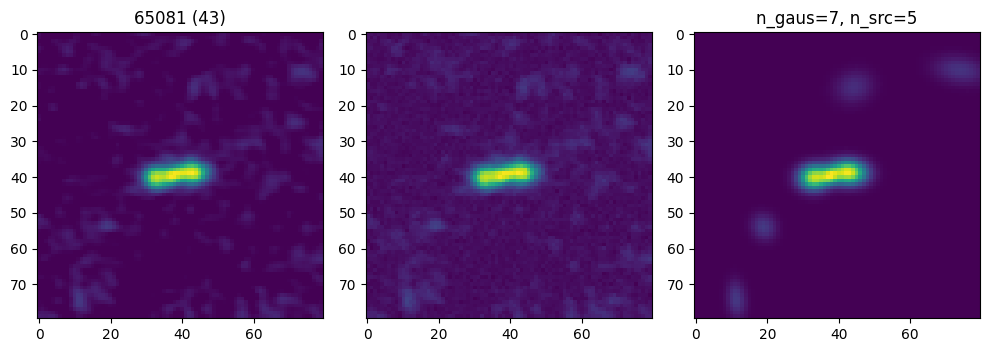

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


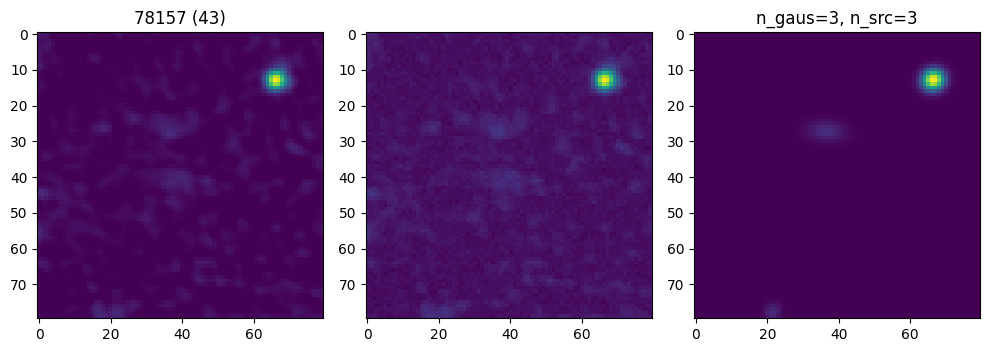

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


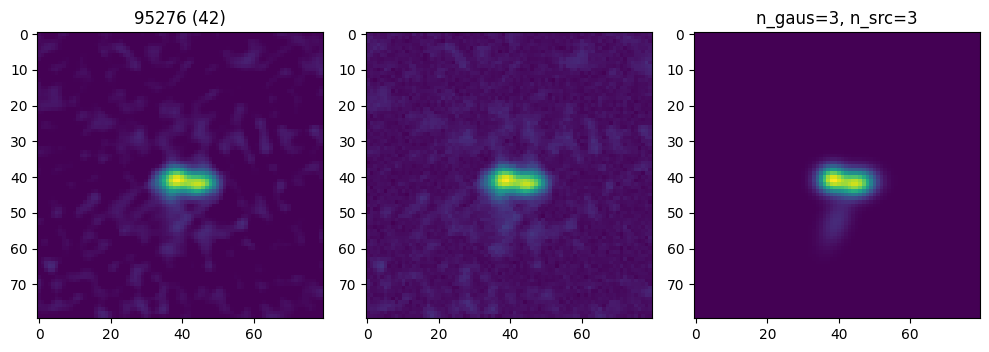

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


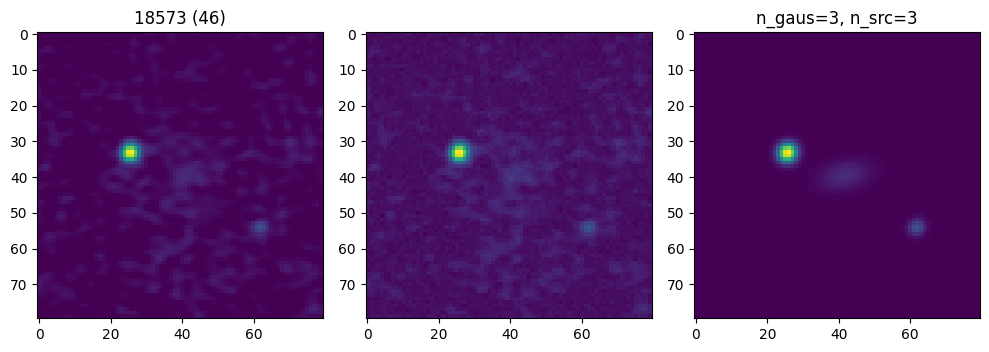

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


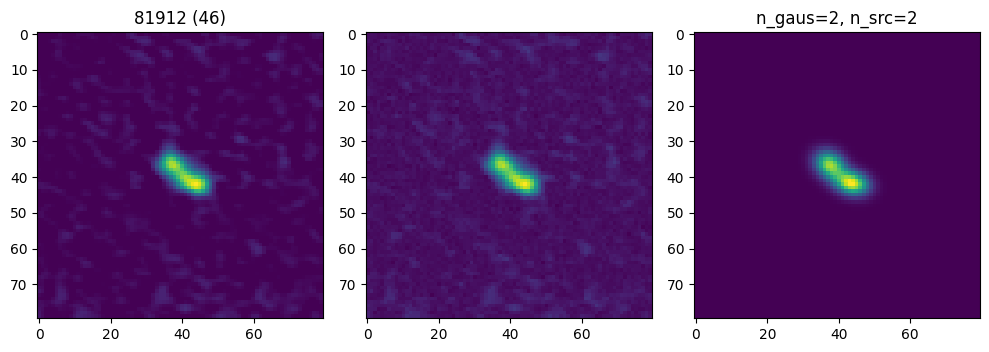

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


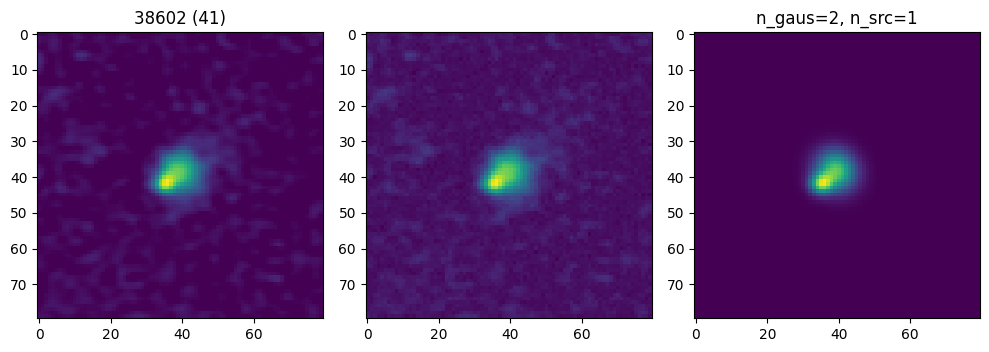

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


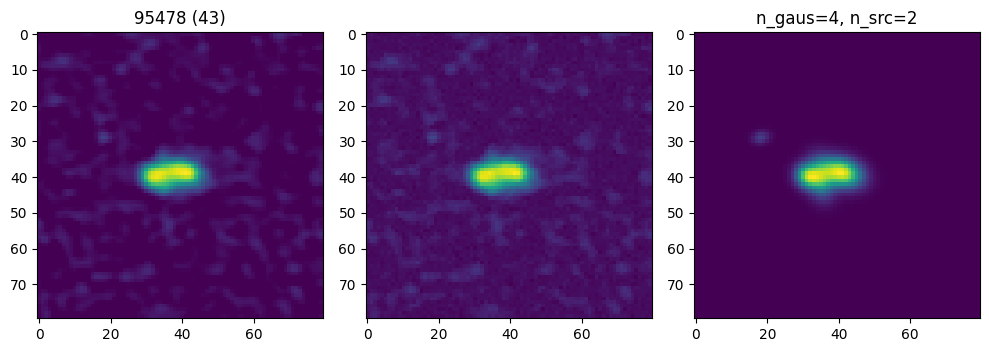

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


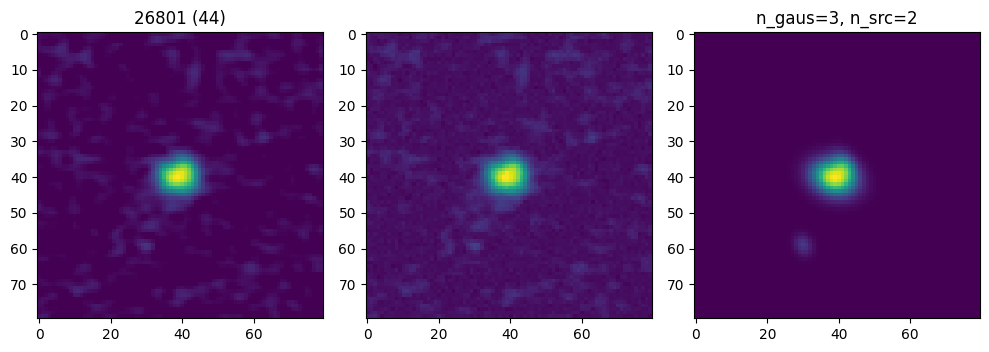

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


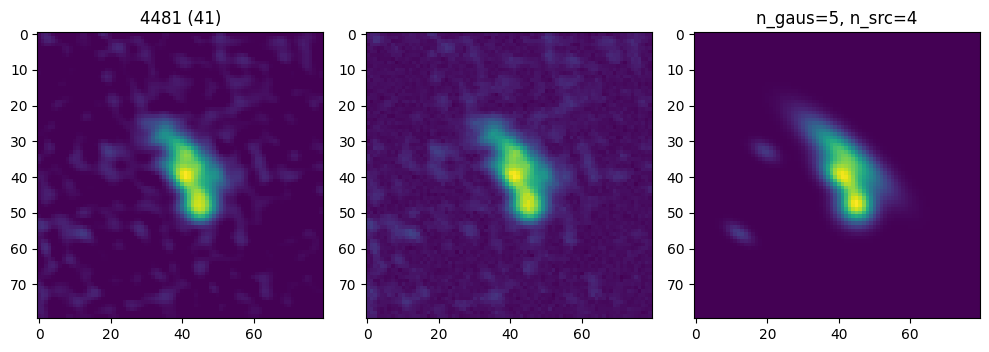

In [46]:
import analysis.bdsf_analysis

reload(analysis.bdsf_analysis)
from analysis.bdsf_analysis import *

ii = [
    # 45727, 14053,
    92059,
    50234,
    96885,
    49421,
    100484,
    67606,
    1493,
    18468,
]

n = 10
# Pick n random indexes
# idxs = np.random.choice(np.arange(len(dset))[metrics['nsrc'] > 40], n, replace=False)
for i in idxs:
    img = bdsf_on_image(
        dset[i].numpy().squeeze().T,
        thresh_isl=5,
        thresh="hard",
        rms_map=True,
        mean_map="default",
        # thresh=None,
    )

    d = dict_from_bdsf(img)
    n_gaus, n_src = d["ngaus"], d["nsrc"]

    fig, axs = plt.subplots(1, 3, figsize=(10, 5), tight_layout=True)
    axs[0].imshow(img_arr := dset[i].numpy().squeeze())
    axs[0].set_title(f'{i} ({metrics["nsrc"][i]})')
    axs[1].imshow(img.ch0_arr)
    axs[2].imshow(img.model_gaus_arr)
    axs[2].set_title(f"{n_gaus=}, {n_src=}")
    plt.show()

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


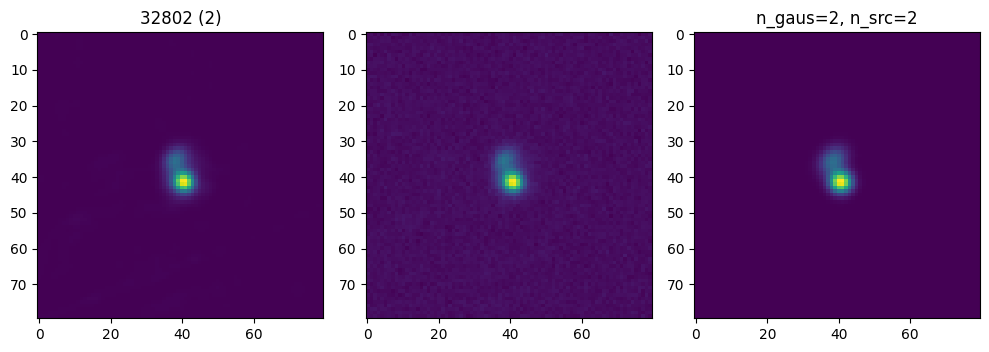

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


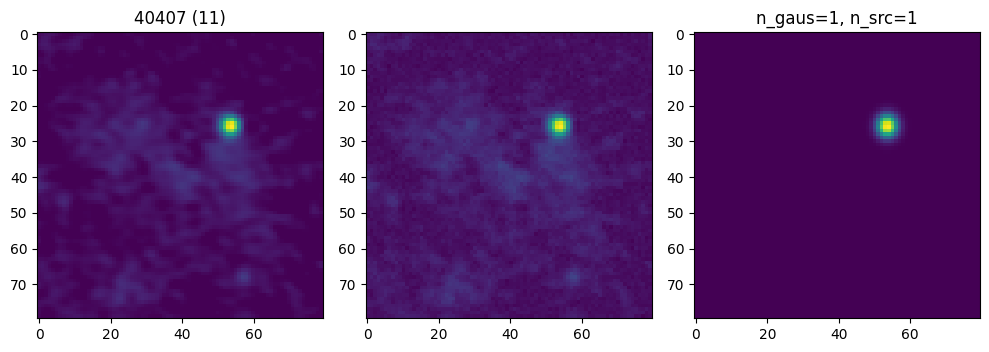

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


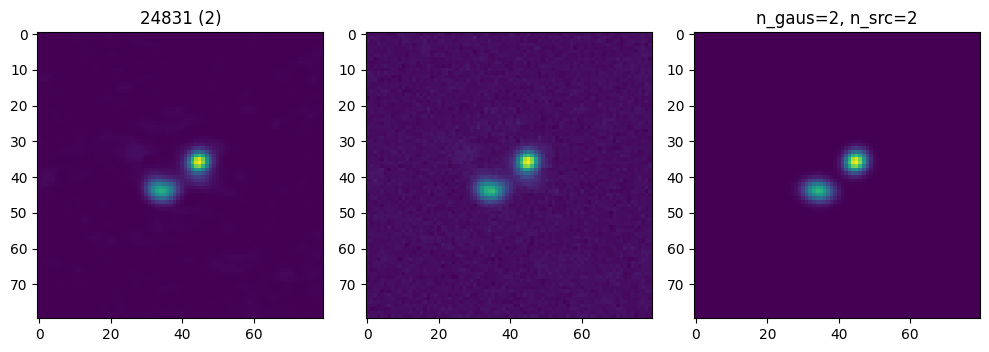

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


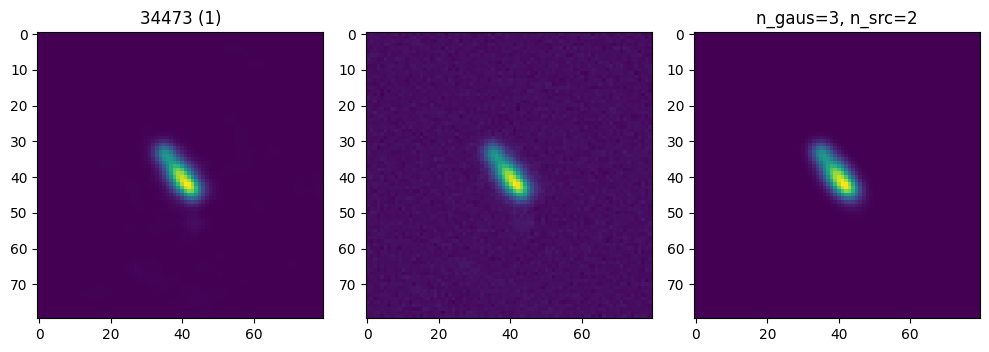

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


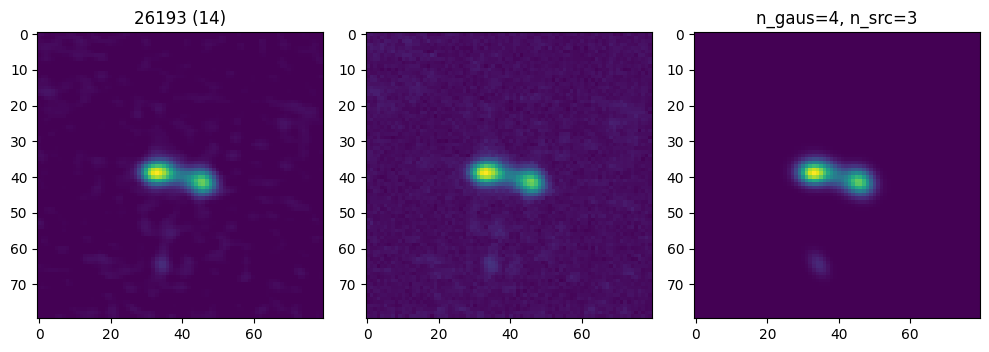

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


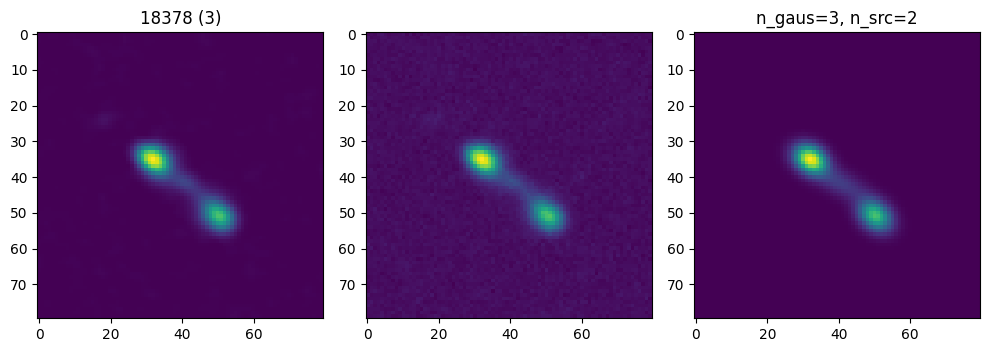

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


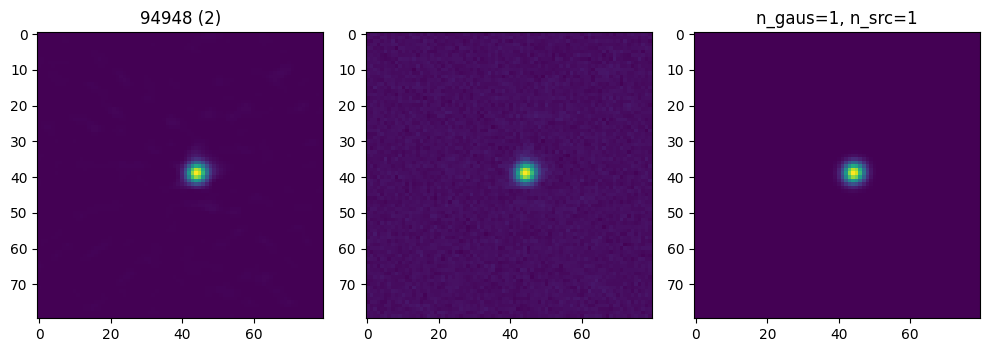

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


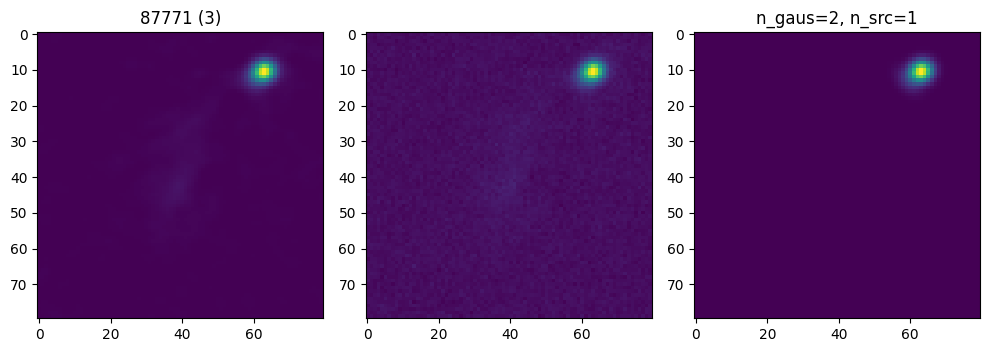

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


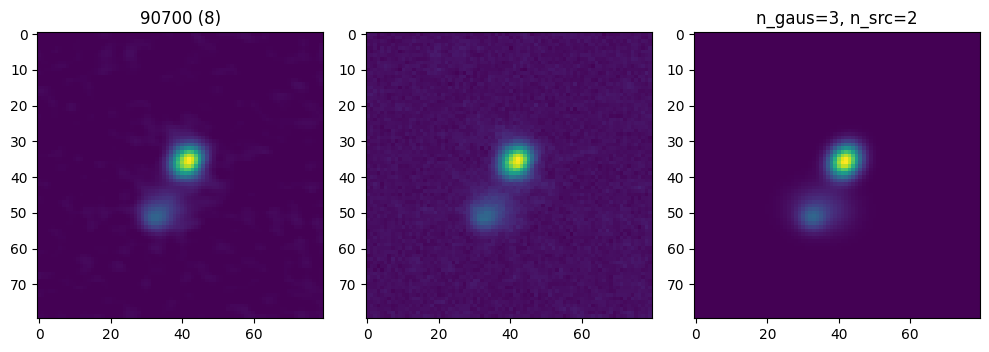

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


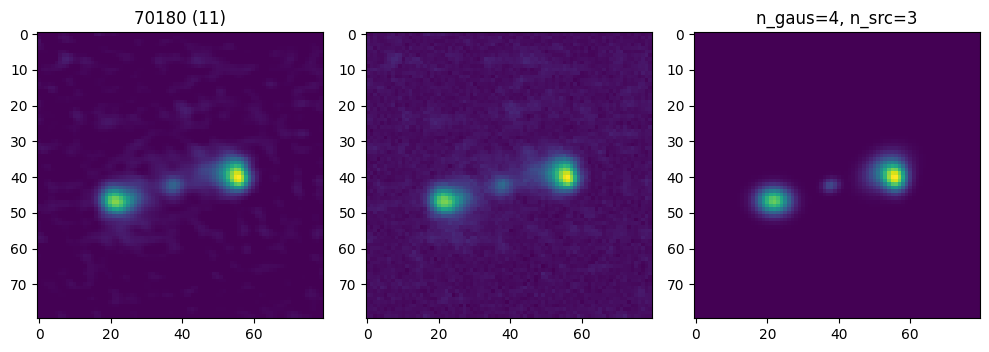

In [40]:
import analysis.bdsf_analysis

reload(analysis.bdsf_analysis)
from analysis.bdsf_analysis import *

ii = [
    # 45727, 14053,
    92059,
    50234,
    96885,
    49421,
    100484,
    67606,
    1493,
    18468,
]

n = 10
# Pick n random indexes
idxs = np.random.choice(np.arange(len(dset))[
                        metrics["nsrc"] < 20], n, replace=False)
for i in idxs:
    img = bdsf_on_image(
        dset[i].numpy().squeeze().T,
        thresh_isl=5,
        rms_map=True,
        mean_map="default",
        # thresh=None,
    )

    d = dict_from_bdsf(img)
    n_gaus, n_src = d["ngaus"], d["nsrc"]

    fig, axs = plt.subplots(1, 3, figsize=(10, 5), tight_layout=True)
    axs[0].imshow(img_arr := dset[i].numpy().squeeze())
    axs[0].set_title(f'{i} ({metrics["nsrc"][i]})')
    axs[1].imshow(img.ch0_arr)
    axs[2].imshow(img.model_gaus_arr)
    axs[2].set_title(f"{n_gaus=}, {n_src=}")
    plt.show()

In [28]:
cats[1].columns

Index(['# Source_id', 'Isl_id', 'RA', 'E_RA', 'DEC', 'E_DEC', 'Total_flux',
       'E_Total_flux', 'Peak_flux', 'E_Peak_flux', 'RA_max', 'E_RA_max',
       'DEC_max', 'E_DEC_max', 'Maj', 'E_Maj', 'Min', 'E_Min', 'PA', 'E_PA',
       'Maj_img_plane', 'E_Maj_img_plane', 'Min_img_plane', 'E_Min_img_plane',
       'PA_img_plane', 'E_PA_img_plane', 'DC_Maj', 'E_DC_Maj', 'DC_Min',
       'E_DC_Min', 'DC_PA', 'E_DC_PA', 'DC_Maj_img_plane',
       'E_DC_Maj_img_plane', 'DC_Min_img_plane', 'E_DC_Min_img_plane',
       'DC_PA_img_plane', 'E_DC_PA_img_plane', 'Isl_Total_flux',
       'E_Isl_Total_flux', 'Isl_rms', 'Isl_mean', 'Resid_Isl_rms',
       'Resid_Isl_mean', 'S_Code'],
      dtype='object')

In [26]:
attr_dict["island_labels"].shape

(80, 80)

# Conditioned Sampling

## Look at Distributions

In [22]:
from utils.data_utils import ImagePathDataset
import utils.paths as paths

dset = ImagePathDataset(paths.LOFAR_SUBSETS["0-clip"])

Loading images...
Data set initialized.


In [23]:
import numpy as np

max_vals = dset.max_values.numpy()
max_hist = np.histogram(max_vals, bins=100)

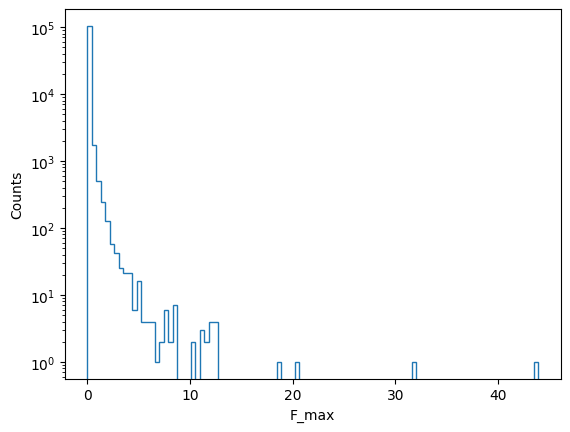

In [24]:
plt.stairs(*max_hist)
plt.xlabel("F_max")
plt.ylabel("Counts")
plt.yscale("log")

In [37]:
from scipy.special import boxcox, inv_boxcox
from sklearn import preprocessing as pr

boxcox_lambda = -0.22659119
max_tr = boxcox(max_vals, boxcox_lambda)
max_tr_sc = pr.scale(max_tr)

/hs/fs08/data/group-brueggen/tmartinez/envs/cenv_diffusion/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


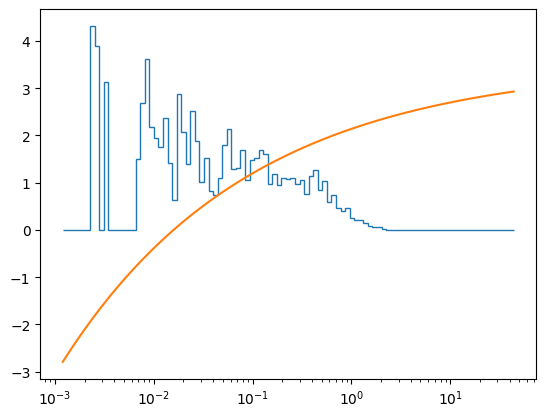

In [45]:
x = np.geomspace(max_vals.min(), max_vals.max(), 100)
hist = np.histogram(max_tr, bins=x, density=True)

plt.stairs(*hist)
plt.plot(x, (boxcox(x, boxcox_lambda) - max_tr.mean()) / max_tr.std())
plt.xscale("log")

Text(0, 0.5, 'Counts')

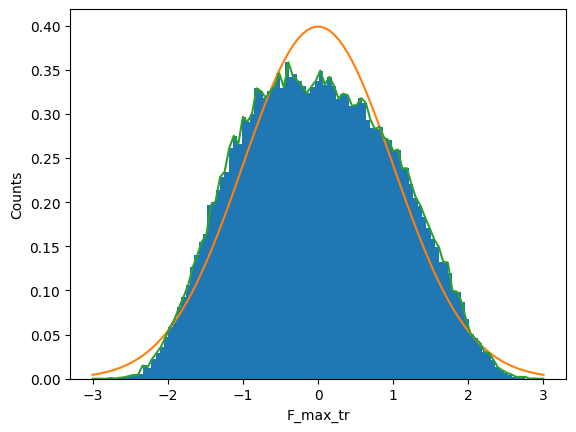

In [38]:
from scipy.stats import norm, rv_histogram

hist_tr_sc = np.histogram(max_tr_sc, bins=100)
model_dist = rv_histogram(hist_tr_sc, density=False)

plt.hist(max_tr_sc.flatten(), bins=100, density=True)
x = np.linspace(-3, 3, 100)
plt.plot(x, norm.pdf(x))
plt.plot(x, model_dist.pdf(x))
plt.xlabel("F_max_tr")
plt.ylabel("Counts")

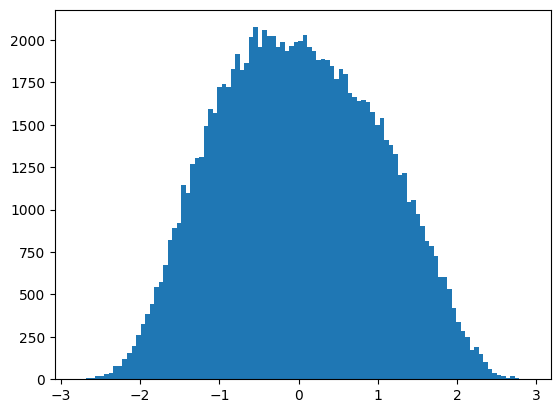

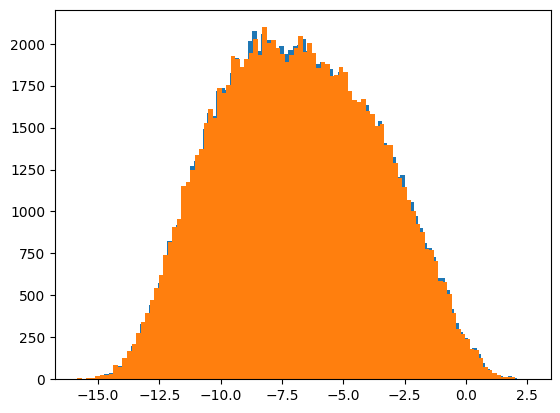

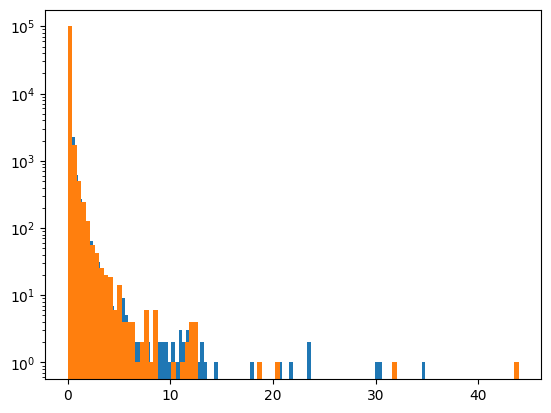

In [33]:
samples = model_dist.rvs(size=len(max_vals))
plt.hist(samples, bins=100)
plt.show()

unsc_samples = samples * np.std(max_tr) + np.mean(max_tr)

plt.hist(unsc_samples, bins=100)
plt.hist(max_tr, bins=100)
plt.show()

inv_samples = inv_boxcox(unsc_samples, boxcox_lambda)

plt.hist(inv_samples, bins=100)
plt.hist(max_vals, bins=100)
plt.yscale("log")
plt.show()

## Generate Samples

Loading images...
Data set initialized.
Max values transformed with Box-Cox transformation ([-0.22999055]).


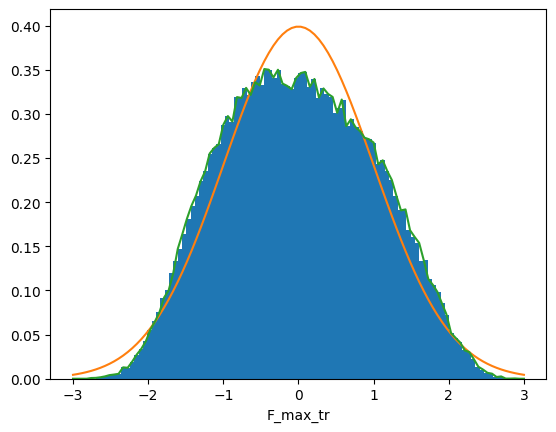

In [3]:
import utils.data_utils

reload(utils.data_utils)

from utils.data_utils import ImagePathDataset, TrainDataset
import utils.paths as paths
from scipy.special import boxcox, inv_boxcox
from scipy.stats import norm, rv_histogram
from sklearn import preprocessing as pr
import numpy as np

# Load dataset to get max-val distribution
dset = TrainDataset(paths.LOFAR_SUBSETS["0-clip"])
max_vals = dset.max_values.numpy()
max_hist = np.histogram(max_vals, bins=100)

# Apply power-transform to make distribution more gaussian
dset.transform_max_vals()
boxcox_lambda = dset.box_cox_lambda
max_tr = boxcox(max_vals, boxcox_lambda)
max_tr_sc = pr.scale(max_tr)

# Make model distribution to sample from
hist_tr_sc = np.histogram(max_tr_sc, bins=100)
model_dist = rv_histogram(hist_tr_sc, density=False)

# Plot both distributions
plt.hist(max_tr_sc.flatten(), bins=100, density=True)
x = np.linspace(-3, 3, 100)
plt.plot(x, norm.pdf(x))
plt.plot(x, model_dist.pdf(x))
plt.xlabel("F_max_tr")
plt.show()

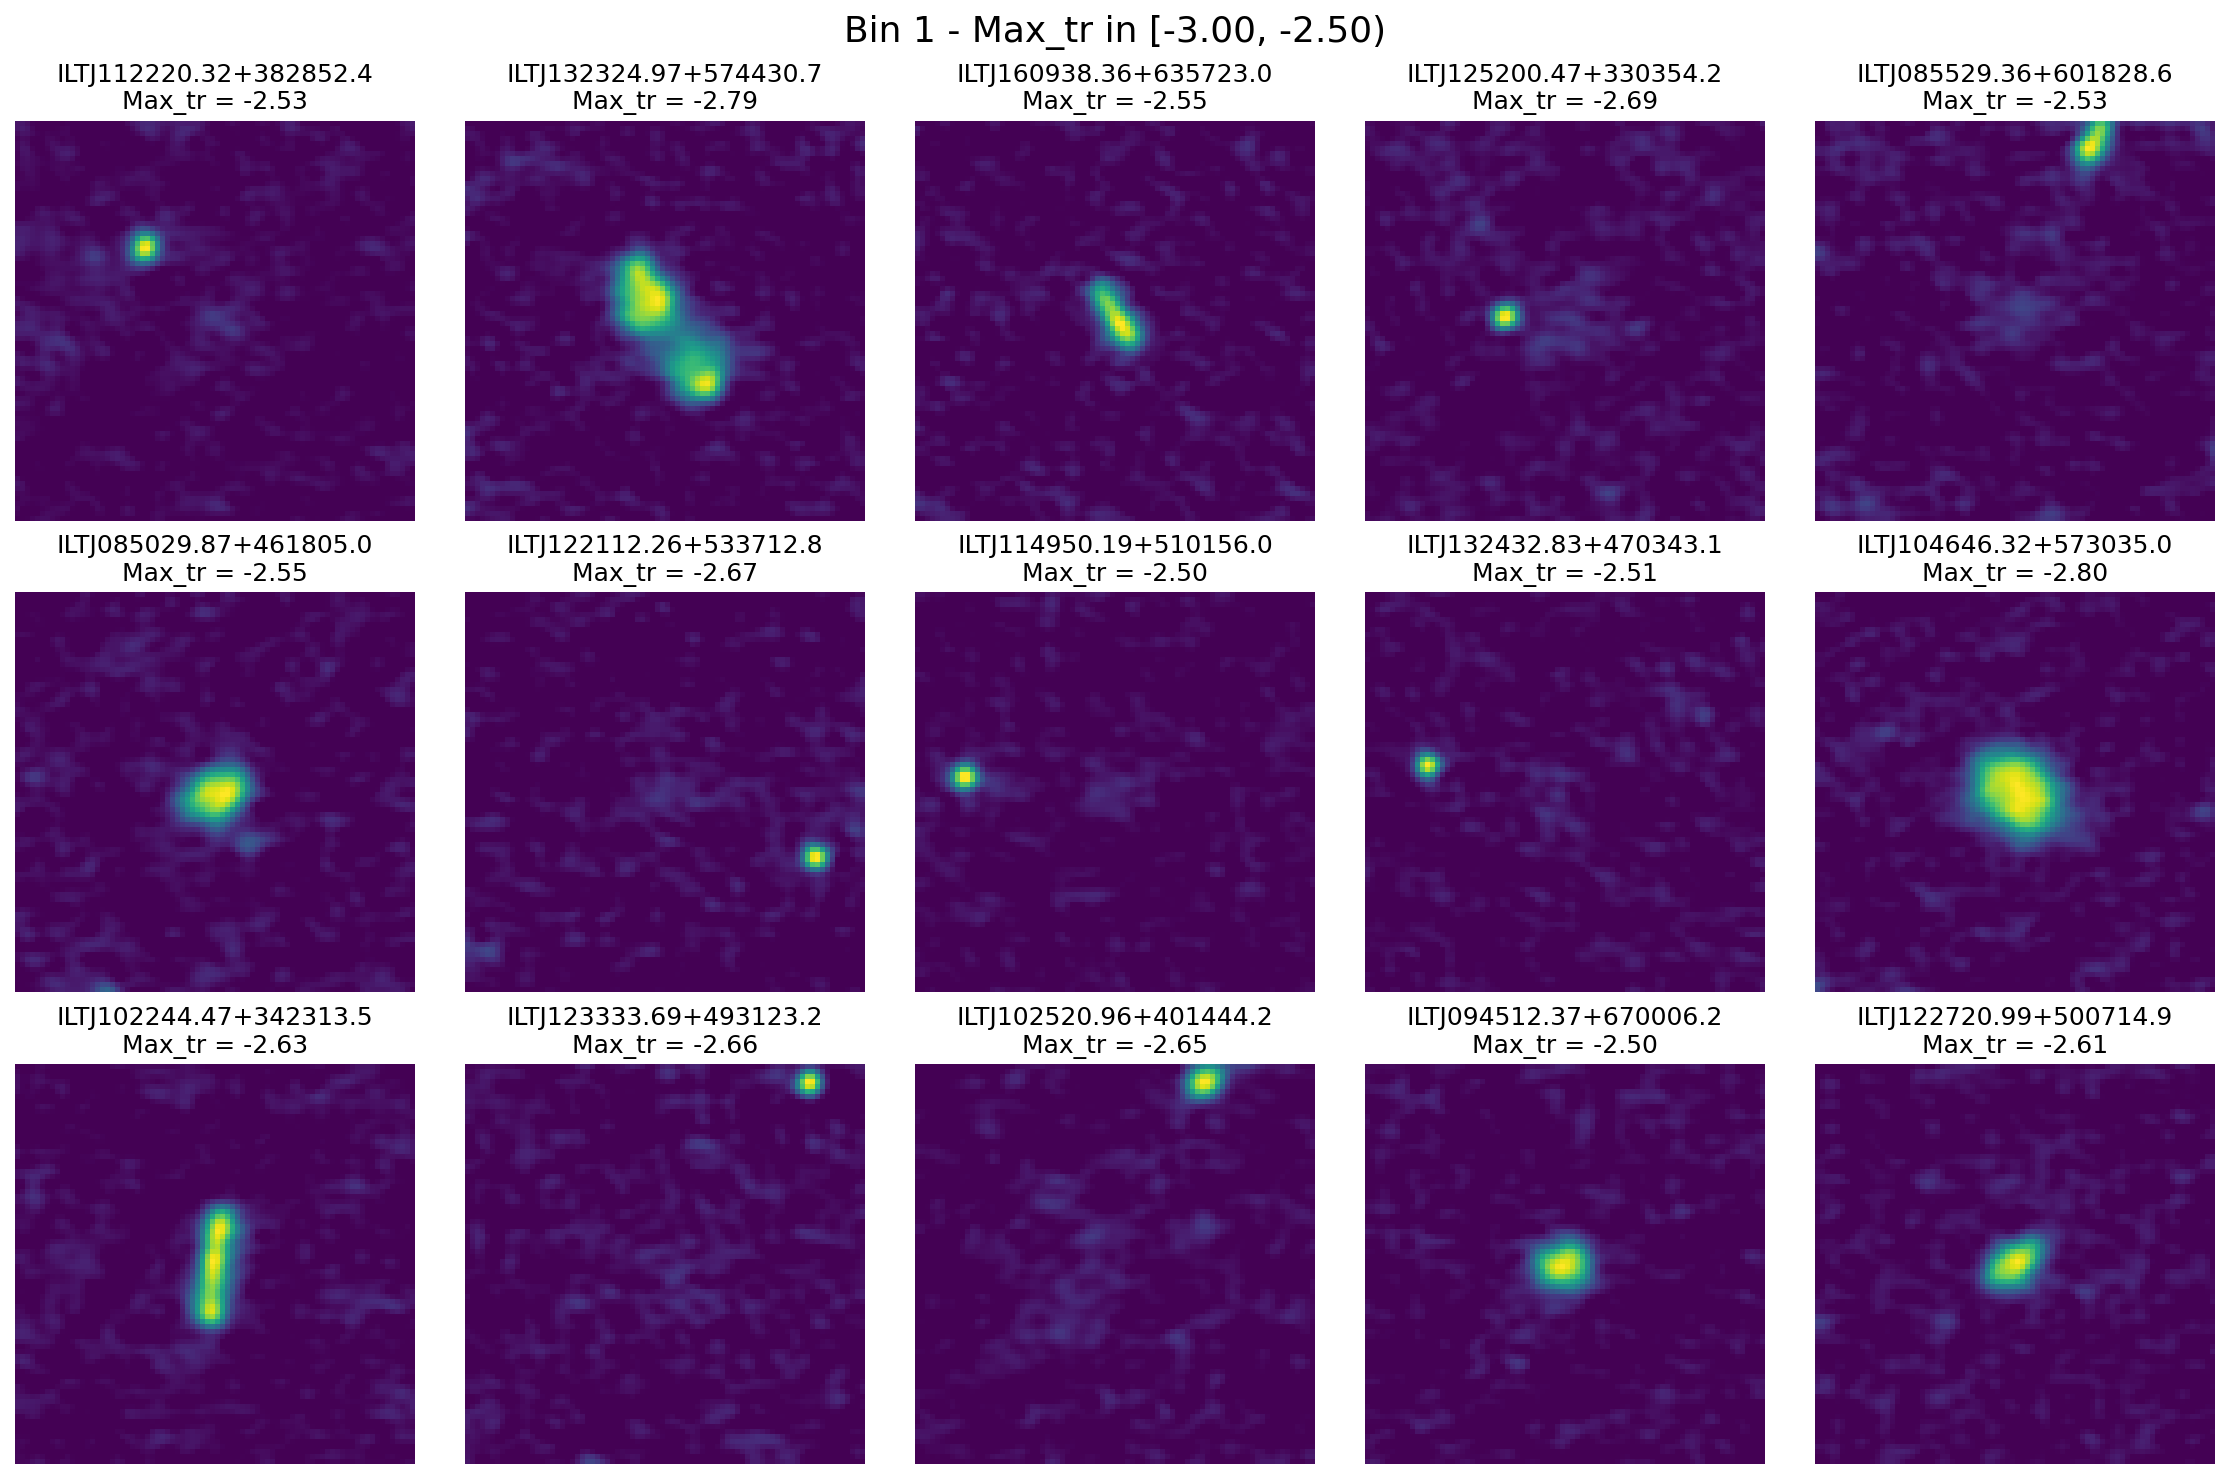

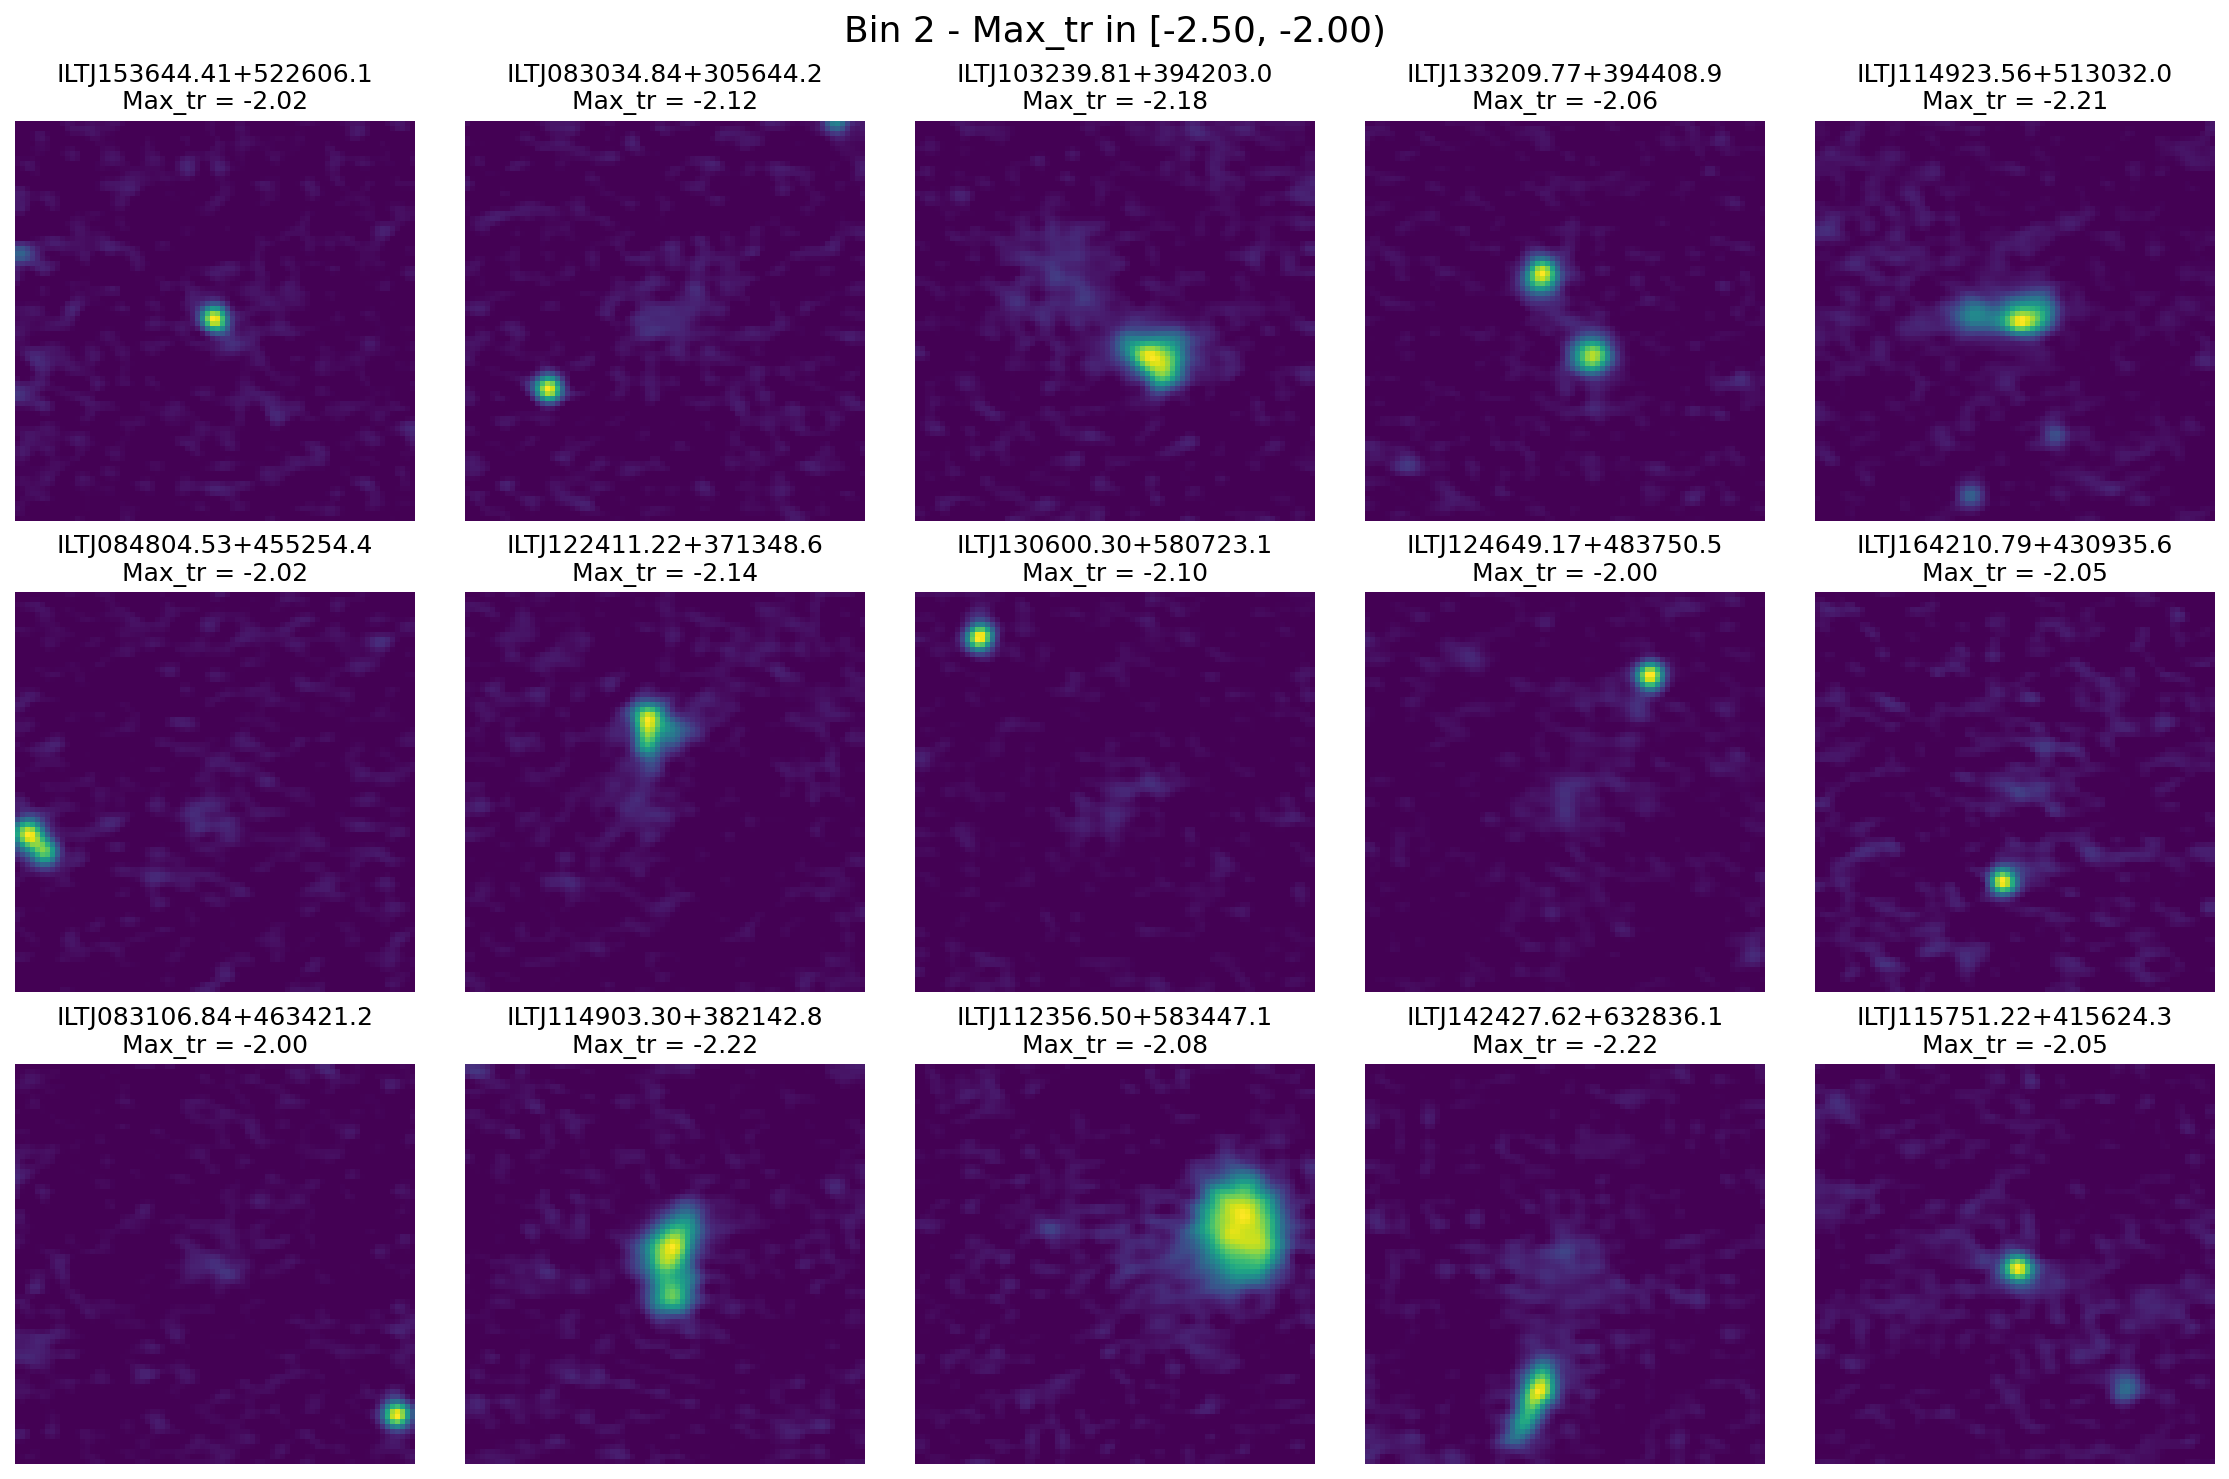

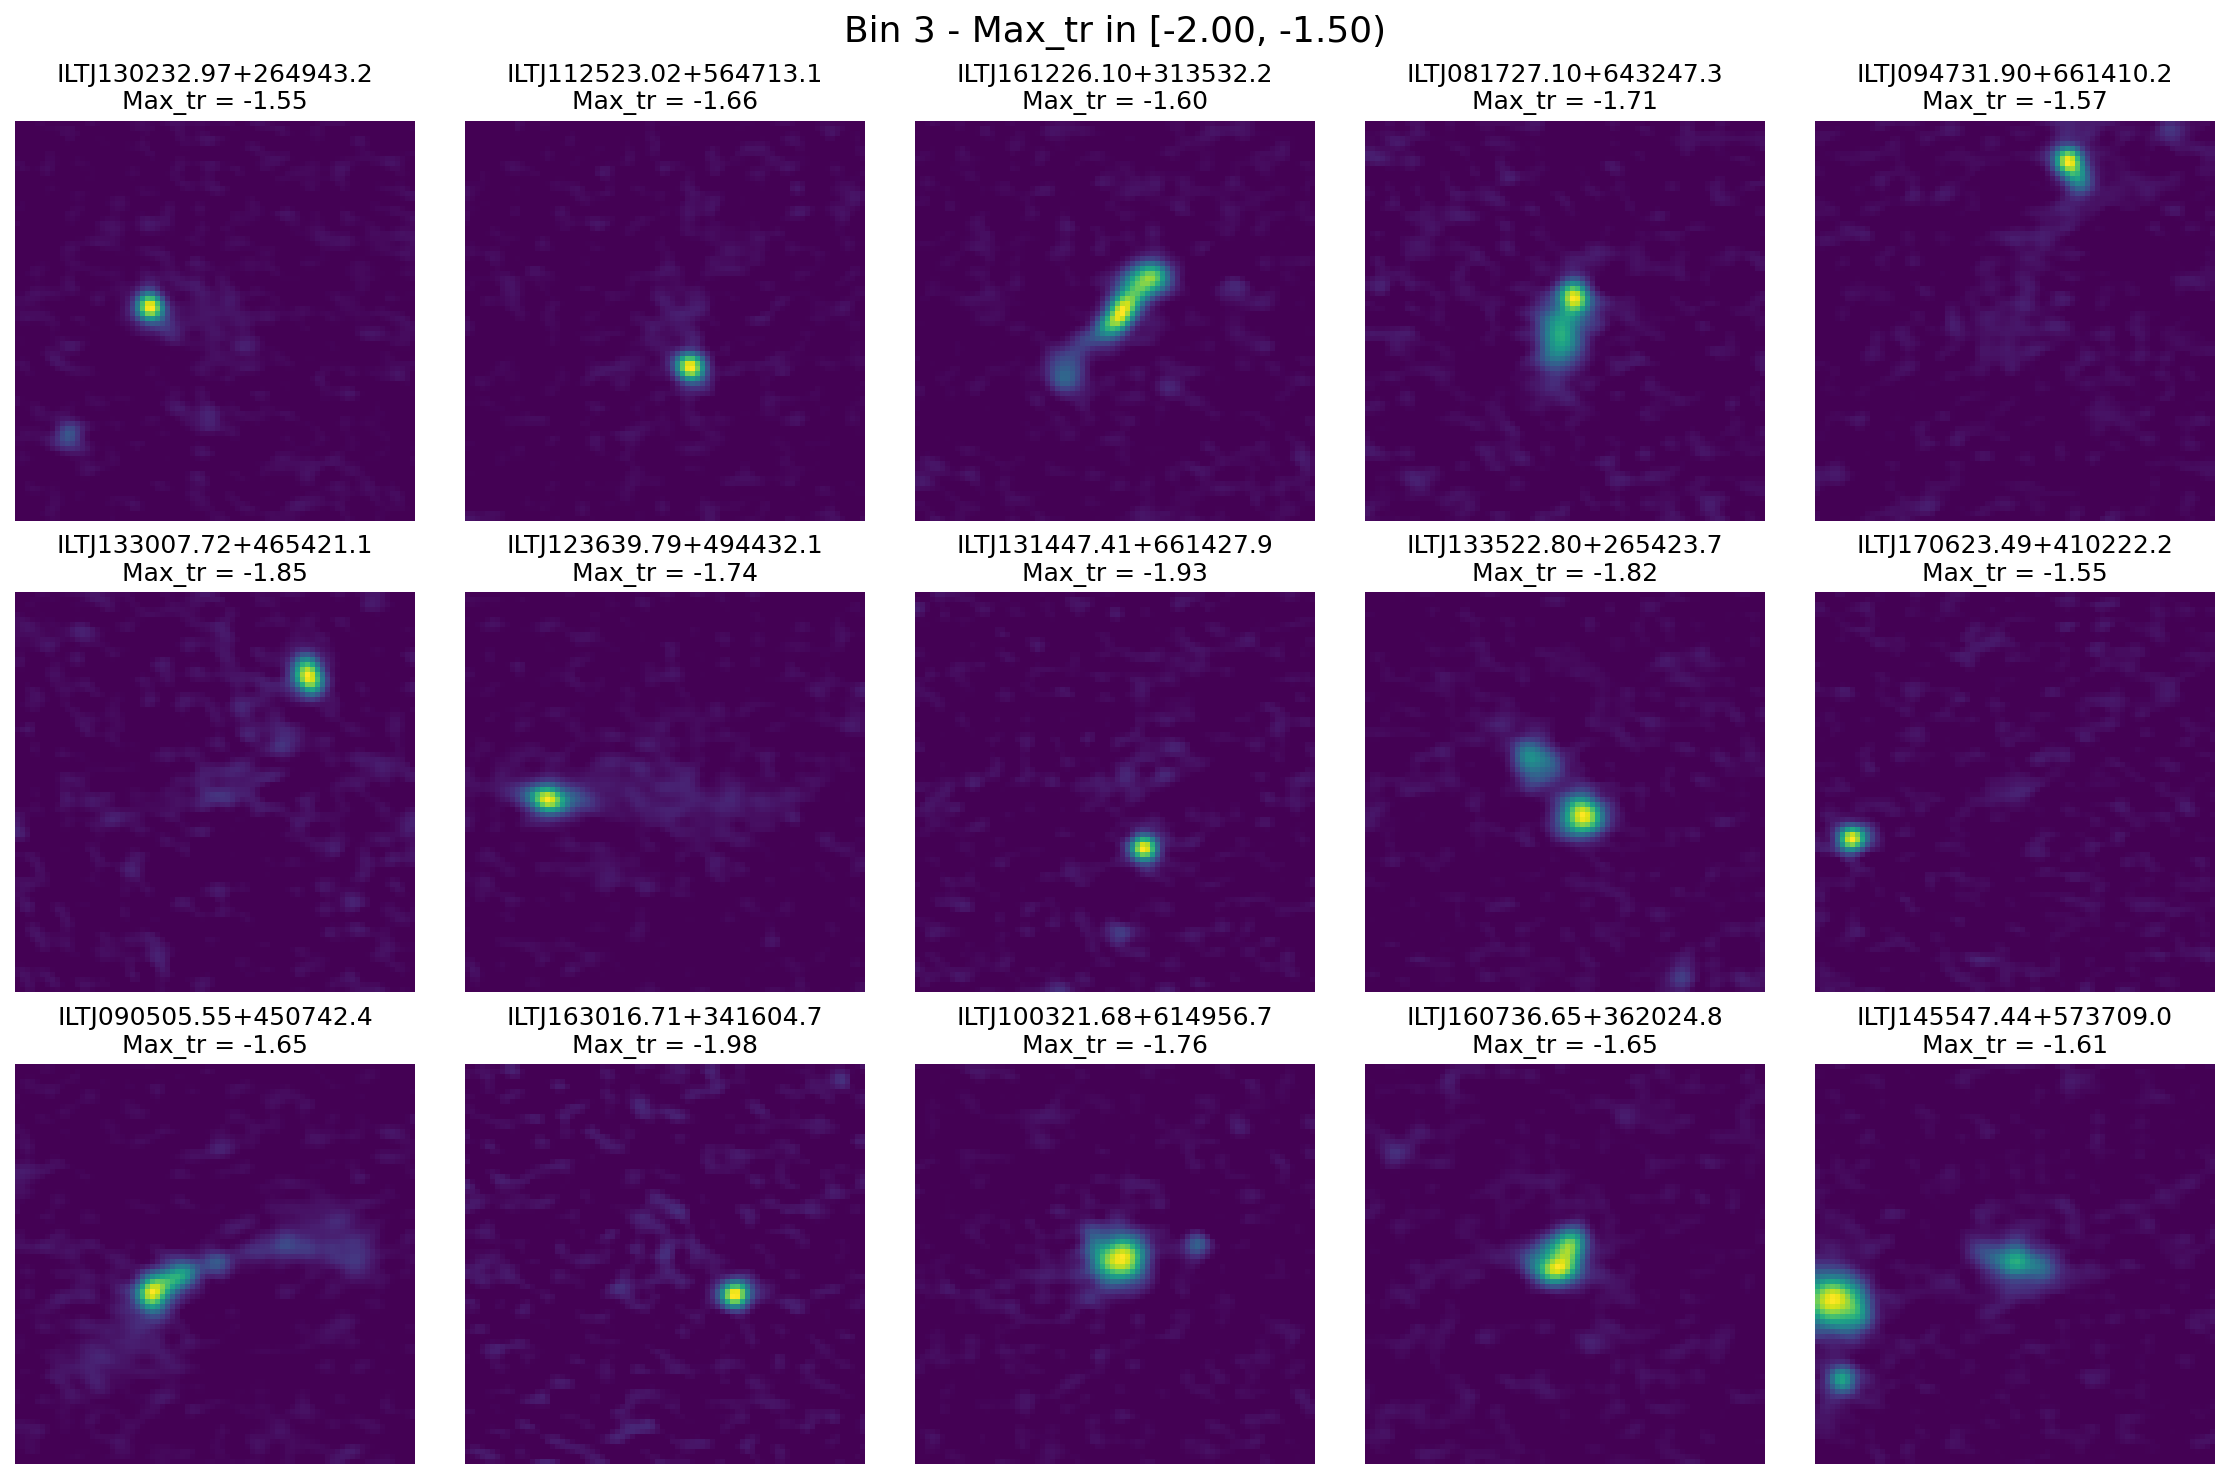

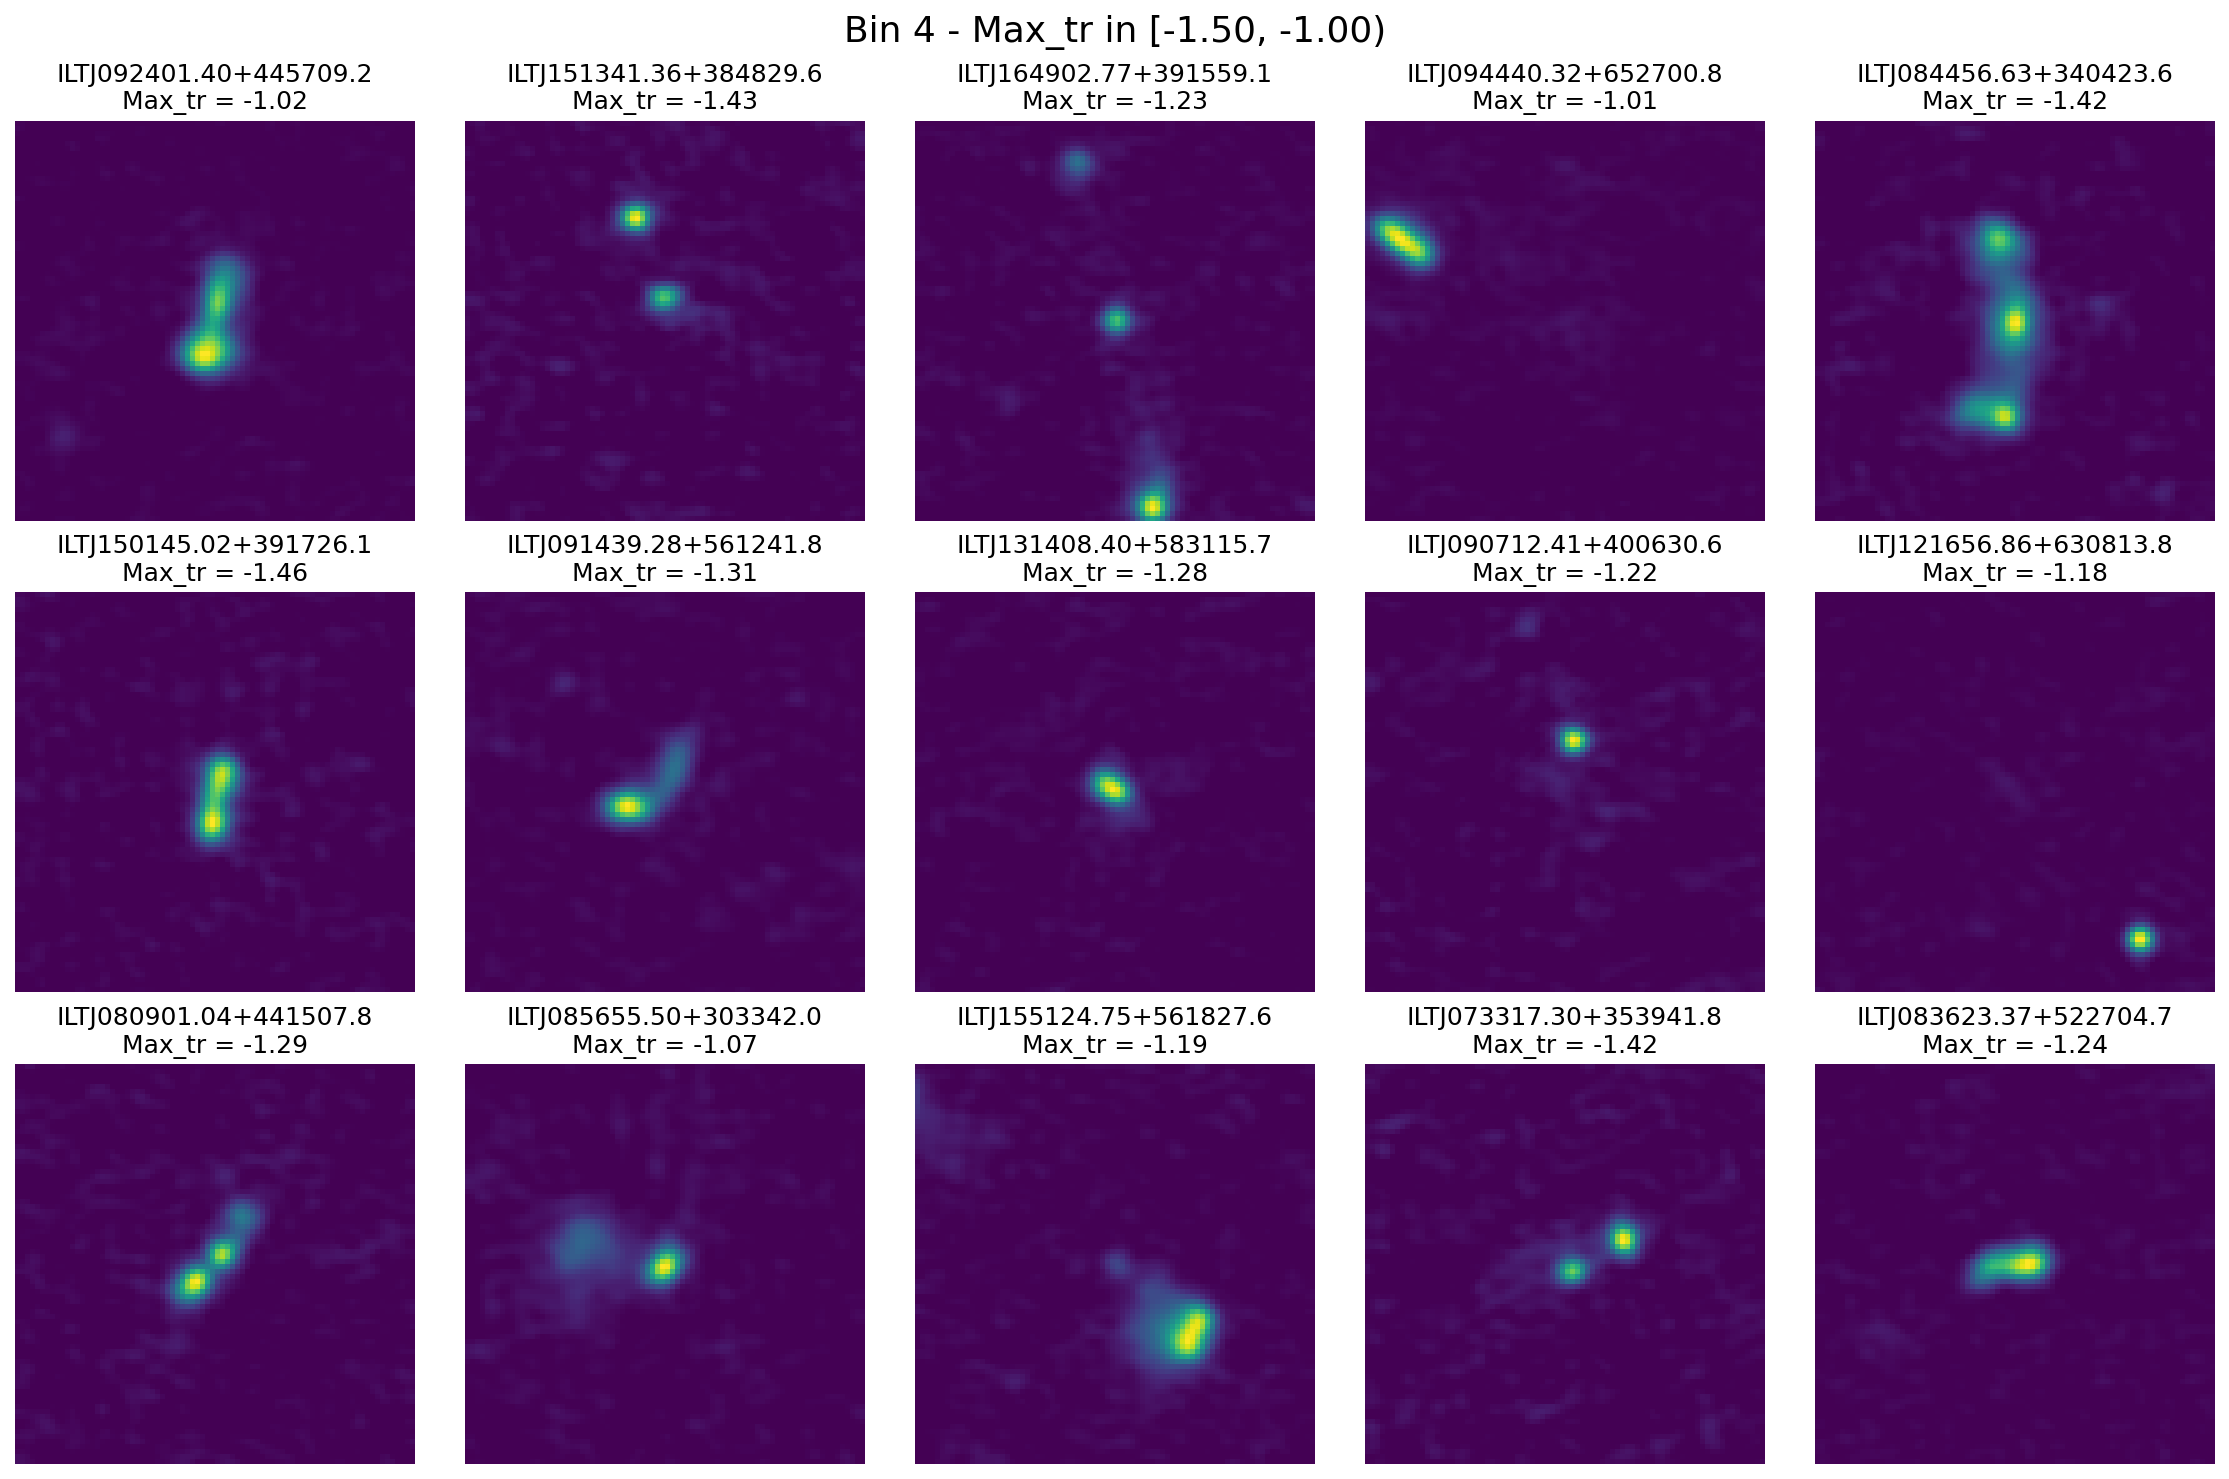

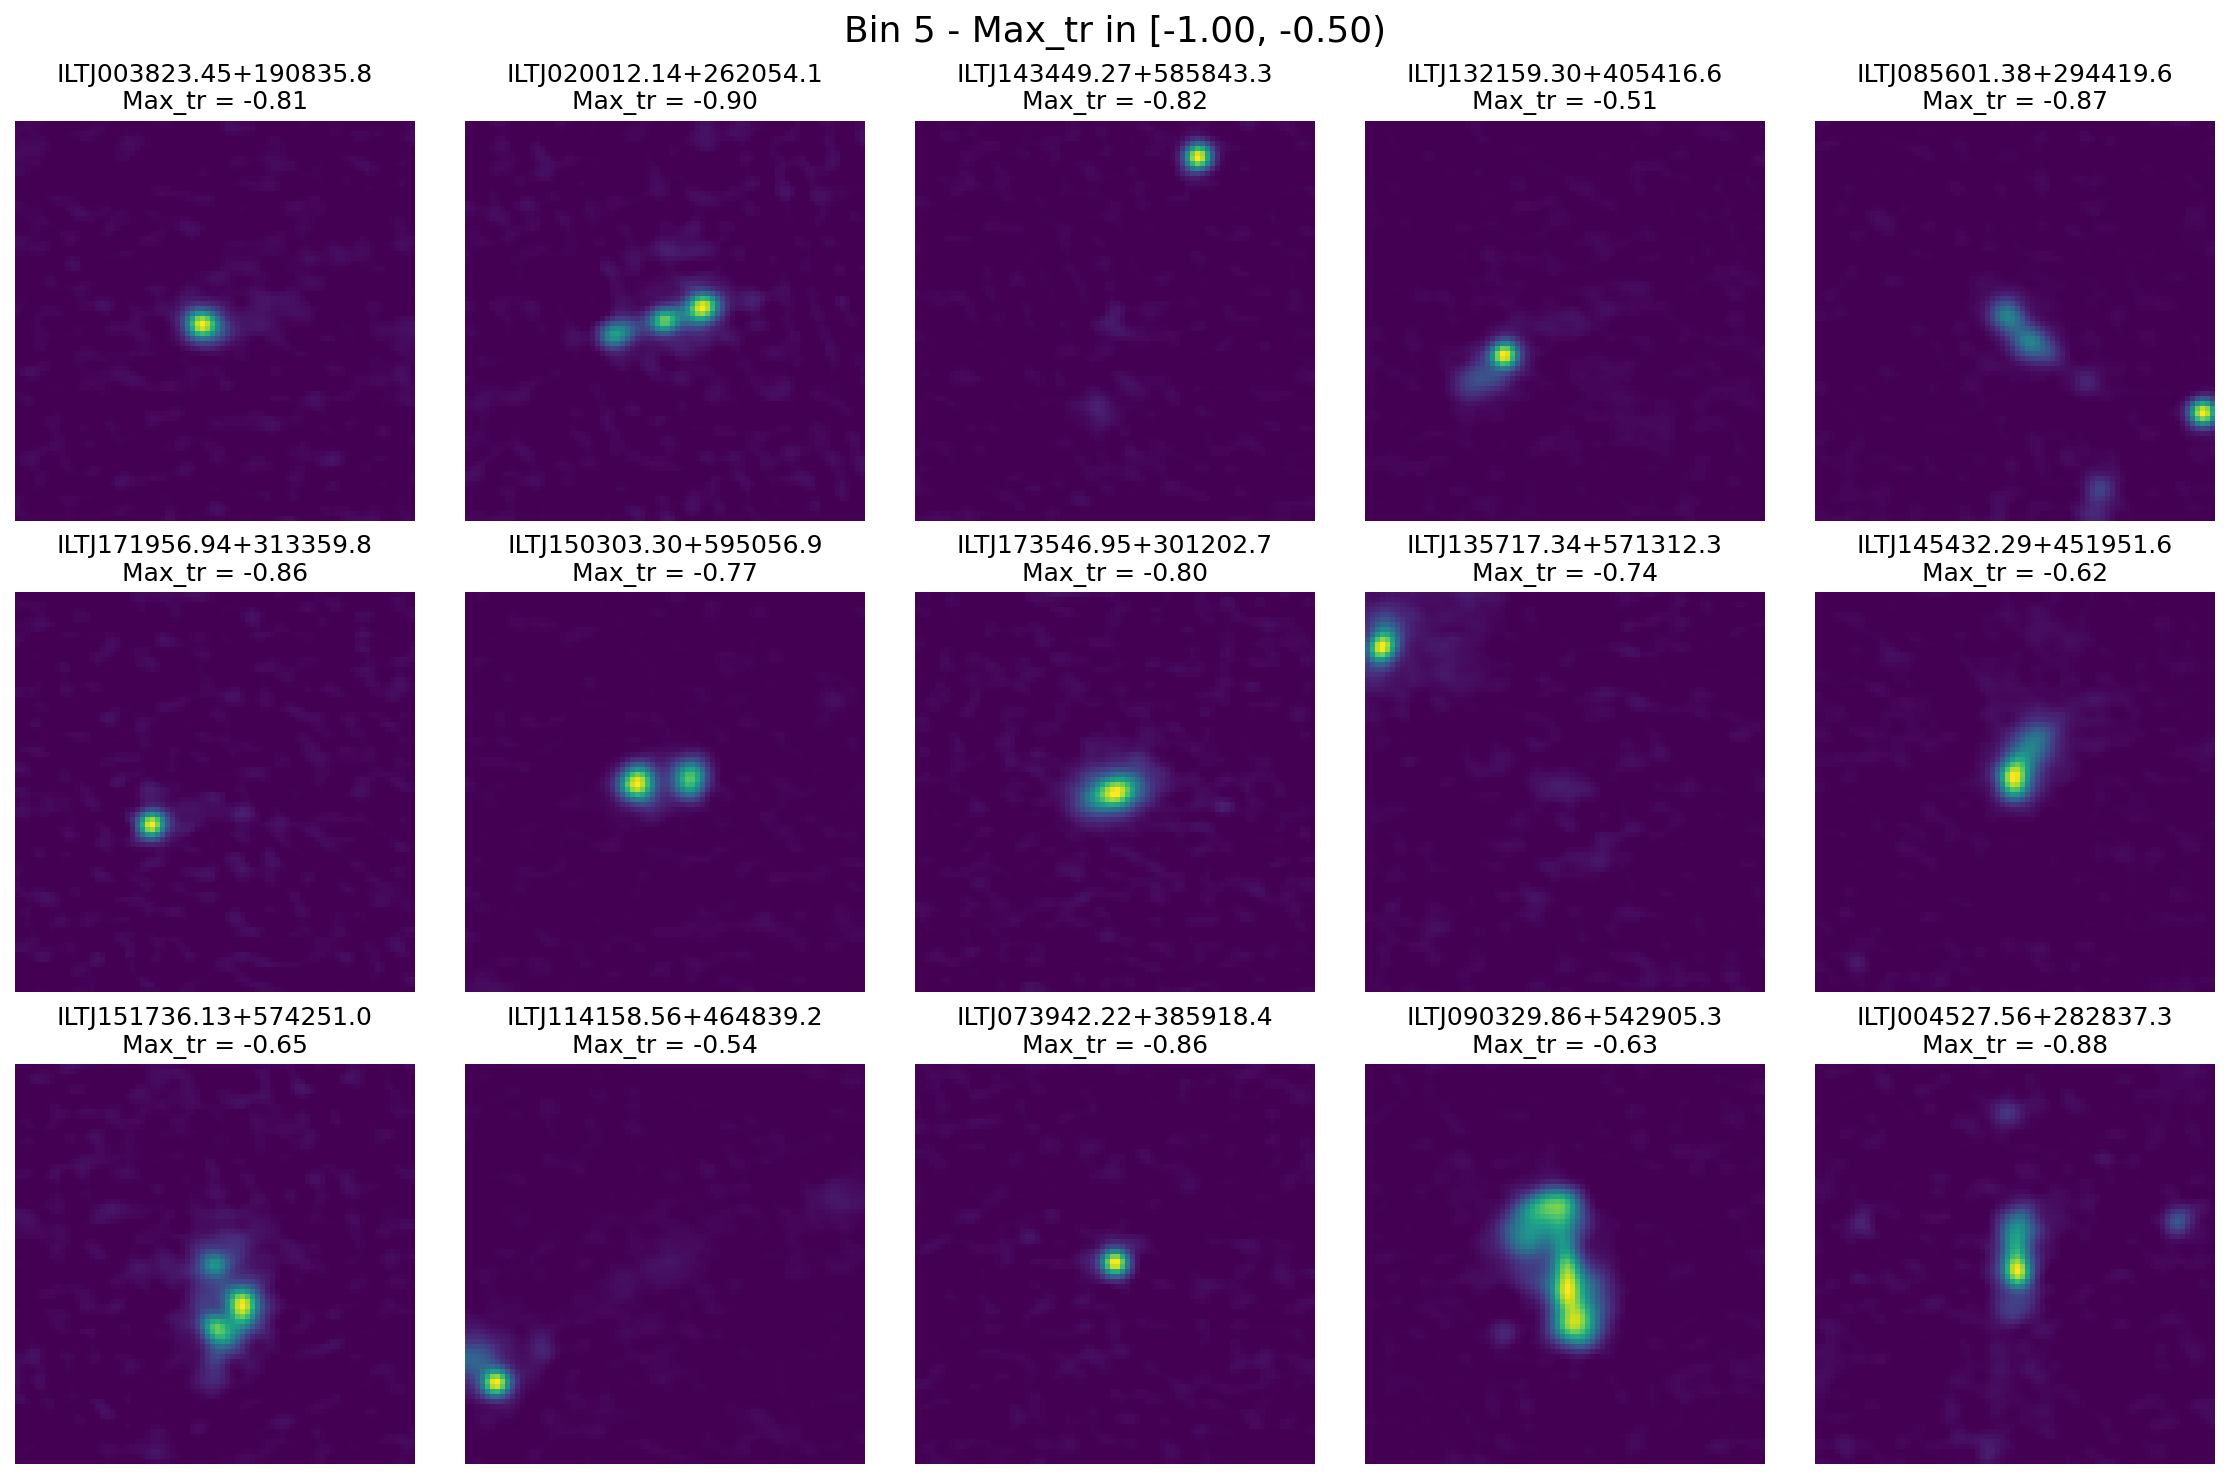

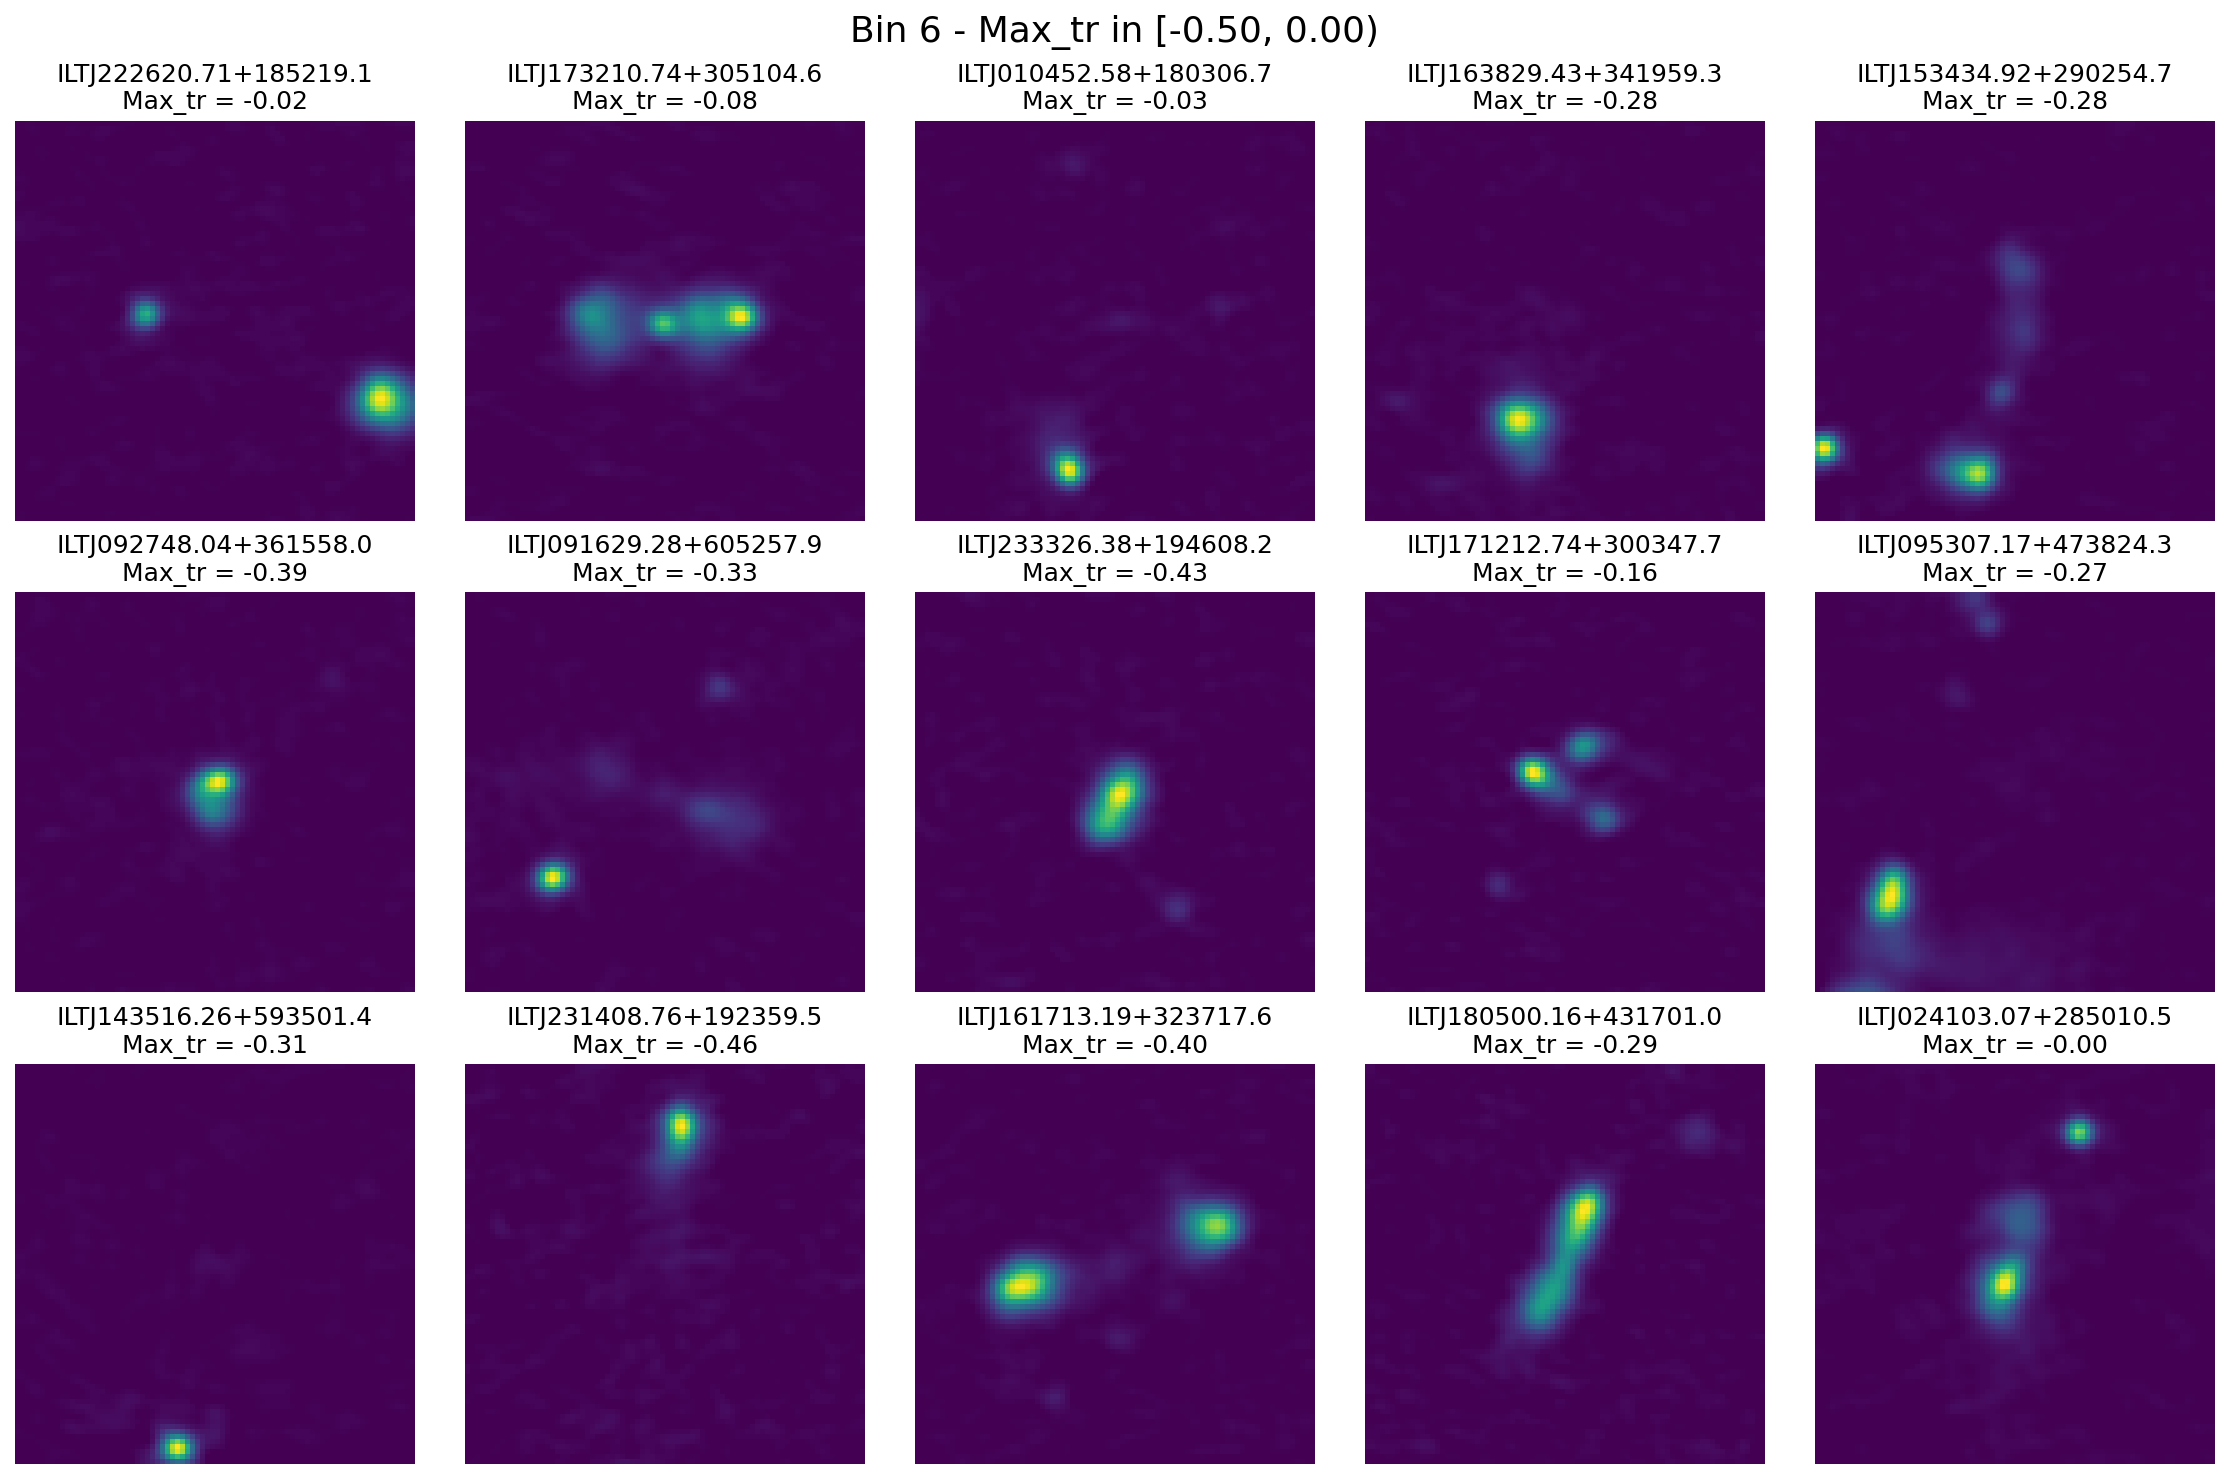

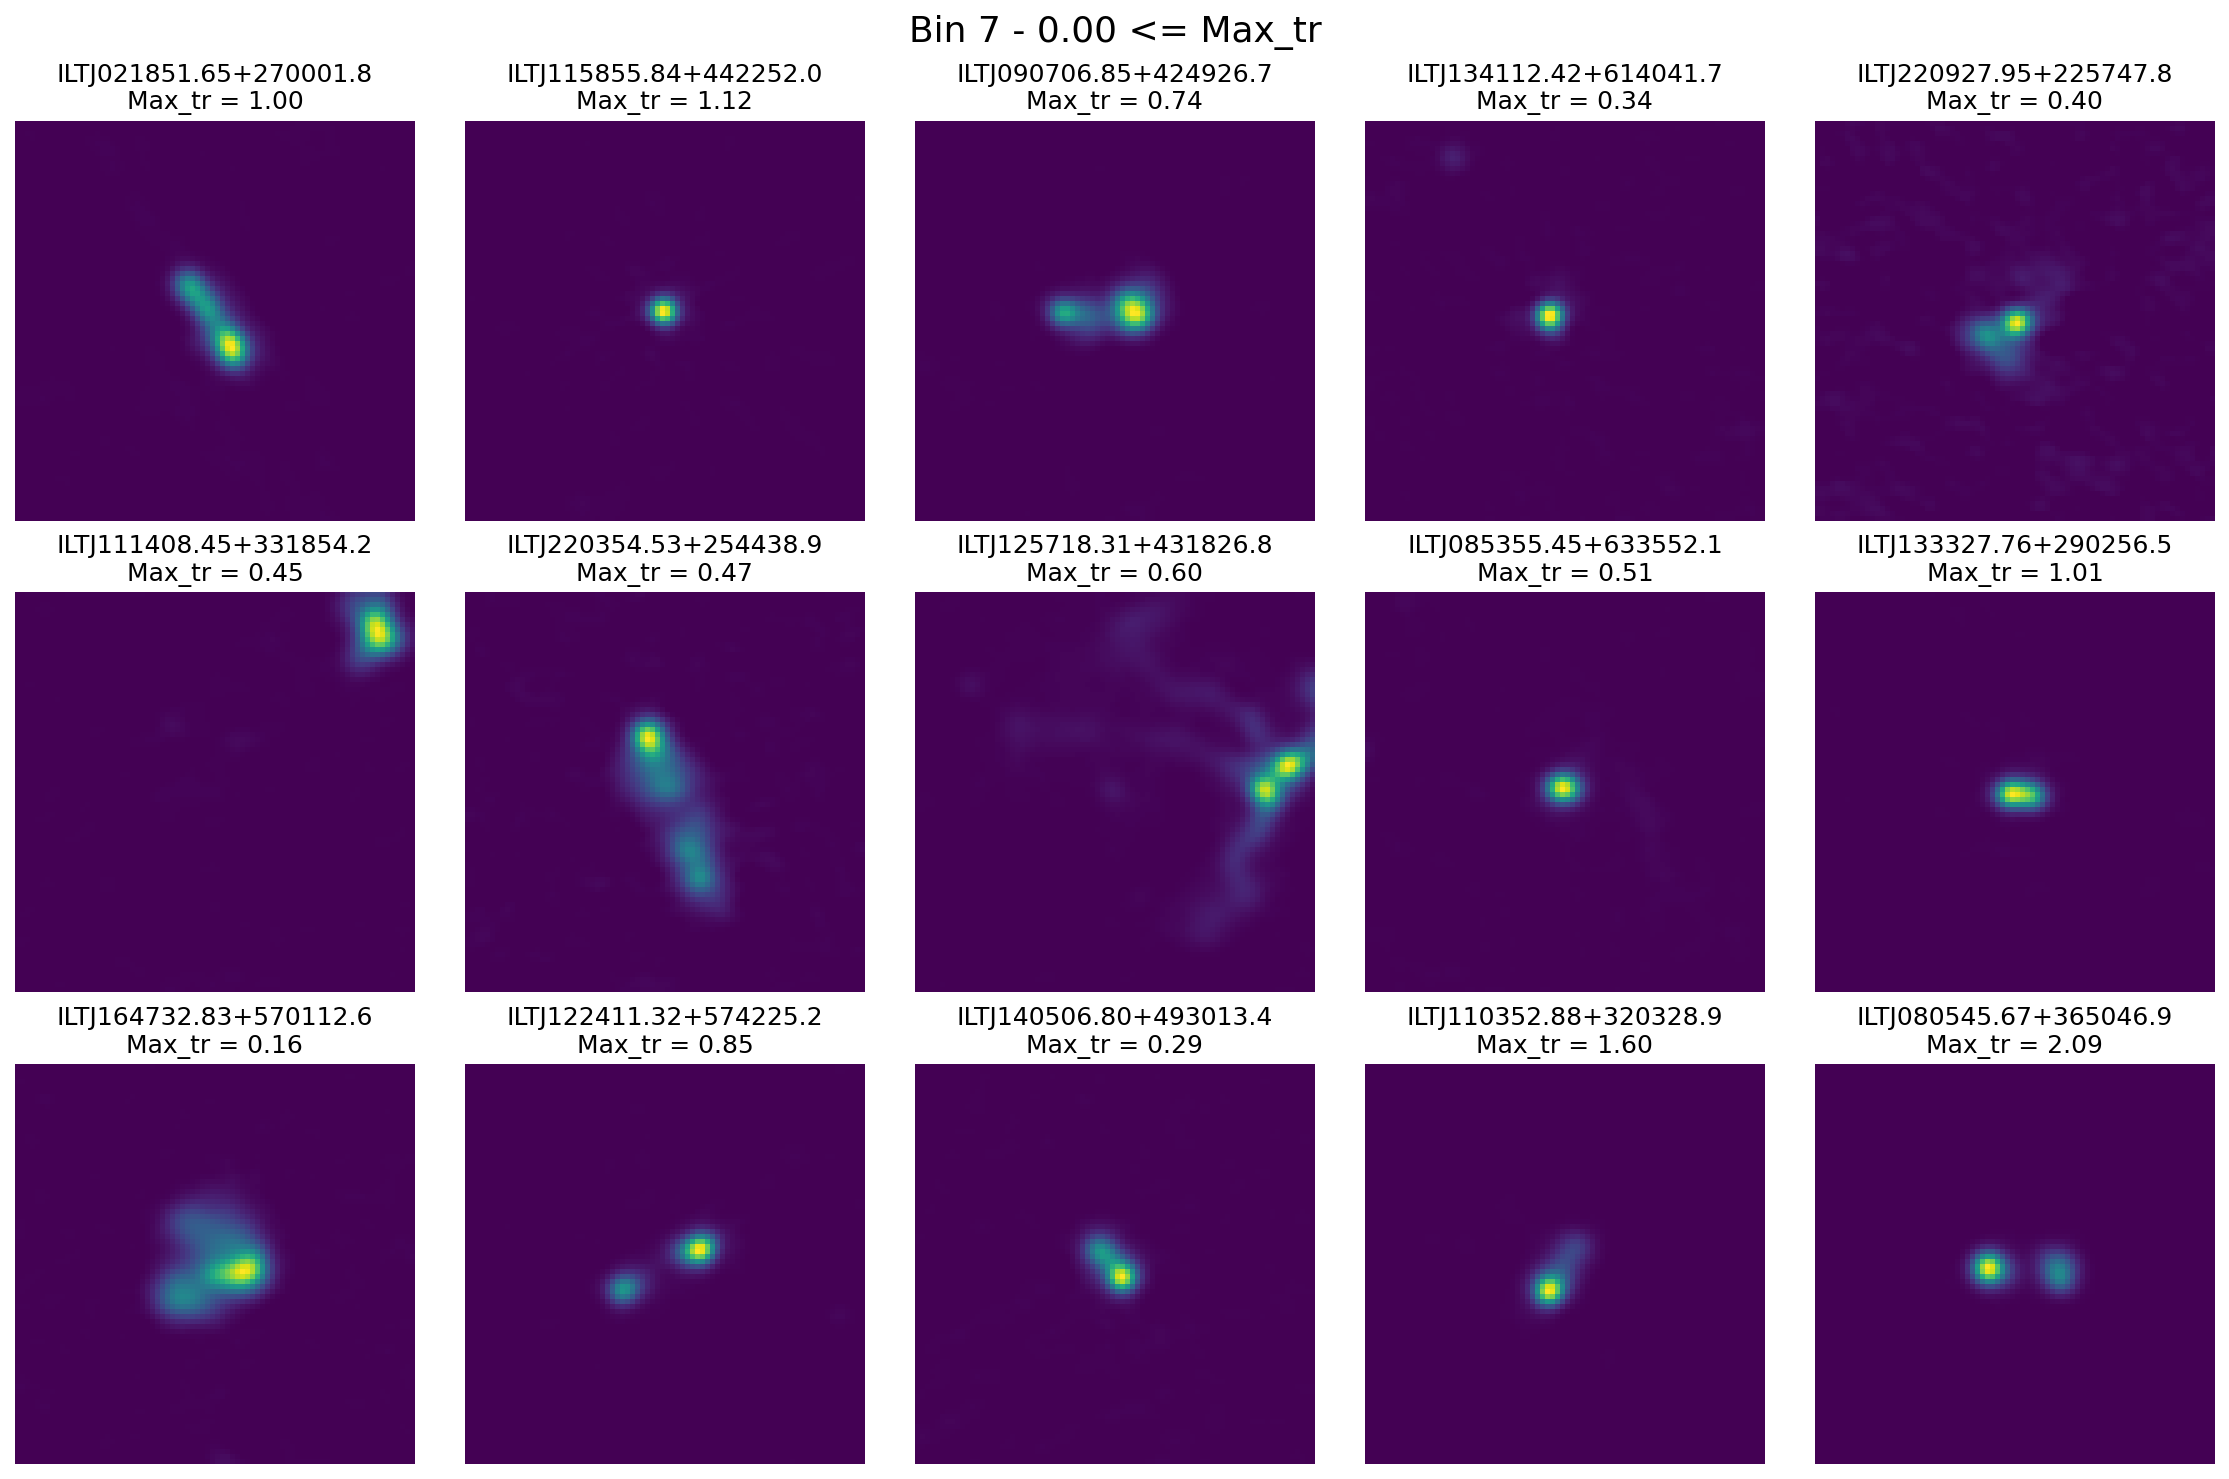

In [4]:
import plotting.plot_images

reload(plotting.plot_images)
from plotting.plot_images import metric_peek

metric_peek(
    dset.max_values_tr,
    np.linspace(-3, 0, 7),
    dset.data,
    dset.names,
    metric_name="Max_tr",
    n_examples=15,
)

In [4]:
from utils.init_utils import load_model_by_name
from utils.device_utils import distribute_model

model = load_model_by_name("Fmax_Context_MLP")
model, devs = distribute_model(model)
print(devs)

Loading model from /hs/fs08/data/group-brueggen/tmartinez/model_results/Fmax_Context_MLP/parameters_Fmax_Context_MLP.pt and /hs/fs08/data/group-brueggen/tmartinez/model_results/Fmax_Context_MLP/config_Fmax_Context_MLP.json
[0]


In [5]:
from model.sample import sample_batch
from utils.init_utils import load_model_by_name
from utils.device_utils import distribute_model
import torch
from scipy.special import boxcox

# fmax = [1e-3, 4e-3, 8e-3, 1e-2, 5e-2, 3e-1, 1.5, 5, 10, 50]
# fmax_tr = [(boxcox(f, boxcox_lambda) - max_tr.mean()) / max_tr.std() for f in fmax]

fmax_tr = [-5, -3, -2.5, -2, -1, 0, 1, 2, 3, 5]

context_batch = torch.cat([torch.tensor([f] * 50)
                          for f in fmax_tr]).reshape(-1, 1)

# Sample:
samples = sample_batch(
    model,
    500,
    context_batch=context_batch,
    guidance_strength=0.1,
)

Sampling on device: cuda:0


Sampling...:   0%|          | 0/25 [00:00<?, ?it/s]

Sampling...: 100%|██████████| 25/25 [01:38<00:00,  3.95s/it]


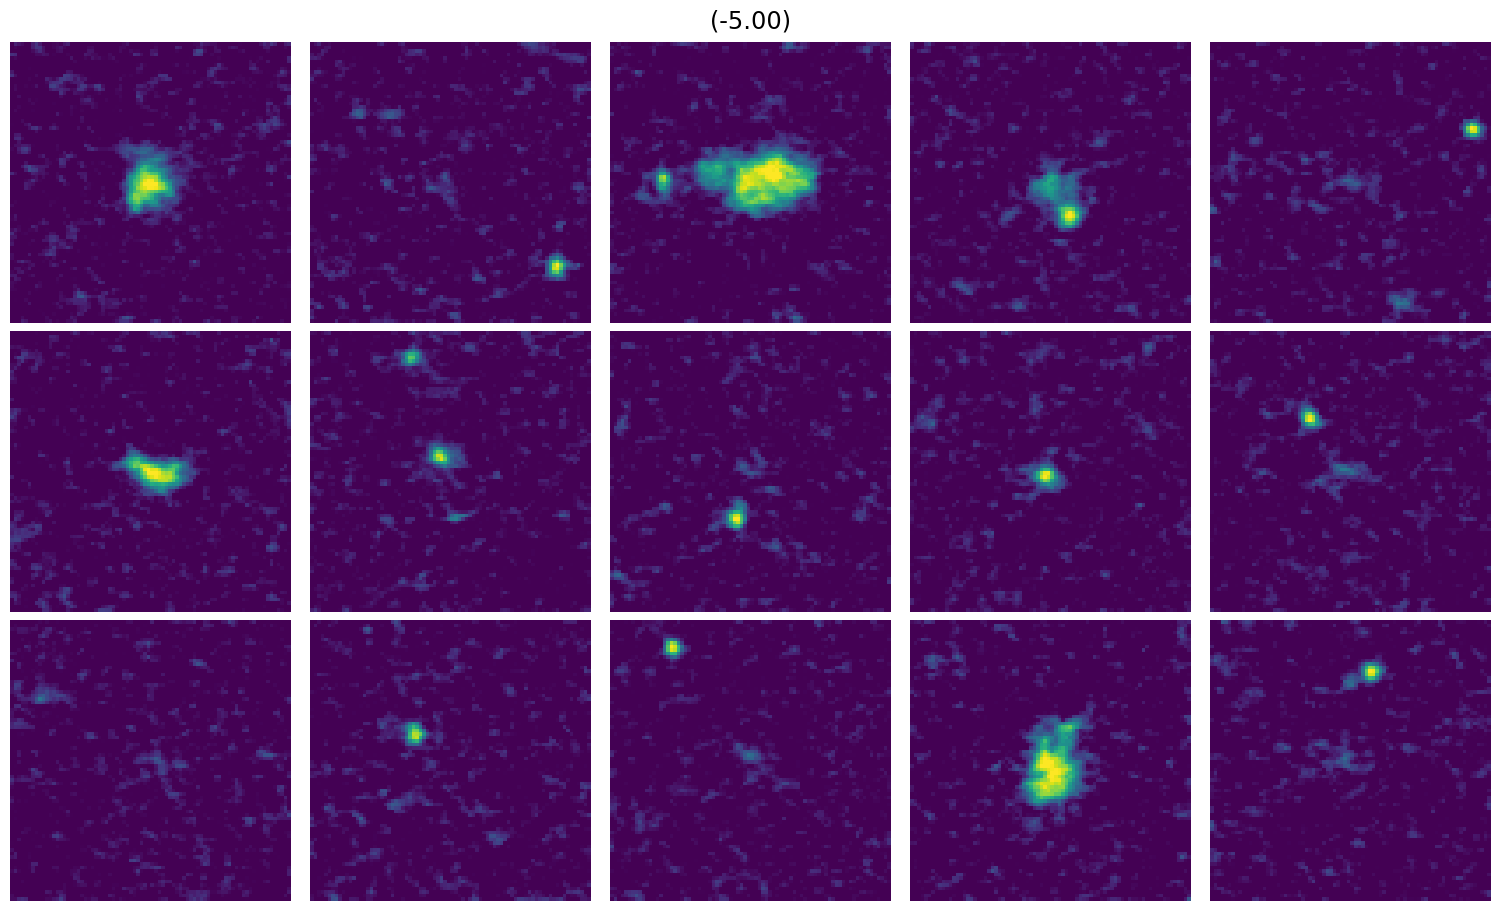

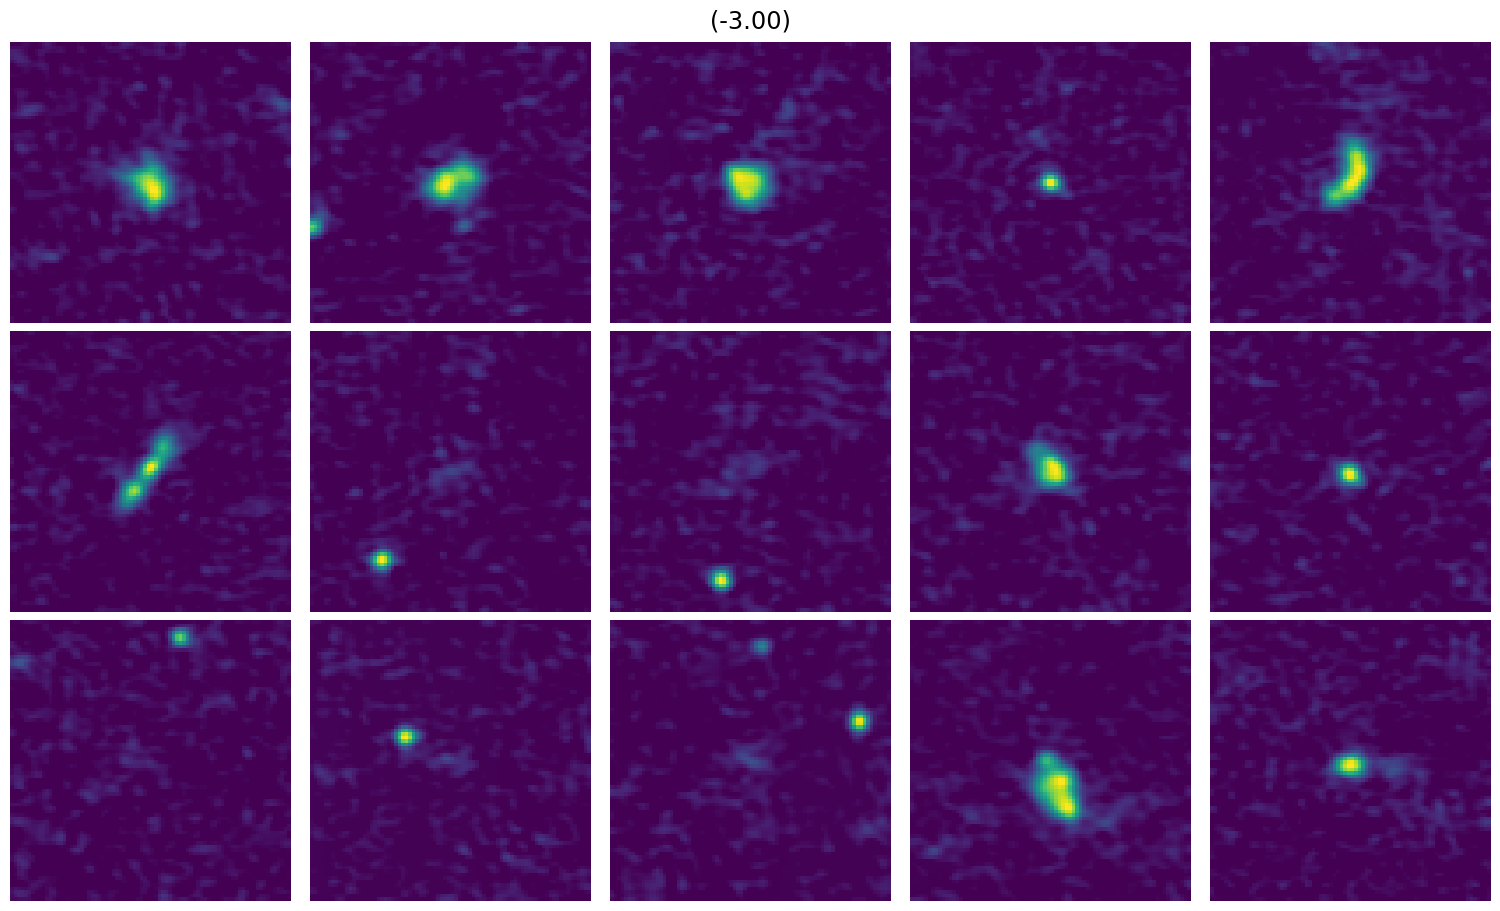

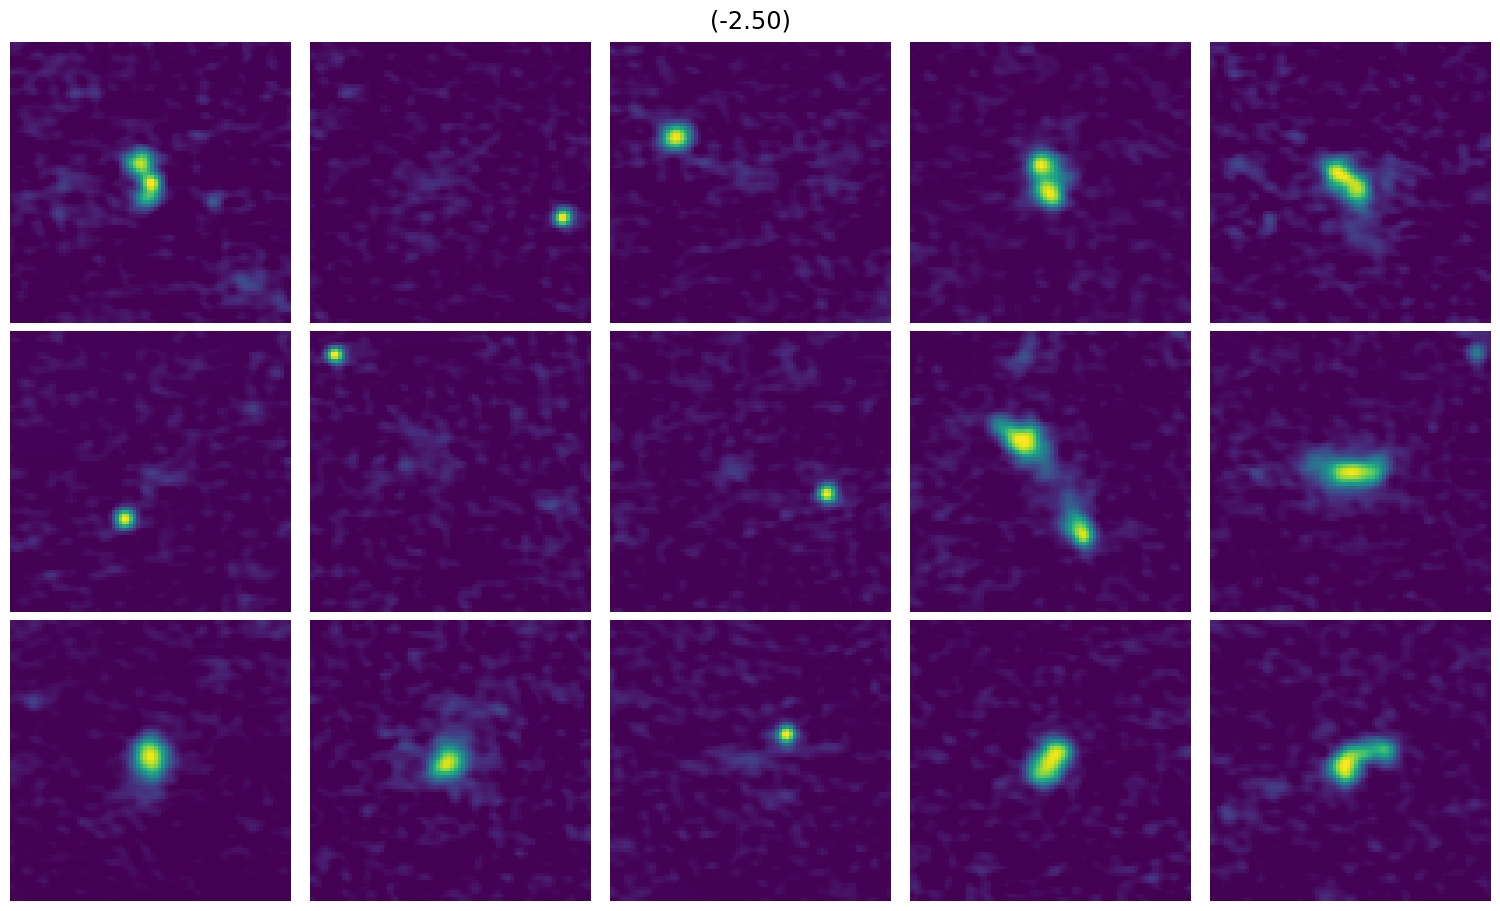

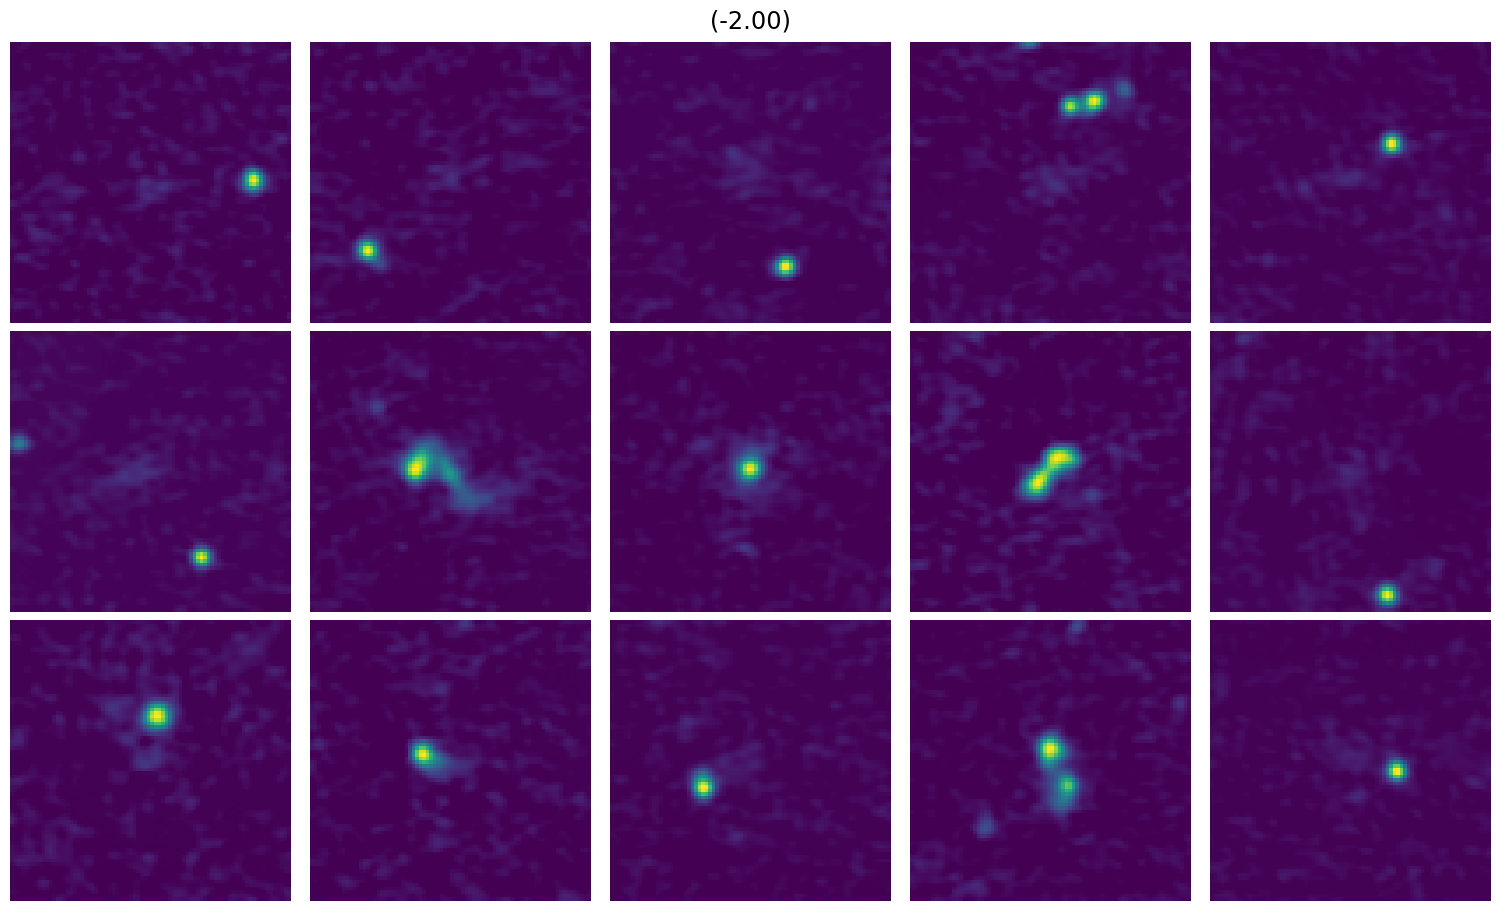

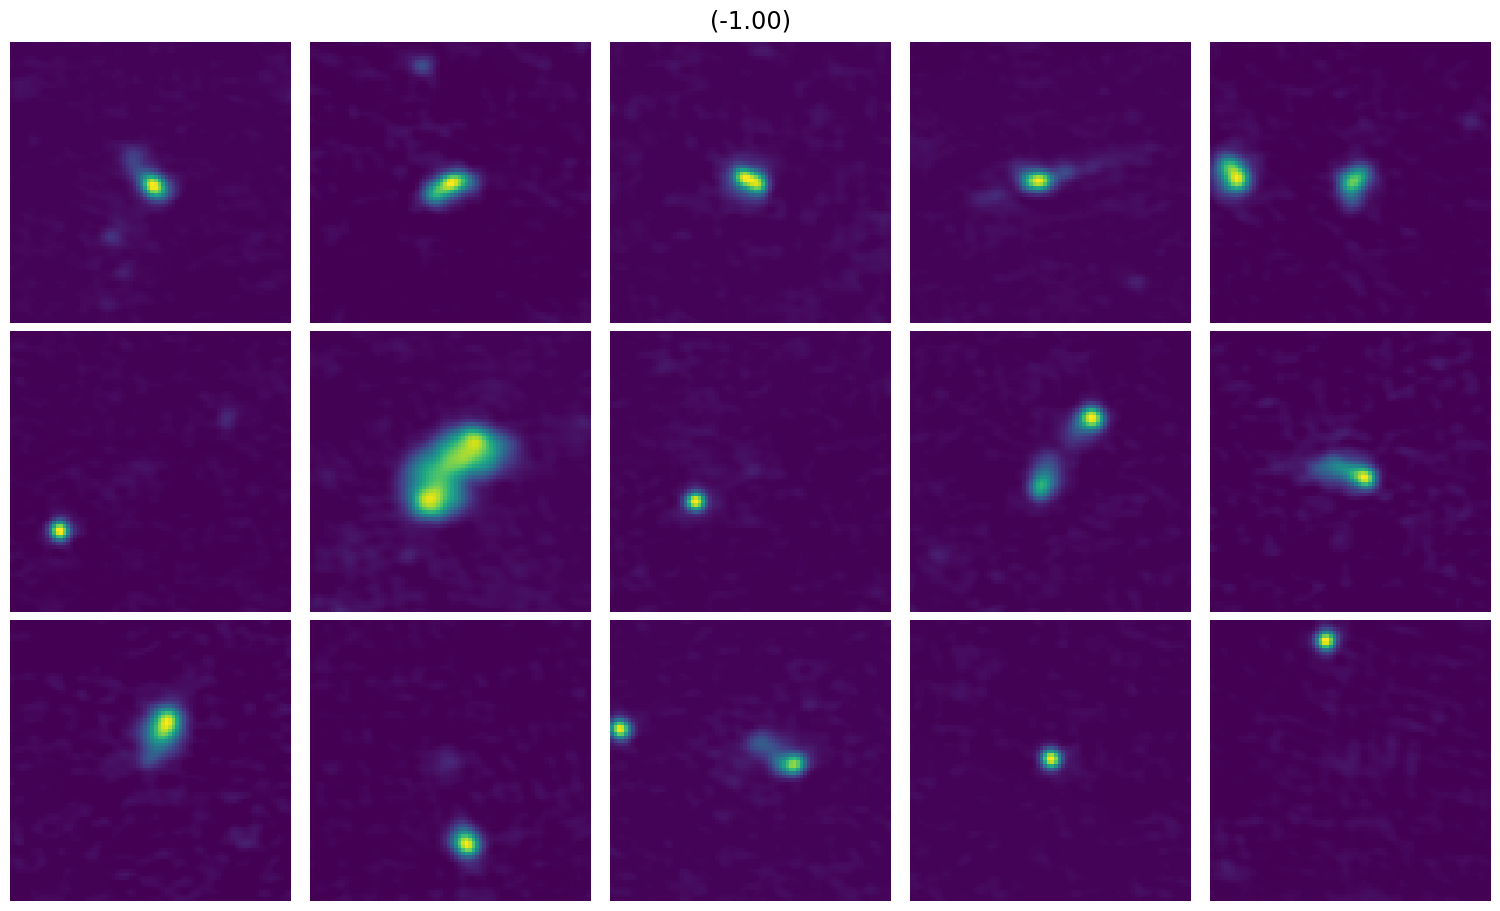

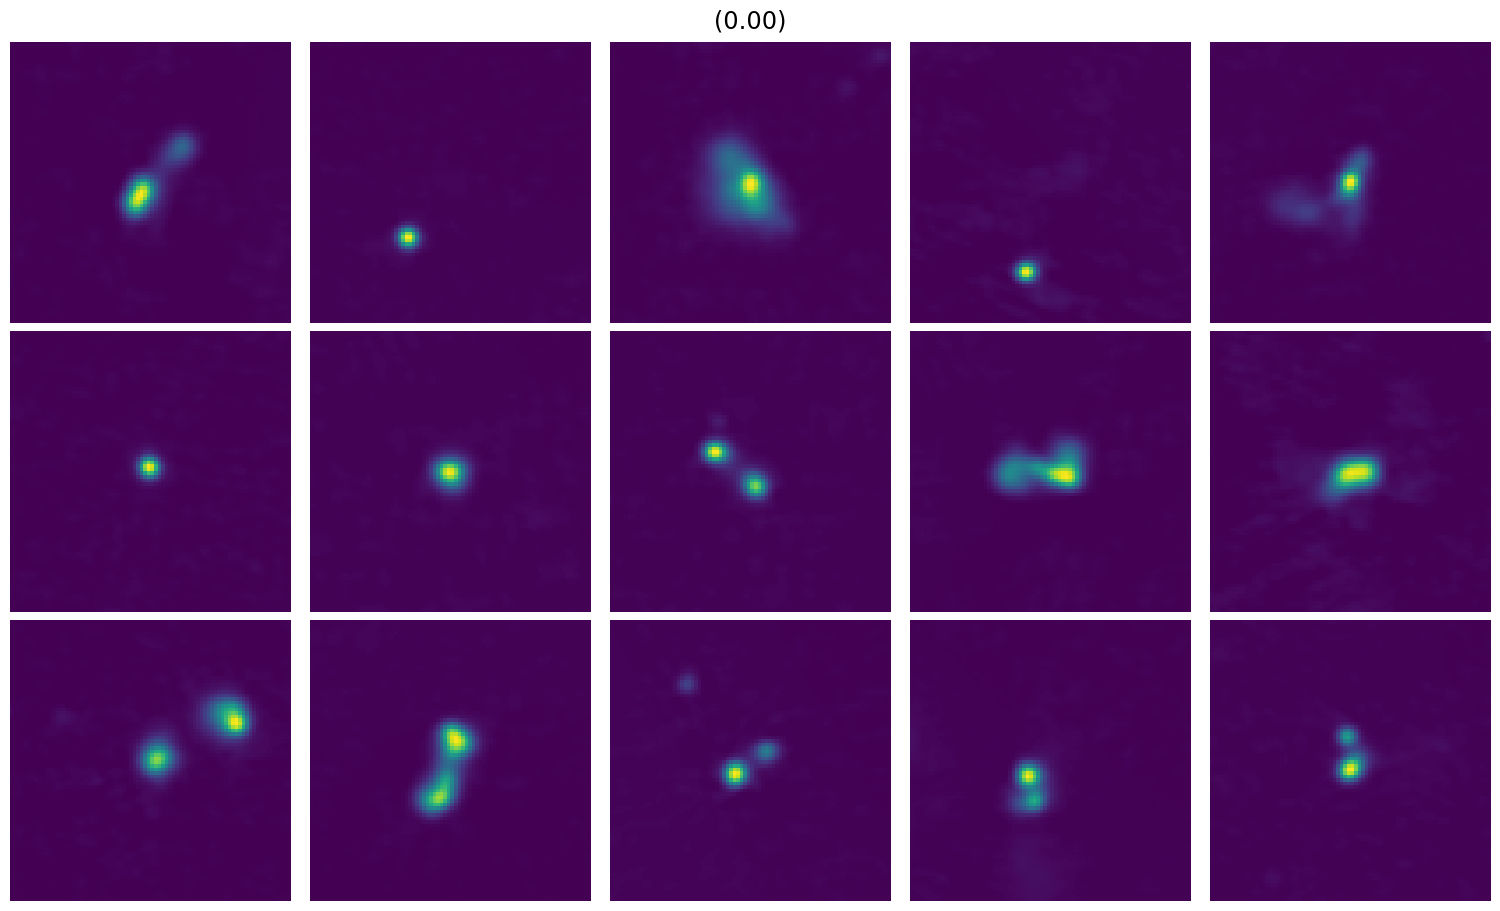

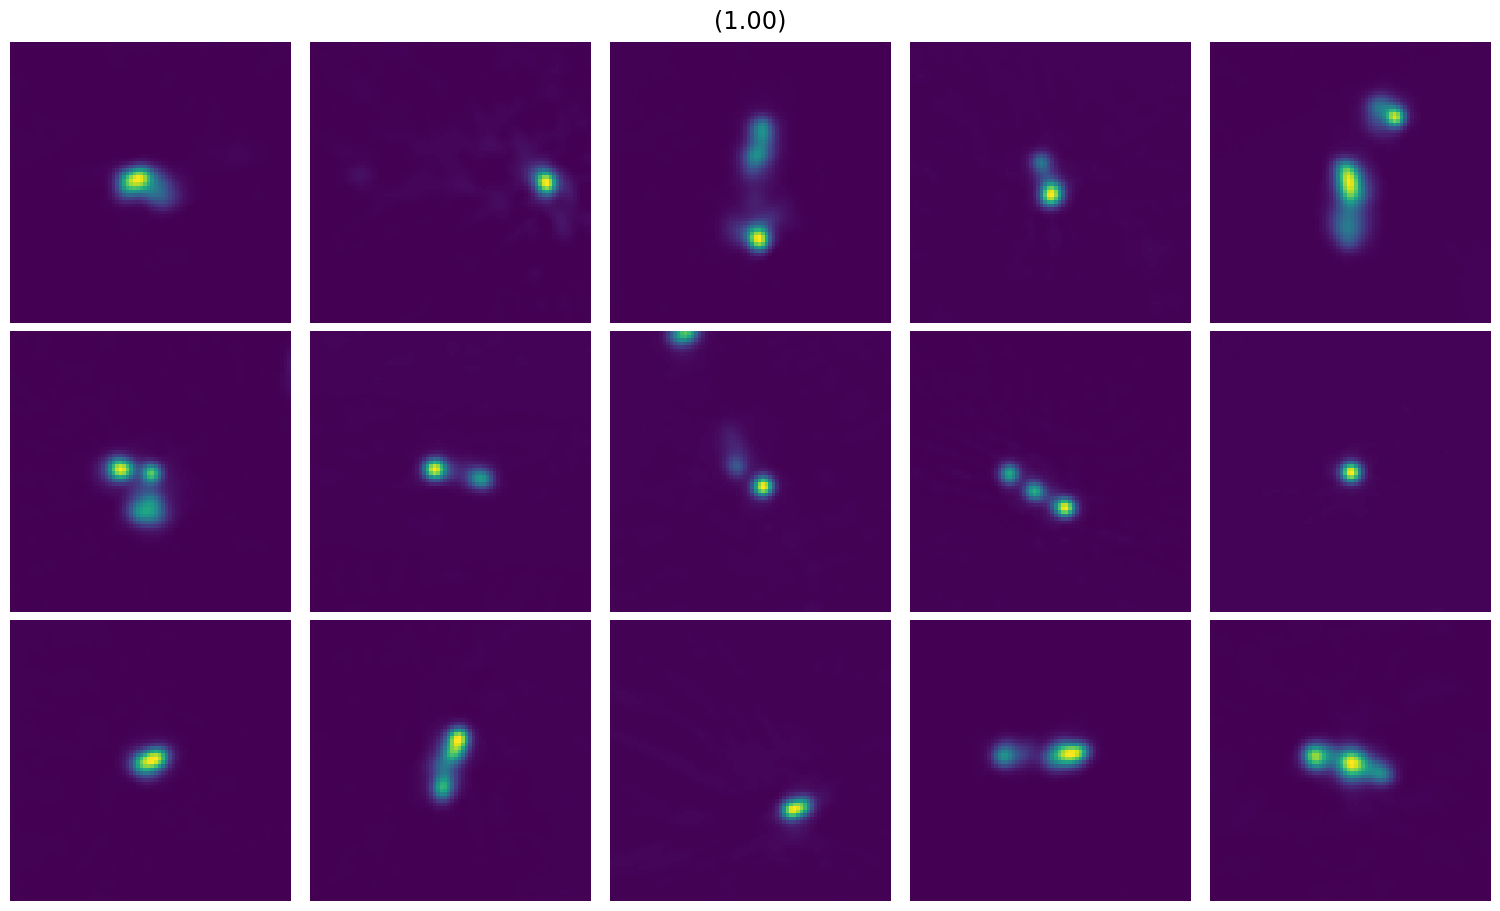

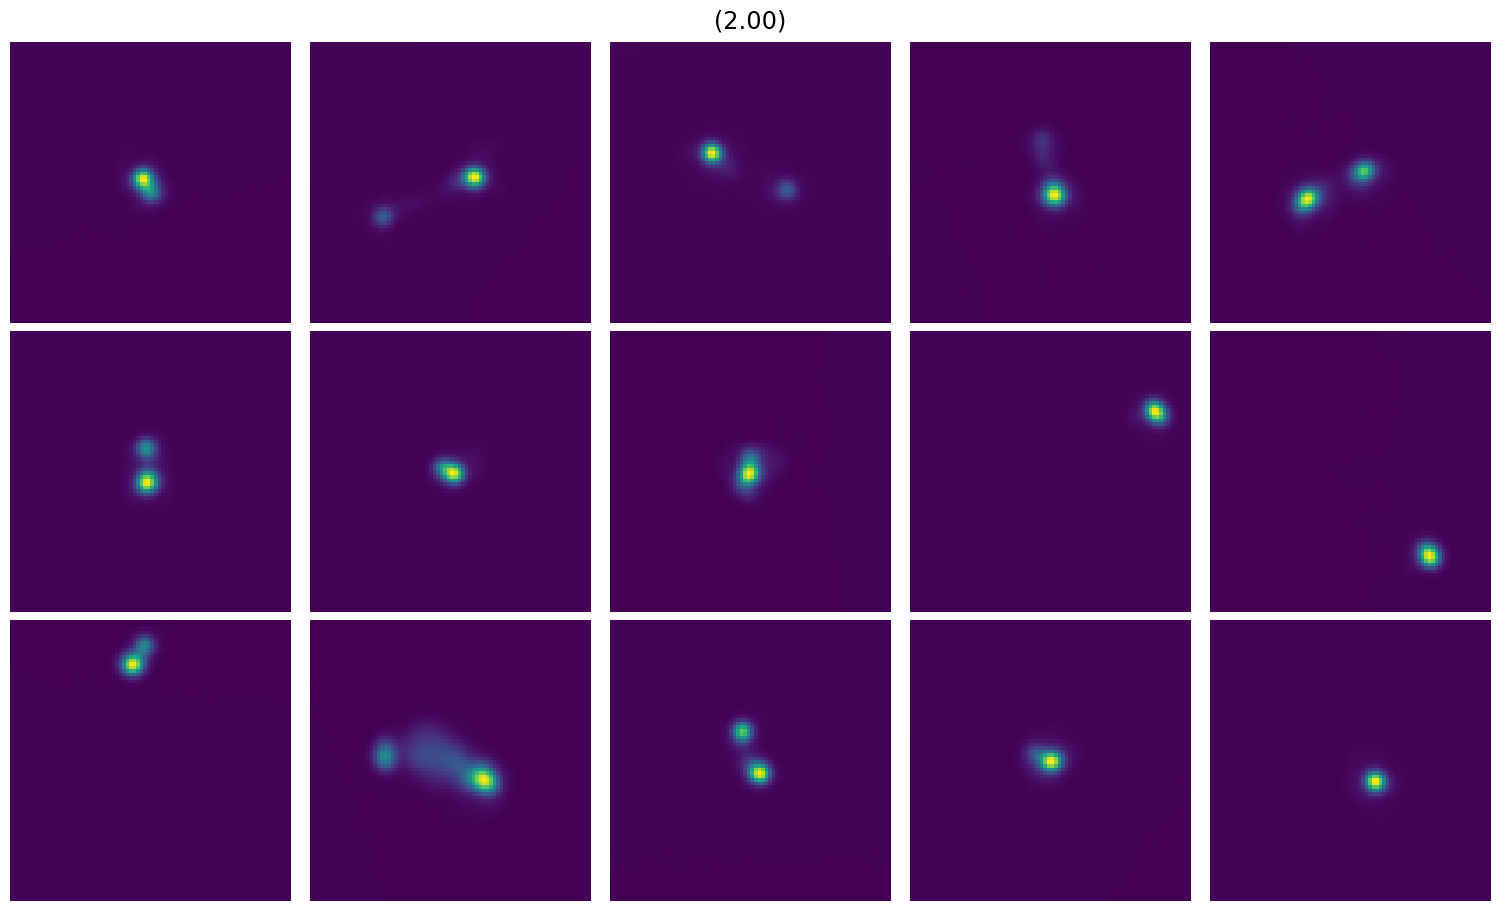

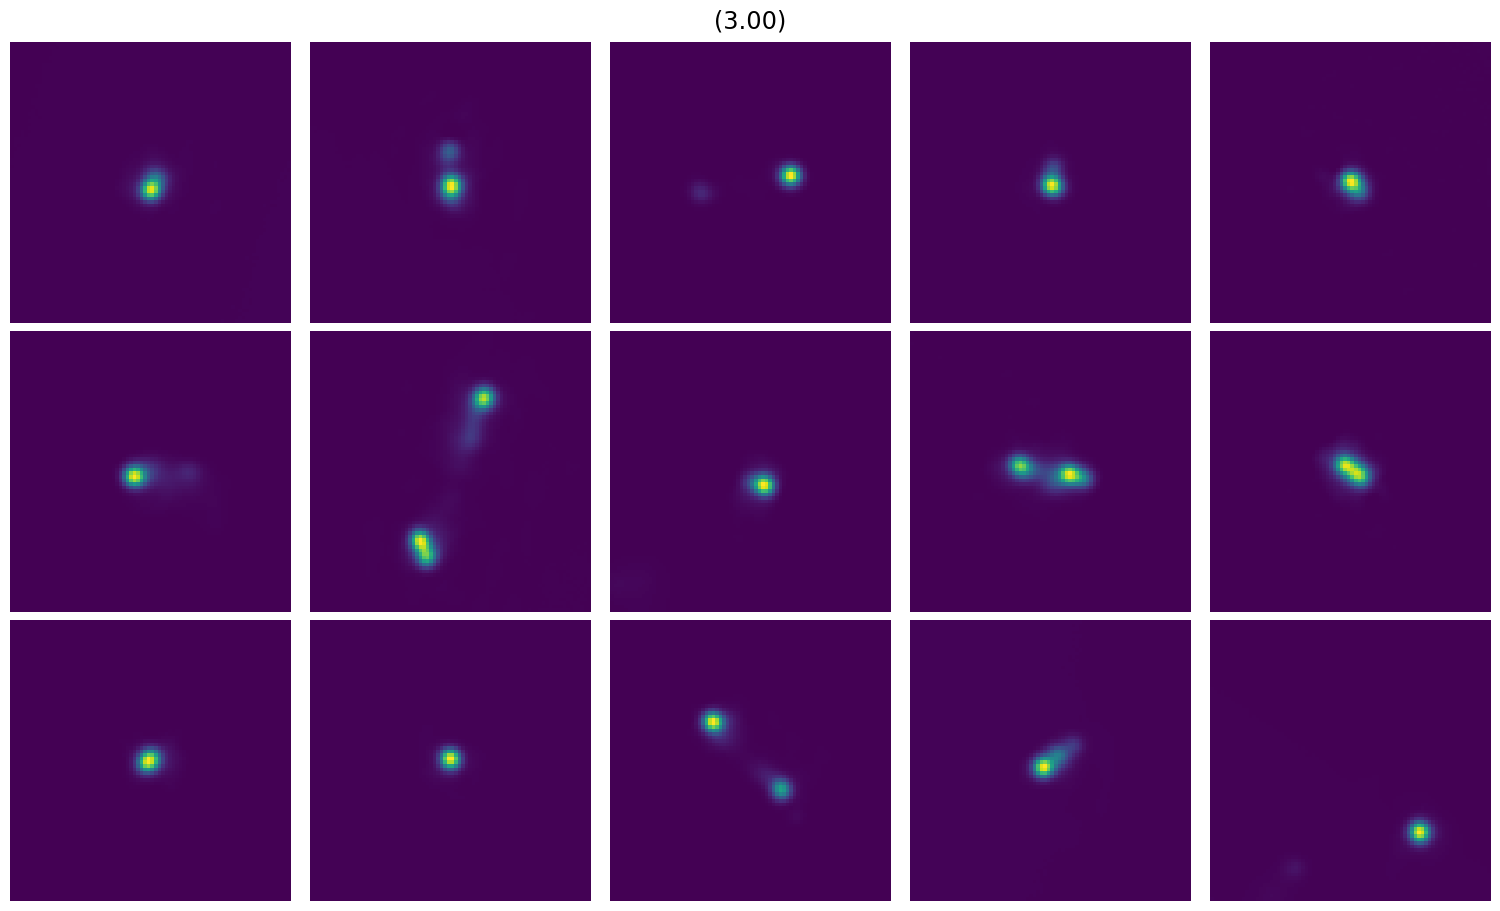

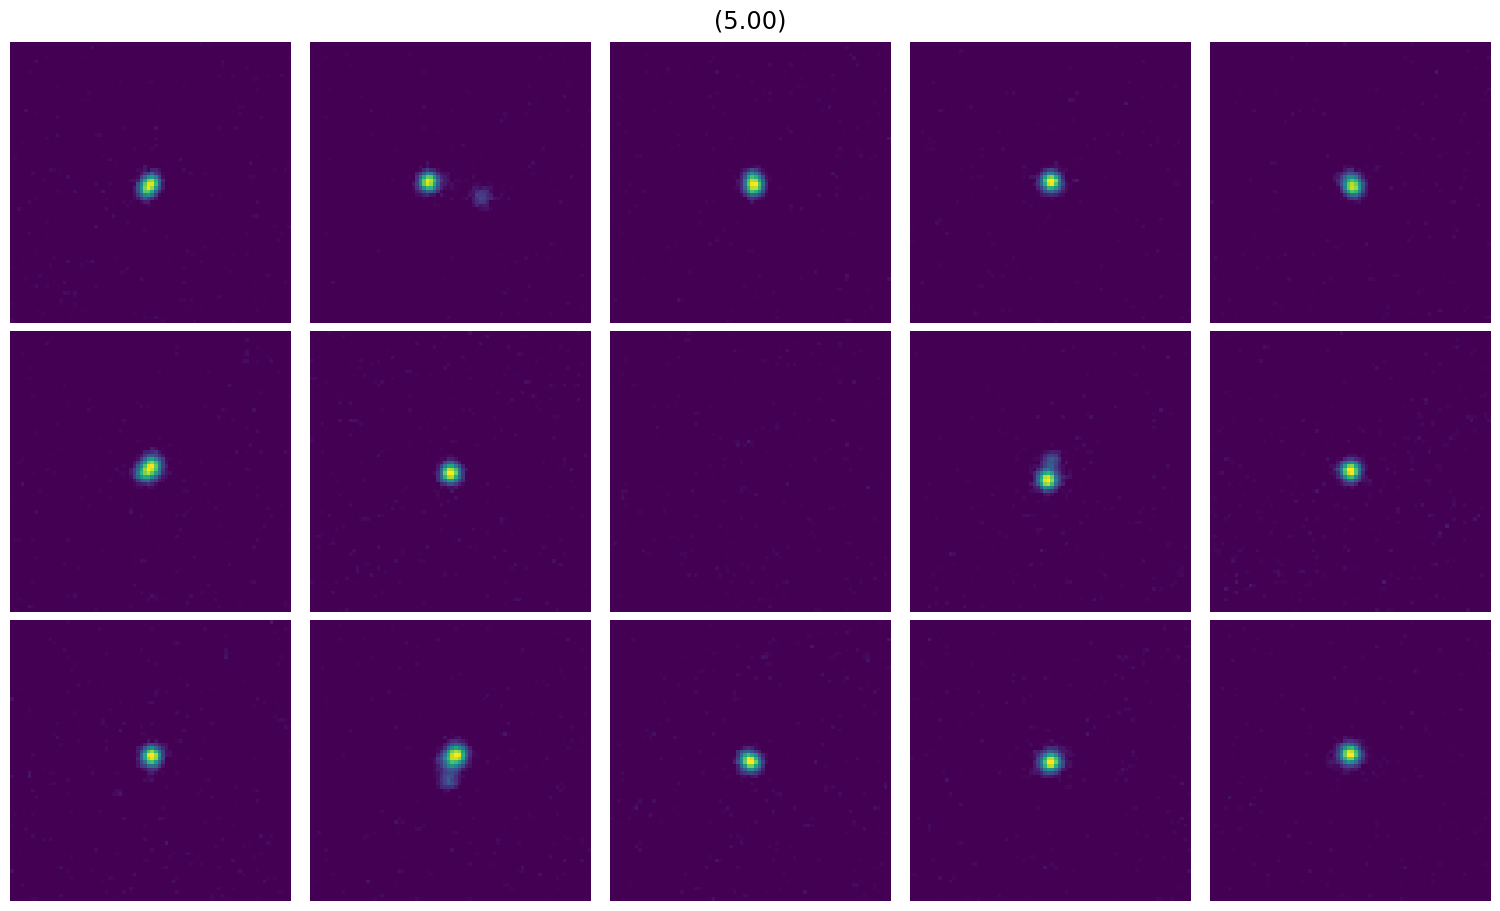

In [7]:
from plotting.plot_images import plot_image_grid
import numpy as np

for i, f in enumerate(fmax_tr):
    idxs = np.random.choice(50, 15, replace=False)
    subsamples = samples[50 * i: 50 * (i + 1)]
    plot_image_grid(
        subsamples[idxs],
        suptitle=f"({np.array(fmax_tr).flatten()[i]:.2f})",
        n_cols=5,
        vmin=-1,
    )

In [29]:
[k for k in model.state_dict().keys() if "context_emb" in k]

[]

In [5]:
from utils.data_utils import TrainDataset
import utils.paths as paths
from scipy.special import boxcox, inv_boxcox
from scipy.stats import norm, rv_histogram
from sklearn import preprocessing as pr
import numpy as np

# Load dataset to get max-val distribution
dset = TrainDataset(paths.LOFAR_SUBSETS["0-clip_unscaled"])
max_vals = dset.max_values.numpy()

Loading images...
Data set initialized.


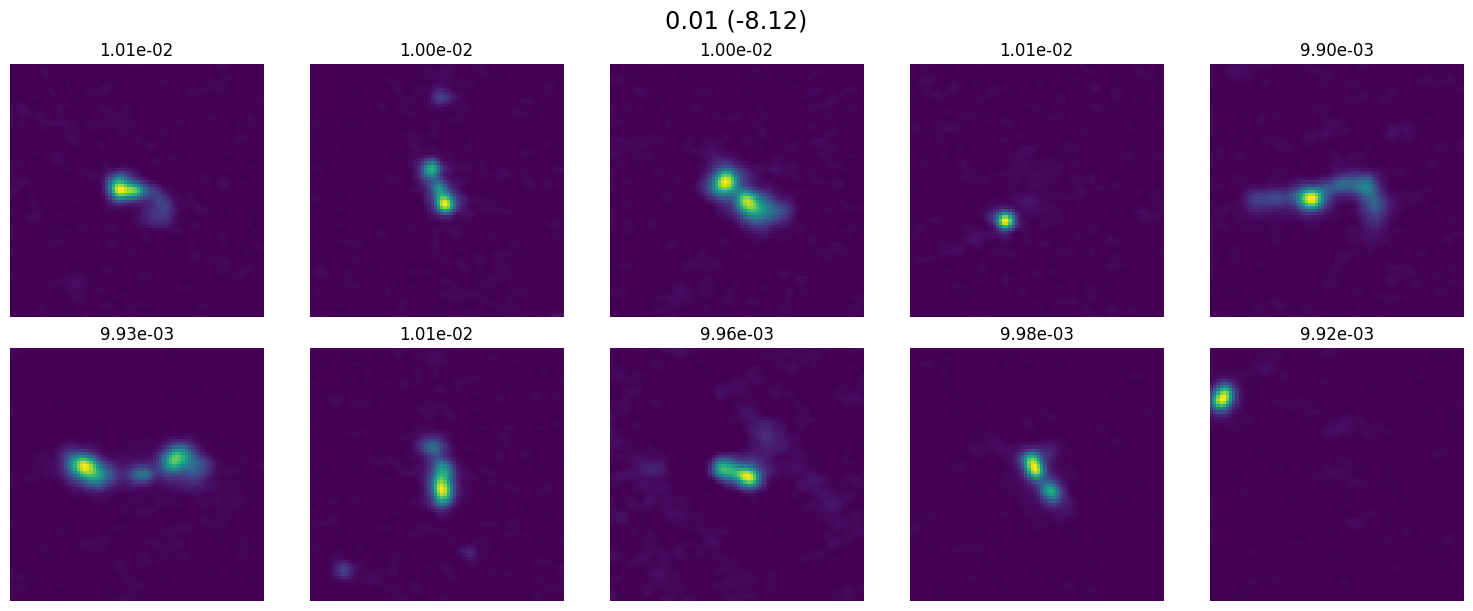

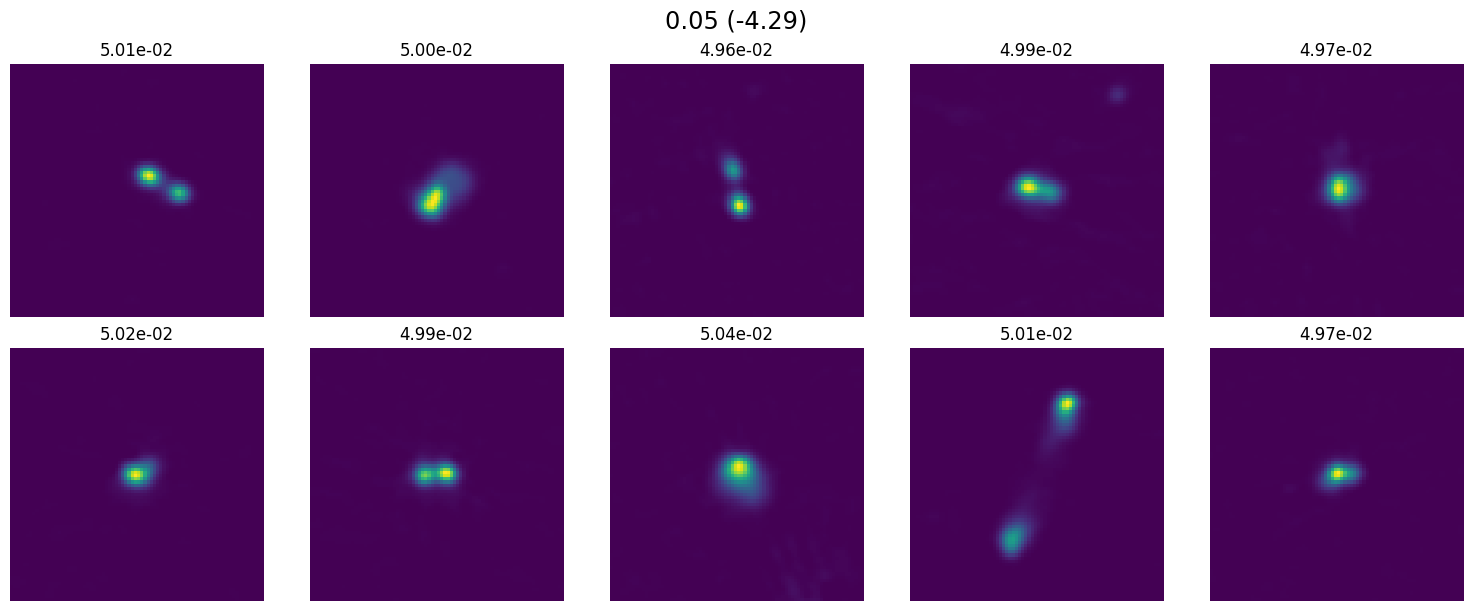

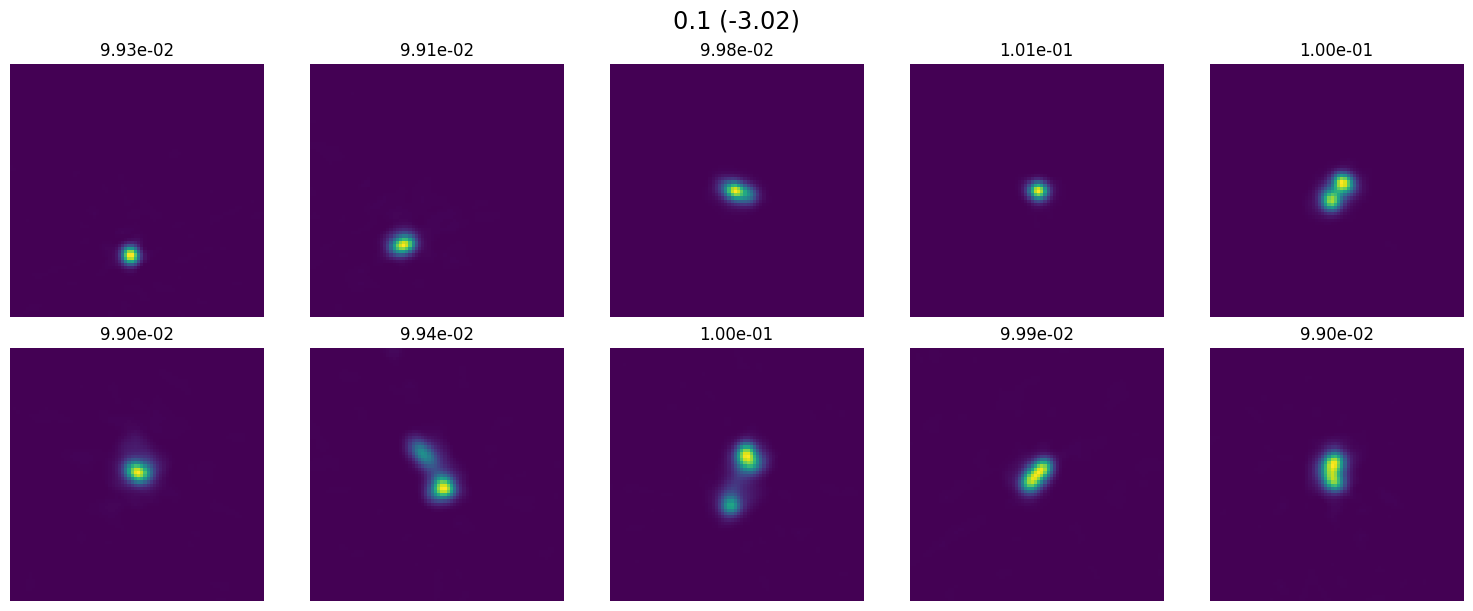

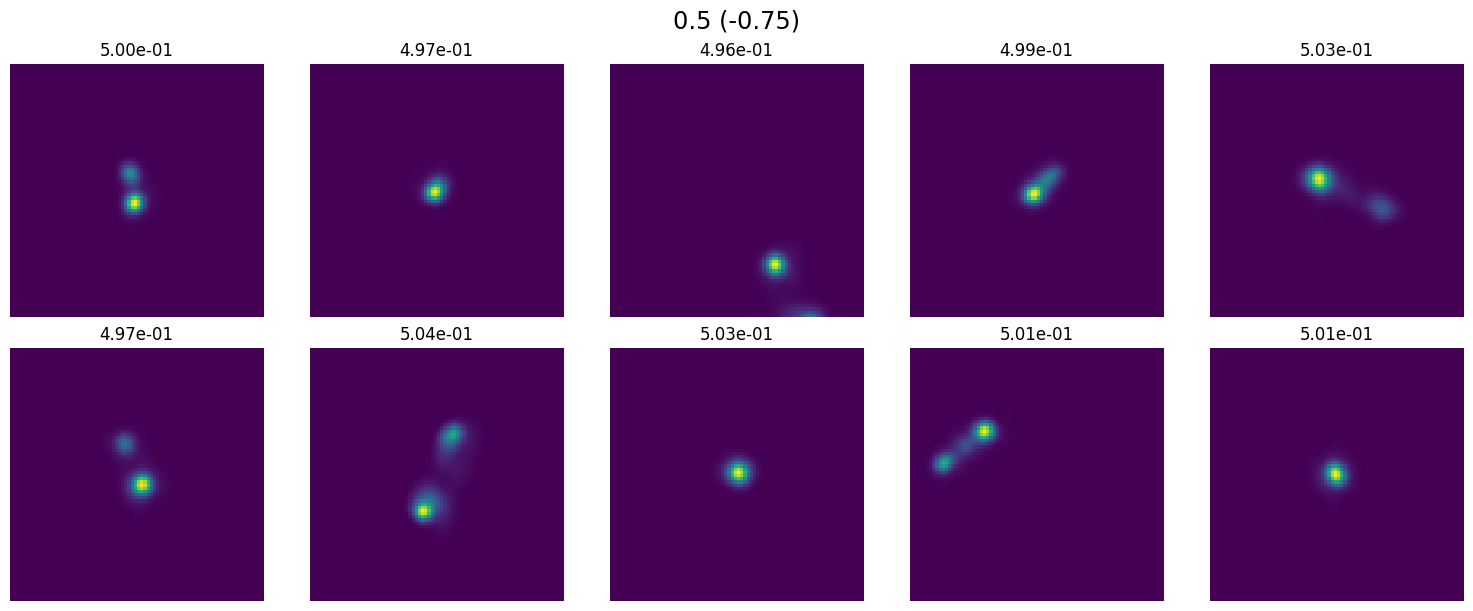

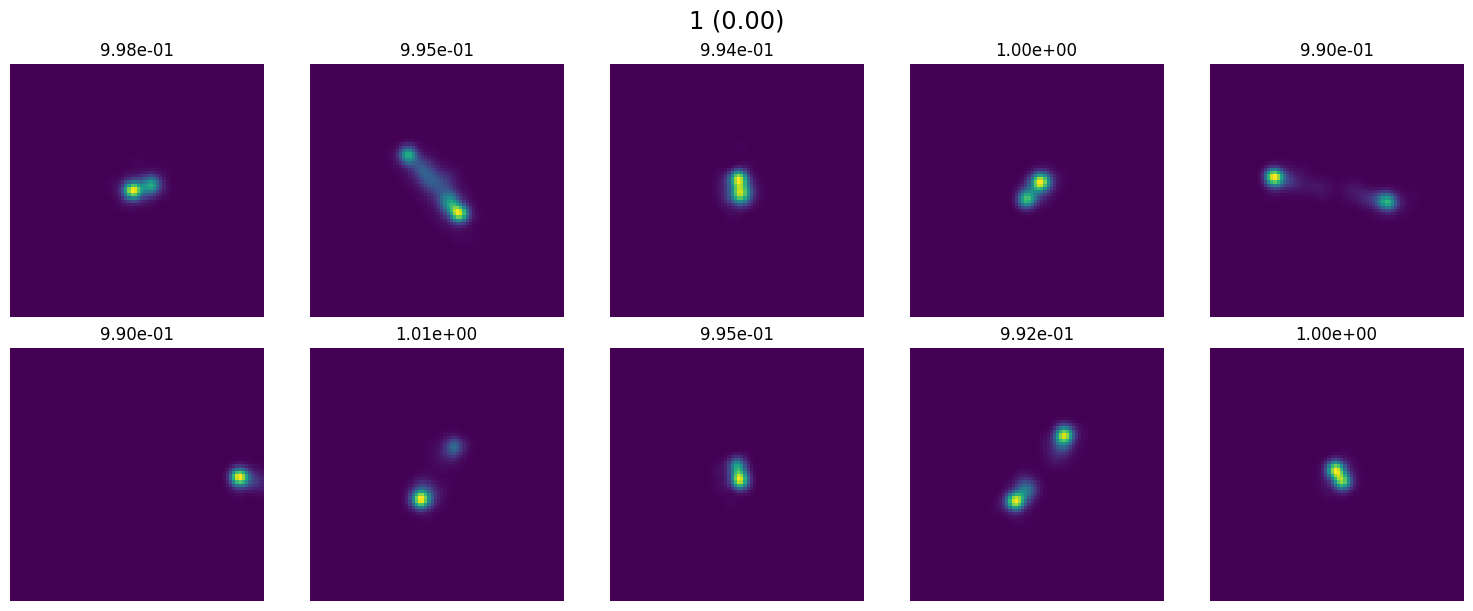

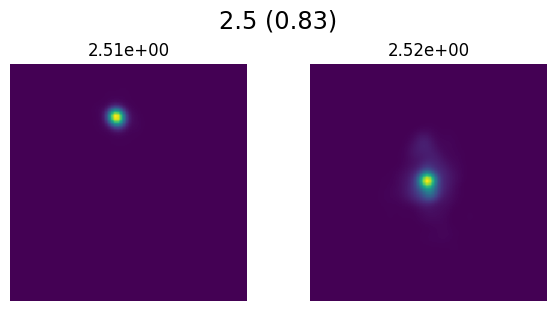

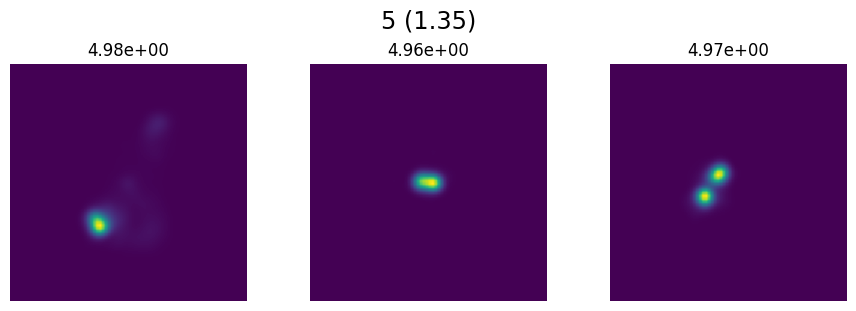

In [12]:
from plotting.plot_images import plot_image_grid
import numpy as np

epsilon = 1e-2

for i, f in enumerate(fmax):
    delta = epsilon * f
    mask = (max_vals > f - delta) & (max_vals < f + delta)
    if not mask.any():
        continue
    idxs = np.where(mask)[0].flatten()
    idxs = idxs[: min(len(idxs), 10)]
    subsamples = [dset[i] for i in idxs]
    plot_image_grid(
        subsamples,
        suptitle=f"{f} ({fmax_tr[i]:.2f})",
        n_cols=min(len(subsamples), 5),
        titles=max_vals[idxs],
    )

# Monitor File Sizes

In [2]:
from pathlib import Path
import pandas as pd

import datetime


def get_mtime(t):
    return datetime.datetime.fromtimestamp(t, tz=datetime.timezone.utc)


def get_size(p, size_in="GB", include_symlinks=False, recursive=True):
    match size_in:
        case "GB":
            inv_unit = 1e-9
        case "MB":
            inv_unit = 1e-6
        case "KB":
            inv_unit = 1e-3
        case _:
            raise ValueError(f"Invalid size_in: {size_in}")

    if p.is_symlink() and not include_symlinks:
        return 0

    if p.is_file():
        return p.stat().st_size * inv_unit

    elif not recursive:
        return 0

    else:
        try:
            return sum(get_size(child, size_in=size_in) for child in p.iterdir())

        except PermissionError as p:
            print(f"PermissionError: {p}")
            return 0

        except NotADirectoryError as n:
            print(f"NotADirectoryError: {n}")
            return 0


def path_info_df(p, size_in="GB", include_symlinks=False, recursive=True):
    files = []
    for p in p.iterdir():
        try:
            if not p.is_symlink() or include_symlinks:
                files.append(p)
        except PermissionError:
            continue

    path_info = {
        "name": [f.name for f in files],
        "type": [f.suffix if f.is_file() else "folder" for f in files],
        f"size ({size_in})": [
            round(
                get_size(
                    f,
                    size_in=size_in,
                    include_symlinks=include_symlinks,
                    recursive=recursive,
                ),
                1,
            )
            for f in files
        ],
        "date": [get_mtime(f.stat().st_mtime) for f in files],
        "owner": [f.owner() for f in files],
    }
    df = pd.DataFrame(path_info)
    mask = df["owner"] == "bbd0953"  # & (df['size'] > 5000)
    df_large = df[mask].sort_values(by=f"size ({size_in})", ascending=False)
    return df_large

In [14]:
import utils.paths as paths

p = paths.STORAGE_PARENT / "image_data"
df = path_info_df(p, size_in="GB", include_symlinks=False, recursive=True)
df

name    type  size (GB)                             date    owner
1      LOFAR  folder      100.7 2024-04-19 12:21:10.286954+00:00  bbd0953
2      FIRST  folder        1.1 2024-01-29 13:05:44.128973+00:00  bbd0953
0  generated  folder        0.9 2024-03-08 15:28:52.186788+00:00  bbd0953

In [10]:
names = [
    n for n, o in zip(df["name"], df["owner"]) if ("sweep" in n) and o == "bbd0953"
]
names

['grateful-sweep-95_dx0b13mv',
 'clear-sweep-106_udkgzcr4',
 'misunderstood-sweep-284_gz54k2kw',
 'icy-sweep-53_89bkugvm',
 'smart-sweep-434_qdxsioec',
 'wobbly-sweep-36_r2pzravq',
 'vivid-sweep-184_54emlgwv',
 'jumping-sweep-373_tgmmfa8q',
 'valiant-sweep-60_7krgp76z',
 'sparkling-sweep-282_pb8vcc8j',
 'robust-sweep-145_busdtj31',
 'classic-sweep-343_b1cot5zp',
 'laced-sweep-61_csdjxamh',
 'jolly-sweep-42_35u9u739',
 'earnest-sweep-304_we693mus',
 'easy-sweep-25_awfx4c42',
 'ethereal-sweep-46_3htcjj5b',
 'efficient-sweep-462_ffxnjs1n',
 'desert-sweep-100_fj5crwun',
 'exalted-sweep-44_pt4xkut8',
 'winter-sweep-314_04fcjeto',
 'sandy-sweep-339_vzorev2x',
 'sleek-sweep-55_qcgrrjkt',
 'clean-sweep-137_zbi0zyd5',
 'wise-sweep-507_ovhlpcfi',
 'northern-sweep-366_vycoiwio',
 'pleasant-sweep-214_10koosjj',
 'sweepy-sweep-444_lhcnamxf',
 'olive-sweep-232_xld0j8on',
 'radiant-sweep-56_yb64fadv',
 'dark-sweep-151_s2ywhh7o',
 'youthful-sweep-320_gsd7184j',
 'stellar-sweep-223_zp4wodst',
 'apricot

In [12]:
import shutil

for n in names:
    # Remove the file
    # (p / n).unlink()
    shutil.rmtree(p / n)

In [25]:
p = Path("/home/bbd0953/diffusion")
include_symlinks = False
files = [p for p in p.iterdir() if not p.is_symlink() or include_symlinks]
files

[PosixPath('/home/bbd0953/diffusion/.git'),
 PosixPath('/home/bbd0953/diffusion/.gitignore'),
 PosixPath('/home/bbd0953/diffusion/nohup.out'),
 PosixPath('/home/bbd0953/diffusion/.vscode'),
 PosixPath('/home/bbd0953/diffusion/.cenv'),
 PosixPath('/home/bbd0953/diffusion/src')]

In [5]:
p = Path("/home/bbd0953/diffusion/.cenv/lib/python3.11")
path_info_df(
    p,
    include_symlinks=False,
)

name    type  size (GB)                             date  \
186   site-packages  folder        5.7 2024-02-14 10:48:11.588134+00:00   
0         string.py     .py        0.0 2023-07-05 14:01:15.758291+00:00   
131            venv  folder        0.0 2023-08-29 09:44:59.871595+00:00   
133      concurrent  folder        0.0 2023-08-29 09:44:56.151552+00:00   
134          tty.py     .py        0.0 2023-07-05 14:01:15.778291+00:00   
..              ...     ...        ...                              ...   
73   tracemalloc.py     .py        0.0 2023-07-05 14:01:15.774291+00:00   
74     telnetlib.py     .py        0.0 2023-07-05 14:01:15.766291+00:00   
75        random.py     .py        0.0 2023-07-05 14:01:15.734291+00:00   
76        turtle.py     .py        0.0 2023-07-05 14:01:15.778291+00:00   
208         aifc.py     .py        0.0 2023-07-05 14:01:15.642292+00:00   

       owner  
186  bbd0953  
0    bbd0953  
131  bbd0953  
133  bbd0953  
134  bbd0953  
..       ...  
73   bbd0953  
74   bbd0953  
75   bbd0953  
76   bbd0953  
208  bbd0953  

[209 rows x 5 columns]

In [27]:
p = Path("/tmp")
df = path_info_df(p, include_symlinks=True, recursive=True, size_in="MB")

mask = ["process_cutouts" in name for name in df["name"]]

df[mask]

PermissionError: [Errno 13] Permission denied: '/tmp/tmps_jivb_jwandb-artifacts'
PermissionError: [Errno 13] Permission denied: '/tmp/tmpv42ouxth'
PermissionError: [Errno 13] Permission denied: '/tmp/tmpf9chxor6wandb-media'
PermissionError: [Errno 13] Permission denied: '/tmp/tmpy_0vg1rmwandb-media'
PermissionError: [Errno 13] Permission denied: '/tmp/tmpf481mtedwandb-artifacts'
PermissionError: [Errno 13] Permission denied: '/tmp/tmpul6kusvdwandb'
NotADirectoryError: [Errno 20] Not a directory: '/tmp/pymp-2g34w01z/listener-q8vlx_0j'
PermissionError: [Errno 13] Permission denied: '/tmp/tmpv_g9y6jvwandb-media'
PermissionError: [Errno 13] Permission denied: '/tmp/tmpgvebrtt6wandb'
PermissionError: [Errno 13] Permission denied: '/tmp/tmpp1bi54_7'
PermissionError: [Errno 13] Permission denied: '/tmp/tmp01u5jaxiwandb-media'
PermissionError: [Errno 13] Permission denied: '/tmp/tmpezoy1exbwandb'
PermissionError: [Errno 13] Permission denied: '/tmp/tmpxy7m6a_mwandb'
PermissionError: [Errno 13]

Empty DataFrame
Columns: [name, type, size (MB), date, owner]
Index: []

In [21]:
Path("/tmp/pymp-2g34w01z/listener-q8vlx_0j").is_fifo()

False